<div style="text-align: center;">

# **Critical Review of the Deltakit Textbook on Quantum Error Correction**

                                             Review and Validate By: Muhammad Hasnain Falaksher  
                                             Email: mhasnain@ele.qau.edu.pk  

</div>

---

## **Overview**

The **Deltakit Textbook** provides a comprehensive, hands-on introduction to quantum error correction (QEC), integrating theoretical principles with practical Python-based simulations. It bridges abstract QEC concepts with executable code, enabling users to explore error-correcting codes in a computational environment efficiently.  

The textbook leverages **`stim`** for rapid circuit simulation and **`PyMatching`** for decoding, facilitating evaluation of logical error rates across varying code distances and physical error probabilities. Additionally, it includes **detailed visualizations** of planar and rotated surface codes, stabilizers, and syndrome extraction cycles, providing intuitive insight into the layout and behavior of logical qubits.  

---

## **Comparison with IBM Qiskit**

| Feature | Deltakit Textbook | IBM Qiskit |
|---------|-----------------|------------|
| **Simulation Speed** | Optimized for millions of shots using `stim`; extremely fast for repeated trials | Slower for large-scale simulations; optimized for small-to-medium shot counts |
| **Hardware Access** | Software-only simulations; no direct quantum hardware execution | Supports simulation and real-device experiments on IBM Quantum hardware |
| **Shots Range** | Efficiently supports up to tens of millions of shots | Typical hardware shots: 1024–8192; higher shots limited by queue |
| **Visualization** | Detailed, interactive plots of data qubits, measure qubits, stabilizers, and error chains | Visualization available via Aer and Qiskit Textbook, less interactive for large codes |
| **Pedagogical Focus** | Hands-on exploration emphasizing code structure, error injection, and logical error measurement | Balanced between theory and practice; includes hardware-aware experiments |

---

## **Observations**

- **Strengths:**  
  - Excellent for rapid, large-scale QEC simulation.  
  - Clear and intuitive visualizations enhance understanding of qubit layouts and stabilizer interactions.  
  - Capable of handling high shot counts for statistically significant results.  

- **Limitations:**  
  - Primarily software-focused; does not interface directly with real quantum hardware.  
  - Users seeking real-device experiments will still require platforms like IBM Qiskit.  

- **Overall Assessment:**  
  Deltakit complements Qiskit by enabling **fast, large-scale simulation and error analysis** that is difficult to achieve on current hardware, while Qiskit remains valuable for **hardware-aware experimentation**.

---

## **Conclusion**

The **Deltakit Textbook** is an outstanding resource for students, educators, and researchers seeking **practical experience in QEC**. Its combination of scalable shot counts, detailed visualizations, and integration of fast decoding algorithms makes it an excellent tool for exploring logical error rates, surface code layouts, and syndrome extraction cycles, positioning it as a highly complementary resource to hardware-focused platforms such as IBM Qiskit.


In [ ]:
!pip install deltakit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.7/60.7 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.1/627.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 120.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.3/15

In [ ]:
from deltakit.explorer import Client

In [ ]:
Client.set_token("ucas363po6KLBrCrQdArT9B2F6X7Kqty")

In [ ]:
client = Client.get_instance()

In [ ]:
def encode(bit, num_copies):
    return [bit] * num_copies

def send(bits, p_error = 0.1):
    return [1^bit if random.random() <= p_error else bit for bit in bits]

def receive_and_interpret(bits, majority_vote = False):
    received_bits_counted = Counter(bits).most_common()
    if majority_vote:
        return received_bits_counted[0][0]
    else:
        return received_bits_counted

In [ ]:
message = encode(1, 5)
print(message)

[1, 1, 1, 1, 1]


In [ ]:
transmitted = send(message, p_error = 0.1)
print(transmitted)

[1, 1, 1, 1, 1]


In [ ]:
import random
from collections import Counter

def encode(bit, n): return [bit]*n
def send(bits, p=0.1): return [1^b if random.random()<p else b for b in bits]
def decode(bits): return Counter(bits).most_common(1)[0][0]

# Example
msg = [1,0,1]
encoded = sum([encode(b,3) for b in msg], [])     # repeat each bit 3 times
transmitted = send(encoded, p=0.2)                # noisy channel
decoded = [decode(transmitted[i:i+3]) for i in range(0,len(transmitted),3)]

print("Msg:", msg)
print("Encoded:", encoded)
print("Transmitted:", transmitted)
print("Decoded:", decoded)


Msg: [1, 0, 1]
Encoded: [1, 1, 1, 0, 0, 0, 1, 1, 1]
Transmitted: [1, 1, 0, 0, 0, 1, 1, 1, 0]
Decoded: [1, 0, 1]


In [ ]:
received = receive_and_interpret(transmitted)
print(received)

[(1, 5), (0, 4)]


In [ ]:
received = receive_and_interpret(transmitted, majority_vote = True)
print(received)

1


# Measuring the Effectiveness of Classical Repetition Codes

Now, let’s ask the following question:  
**How well does this duplicate-and-take-majority-vote scheme work?**

To measure this, we will run several iterations (`n_shots`) where a randomly picked message is sent across the noisy channel.  

For each attempt:
- The message will be **encoded** using repetition codes.  
- It will then be **transmitted** through the channel with a given error probability.  
- At the receiver side, we will apply **majority voting** to decode the message.  

We will count the number of times the decoded message **does not match** the original message.  
This will allow us to estimate the **failure probability** over `n_shots` attempts.


In [ ]:
def get_code_error_probability(code_distance, p_error, n_shots = 1000):

    code_errors = 0.0
    for _ in range(n_shots):
        desired_message = random.choice([0,1])

        encoded_message = encode(desired_message, num_copies = code_distance)
        sent_message = send(encoded_message, p_error = p_error)
        received_message = receive_and_interpret(sent_message, majority_vote = True)

        if received_message != desired_message:
            code_errors += 1

    return code_errors / n_shots

In [ ]:
import random
from collections import Counter
import numpy as np

# --- Core Functions ---

def encode(bit, num_copies):
    """Repeat a single bit num_copies times."""
    return [bit] * num_copies

def send(bits, p_error=0.1):
    """Send bits through a noisy channel, flipping each with probability p_error."""
    return [1 ^ b if random.random() < p_error else b for b in bits]

def receive_and_interpret(bits, majority_vote=False):
    """Decode received bits: either return counts or majority vote."""
    counts = Counter(bits).most_common()
    return counts[0][0] if majority_vote else counts

def get_code_error_probability(code_distance, p_error, n_shots=1000):
    """Estimate probability of decoding error for repetition code of given distance."""
    code_errors = 0
    for _ in range(n_shots):
        desired_message = random.choice([0, 1])
        encoded_message = encode(desired_message, num_copies=code_distance)
        sent_message = send(encoded_message, p_error=p_error)
        received_message = receive_and_interpret(sent_message, majority_vote=True)
        if received_message != desired_message:
            code_errors += 1
    return code_errors / n_shots

# --- Simulation Loop ---

code_distances = np.arange(start=1, stop=21, step=2)   # odd distances 1,3,...,19
p_errors = np.logspace(start=-3, stop=0, num=50)       # 0.001 to 1.0

all_code_distance_error_probabilities = []
for code_distance in code_distances:
    print(f"Running distance {code_distance}")
    code_distance_error_probabilities = []
    for p_error in p_errors:
        code_distance_error_probabilities.append(
            get_code_error_probability(code_distance, p_error, n_shots=10000)
        )
    all_code_distance_error_probabilities.append(code_distance_error_probabilities)


Running distance 1
Running distance 3
Running distance 5
Running distance 7
Running distance 9
Running distance 11
Running distance 13
Running distance 15
Running distance 17
Running distance 19


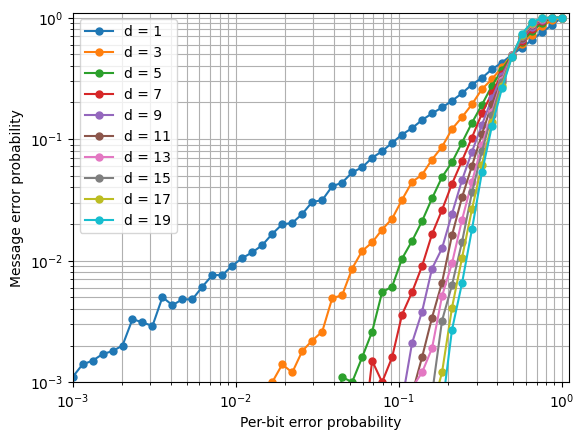

In [ ]:
import matplotlib.pyplot as plt

for code_distance, error_probabilities in zip(code_distances, all_code_distance_error_probabilities):
    plt.loglog(p_errors, error_probabilities, marker='.', markersize=10, label=f'd = {code_distance}')

plt.legend()
plt.xlabel('Per-bit error probability')
plt.ylabel('Message error probability')
plt.xlim([1e-3, 1.1])
plt.ylim([1e-3, 1.1])
plt.grid(True, which="both")
plt.show()


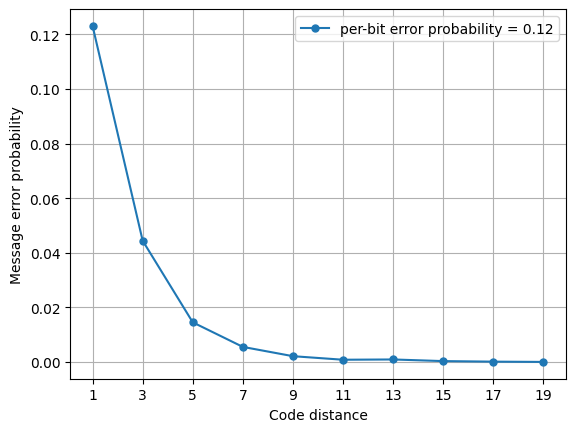

In [ ]:
specific_p_error = 0.12
idx = np.searchsorted(p_errors, specific_p_error, side="left")

message_error_probabilities_for_p_error = [
    all_code_distance_error_probabilities[i][idx] for i in range(len(code_distances))
]

import matplotlib.pyplot as plt

plt.plot(
    code_distances,
    message_error_probabilities_for_p_error,
    marker='.',
    markersize=10,
    label=f'per-bit error probability = {specific_p_error}'
)

plt.xlabel('Code distance')
plt.ylabel('Message error probability')
plt.xticks(code_distances)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
code_distances = np.arange(start = 1, stop = 21, step = 2)
p_errors = np.linspace(start = 0.1, stop = 1, num = 10)

all_code_distance_error_probabilities = []
for code_distance in code_distances:
    print(f"Running distance {code_distance}")
    code_distance_error_probabilities = []
    for p_error in p_errors:
        code_distance_error_probabilities.append(
            get_code_error_probability(code_distance, p_error, n_shots = 100000)
        )
    all_code_distance_error_probabilities.append(code_distance_error_probabilities)

Running distance 1
Running distance 3
Running distance 5
Running distance 7
Running distance 9
Running distance 11
Running distance 13
Running distance 15
Running distance 17
Running distance 19


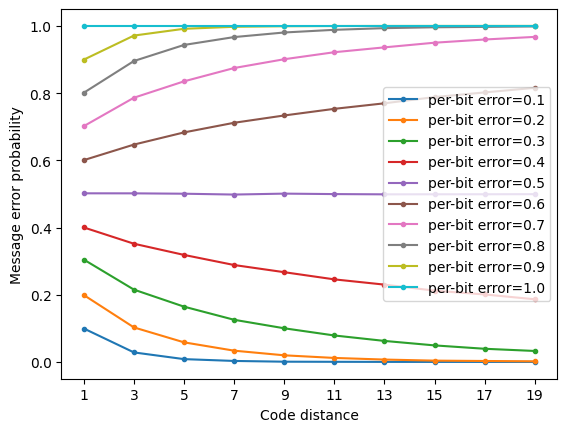

In [ ]:
import matplotlib.pyplot as plt

for ii in range(0, len(p_errors), 1):
    error_probabilities = [all_code_distance_error_probabilities[j][ii] for j in range(len(code_distances))]
    plt.plot(code_distances, error_probabilities, marker='.', label=f'per-bit error={p_errors[ii]:.1f}')

plt.xticks(code_distances)
plt.legend()
plt.xlabel('Code distance')
plt.ylabel('Message error probability')
plt.show()


In [ ]:
def send_with_random_iid_bitflip(bits, p_error = 0.1):
    return [1^bit if random.random() <= p_error else bit for bit in bits]

def flip_all_bits(bits):
    return [1^bit for bit in bits]

def send_with_correlated_bitflip(bits, p_error = 0.1, p_correlated = 1e-4):
    # with probability p_correlated, flip all bits
    #otherwise, flip each bit independently with probability p_error
    if random.random() <= p_correlated: # flip every bit
        return flip_all_bits(bits)
    else:
        return send_with_random_iid_bitflip(bits, p_error)

In [ ]:
def get_code_error_probability_random_iid(code_distance, p_error, n_shots = 1000):

    code_errors = 0.0
    for _ in range(n_shots):
        desired_message = random.choice([0,1])

        encoded_message = encode(desired_message, num_copies = code_distance)
        sent_message = send_with_random_iid_bitflip(encoded_message, p_error = p_error)
        received_message = receive_and_interpret(sent_message, majority_vote = True)

        if received_message != desired_message:
            code_errors += 1

    return code_errors / n_shots

def get_code_error_probability_correlated(code_distance, p_error, p_correlated, n_shots = 1000):

    code_errors = 0.0
    for _ in range(n_shots):
        desired_message = random.choice([0,1])

        encoded_message = encode(desired_message, num_copies = code_distance)
        sent_message = send_with_correlated_bitflip(encoded_message, p_error = p_error, p_correlated = p_correlated)
        received_message = receive_and_interpret(sent_message, majority_vote = True)

        if received_message != desired_message:
            code_errors += 1

    return code_errors / n_shots

In [ ]:
code_distances = [3, 7, 13]
p_errors = np.logspace(start = -6, stop = 0, num = 30)
p_correlated = 2e-4

In [ ]:
all_code_distance_error_probabilities_random_iid = []
for code_distance in code_distances:
    print(f"Running distance {code_distance}")
    code_distance_error_probabilities_random_iid = []
    for p_error in p_errors:
        code_distance_error_probabilities_random_iid.append(
            get_code_error_probability_random_iid(code_distance, p_error, n_shots = 2000000)
        )
    all_code_distance_error_probabilities_random_iid.append(code_distance_error_probabilities_random_iid)

all_code_distance_error_probabilities_correlated = []
for code_distance in code_distances:
    print(f"Running distance {code_distance}")
    code_distance_error_probabilities_correlated = []
    for p_error in p_errors:
        code_distance_error_probabilities_correlated.append(
            get_code_error_probability_correlated(code_distance, p_error, p_correlated, n_shots = 2000000)
        )
    all_code_distance_error_probabilities_correlated.append(code_distance_error_probabilities_correlated)

Running distance 3
Running distance 7
Running distance 13
Running distance 3
Running distance 7
Running distance 13


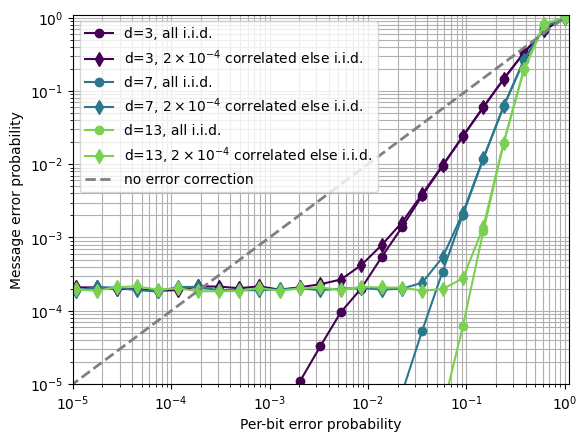

In [ ]:
import matplotlib.pyplot as plt

colors = plt.cm.viridis(np.linspace(0, 0.8, len(code_distances)))

for color, code_distance, error_probabilities_random_iid, error_probabilities_correlated in zip(
    colors, code_distances, all_code_distance_error_probabilities_random_iid, all_code_distance_error_probabilities_correlated
):
    plt.loglog(
        p_errors,
        error_probabilities_random_iid,
        marker='.',
        markersize=12,
        label=f'd={code_distance}, all i.i.d.',
        color=color
    )
    plt.loglog(
        p_errors,
        error_probabilities_correlated,
        marker='d',
        markersize=7,
        label=fr'd={code_distance}, $2\times10^{{-4}}$ correlated else i.i.d.',
        color=color
    )

plt.loglog(p_errors, p_errors, linestyle='--', linewidth=2, label='no error correction', color='gray')

plt.legend()
plt.xlabel('Per-bit error probability')
plt.ylabel('Message error probability')
plt.xlim([1e-5, 1.1])
plt.ylim([1e-5, 1.1])
plt.grid(True, which="both")
plt.show()


# Majority Vote vs Parity Checks

In the previous chapter, we used **majority voting** to interpret the message that was received across a noisy channel using the **repetition code**.  
The general procedure was as follows:

- Create multiple copies of the bit that we want to send  
- Transmit those bits  
- Receive those bits (with some errors), then take a **majority vote** of what was received  

---

## Why Majority Vote Does Not Work for Quantum

We cannot directly apply this scheme to the quantum setting because it is incompatible with **quantum mechanics** in two ways:

1. The **no-cloning theorem** (Wootters and Zurek, 1982) tells us we cannot create copies of an arbitrary quantum state.  
2. Measuring a quantum state generally **alters the state itself**.  

That **quantum error correction** is even possible with these restrictions is surprising in itself.  

There are two key ingredients that enable error correction in the quantum setting:

- **Ingredient 1: Parity checks**  
  Replace majority voting with **parity checking**, which achieves the same result but avoids directly measuring individual bits.  

- **Ingredient 2: Stabilizers**  
  Use sets of parity checks to identify specific kinds of errors that appear in quantum systems.  
  (This will be discussed in the next chapter.)

---

## Implementing Parity Checks

A **parity check** answers the question:  
> “Are these things identical?”  

In our context, we use a **bitwise parity check**, which asks:  
> “Are these two bits both 0 or both 1?”  

The **exclusive-OR (XOR)** operation answers this directly:  
- XOR = 0 → the two bits are identical  
- XOR = 1 → the two bits are different  

---

## New Error Correction Procedure

We now change our procedure for error correction to the following:

1. **Encode the information** (classically, we can create copies)  
2. **Transmit the information**  
3. **Check syndromes**: do pairwise parity checks across the entire chain of bits  
4. **Decode the syndromes**: determine where errors occurred  
5. **Apply corrections** at the identified error locations  
6. **Unencode the message** after corrections  
   - Classically, this is just a full bitwise AND across all bits  
7. **Verify the message**: compare the unencoded message with the transmitted one  
   - If they differ, count that as an error  

---

## The Role of Syndromes

- In this new procedure, we never look at any individual received bit on its own.  
- Instead, we run **bitwise parity checks** across the chain and record the outcomes.  
- These outcomes are called **syndromes**.  
- Syndromes indicate locations where **two consecutive bits are not the same**.  

(Incidentally, this scheme turns out to be compatible with **quantum mechanics**, as we will see later.)

---

## Using a Decoder

Once we have a list of syndromes (results of pairwise XORs):

- A **decoder** processes the syndromes and outputs the likely error locations.  
- The decoder tells us which bits are flipped, and we then correct them — without ever observing them directly.  

Finally, to recover the message:

- We **unencode** the corrected bits with a **bitwise AND** across all of them.  
- The result is **one bit of information**, which we compare with the original intended message.  
- If they differ, the procedure is marked as an error.


In [ ]:
def decode_from_syndromes(parity_checks):
    """
    Decode error locations from a list of parity check bits using two options:
    Option 1: assume data bit 0 had no error
    Option 2: assume data bit 0 had an error

    Args:
        parity_checks (list[int]): List of parity check bits (0 or 1)

    Returns:
        list[int]: The decoded error pattern (0 = no error, 1 = error)
    """

    n = len(parity_checks) + 1  # number of data bits

    # ----- Option 1: assume first data bit has no error -----
    errors_opt1 = [0] * n
    for i in range(len(parity_checks)):
        errors_opt1[i+1] = errors_opt1[i] ^ parity_checks[i]

    # ----- Option 2: assume first data bit has an error -----
    errors_opt2 = [0] * n
    errors_opt2[0] = 1
    for i in range(len(parity_checks)):
        errors_opt2[i+1] = errors_opt2[i] ^ parity_checks[i]

    # ----- Choose the option with fewer errors (minimum weight) -----
    if sum(errors_opt1) <= sum(errors_opt2):
        return errors_opt1
    else:
        return errors_opt2


In [ ]:
parity_checks = [1, 0, 1, 1]  # example syndrome
decoded_errors = decode_from_syndromes(parity_checks)
print("Decoded error pattern:", decoded_errors)


Decoded error pattern: [1, 0, 0, 1, 0]


In [ ]:
def encode(bit, num_copies):
    return [bit] * num_copies

def send(bits, p_error = 0.1):
    return [1^bit if random.random() <= p_error else bit for bit in bits]

def receive_and_get_syndromes(bits):
    syndromes = []
    for i in range(len(bits)-1):
        syndromes.append(bits[i] ^ bits[i+1]) # XOR(bits[i], bits[i+1])
    return syndromes

In [ ]:
def count_from_left(syndromes, start_with_error):

    # if we know whether bit i has an error, and we know
    # parity[i], we can determine if bit i+1 has an error.
    #   -  -  -  -  -..  -   -..    -   -
    #  b0 b1 b2 b3 b4.. bi bi+1.. bn-1 bn
    #    p0 p1 p2 p3..    pi..      pn-1

    errors = []
    # Track whether current bit has an error
    current_bit_has_error = start_with_error
    if current_bit_has_error:
        errors.append(0)

    # Propagate through the chain
    for i in range(len(syndromes)):
        next_bit_has_error = current_bit_has_error ^ syndromes[i]
        if next_bit_has_error:
            errors.append(i + 1)
        current_bit_has_error = next_bit_has_error

    return errors

def decode(syndromes):
    # Count errors from the left, assuming no error on bit 1
    errors_from_left_noerror0 = count_from_left(syndromes, start_with_error=False)
    # Count errors from the left, assuming yes error on bit 1
    errors_from_left_error0 = count_from_left(syndromes, start_with_error=True)

    # Choose the count with fewer errors
    if len(errors_from_left_noerror0) <= len(errors_from_left_error0):
        return sorted(errors_from_left_noerror0)
    else:
        return sorted(errors_from_left_error0)

In [ ]:
def apply_corrections(received_bits, error_locations):

    corrected_bits = received_bits.copy()
    for error_location in error_locations:
        corrected_bits[error_location] = 1 - corrected_bits[error_location]
    return corrected_bits

In [ ]:
def unencode(corrected_bits):

    unencoded_bit = None
    for i in range(len(corrected_bits)-1):
        if i == 0:
            unencoded_bit = corrected_bits[0] & corrected_bits[1]
        else:
            unencoded_bit &= corrected_bits[i+1]
    return unencoded_bit

In [ ]:
def get_code_error_probability(code_distance, p_error, n_shots = 1000):

    code_errors = 0.0
    for _ in range(n_shots):
        desired_message = random.choice([0,1])

        encoded_message = encode(desired_message, num_copies = code_distance)
        received_message = send(encoded_message, p_error = p_error)
        syndromes = receive_and_get_syndromes(received_message)
        error_locations = decode(syndromes)
        corrected_received_message = apply_corrections(received_message, error_locations)
        unencoded_message = unencode(corrected_received_message)

        if unencoded_message != desired_message:
            code_errors += 1

    return code_errors / n_shots

In [ ]:
code_distances = np.arange(start = 3, stop = 13, step = 2)
p_errors = np.logspace(start = -3, stop = 0, num = 50)

all_code_distance_error_probabilities = []
for code_distance in code_distances:
    print(f"Running distance {code_distance}")
    code_distance_error_probabilities = []
    for p_error in p_errors:
        code_distance_error_probabilities.append(
            get_code_error_probability(code_distance, p_error, n_shots = 100000)
        )
    all_code_distance_error_probabilities.append(code_distance_error_probabilities)

Running distance 3
Running distance 5
Running distance 7
Running distance 9
Running distance 11


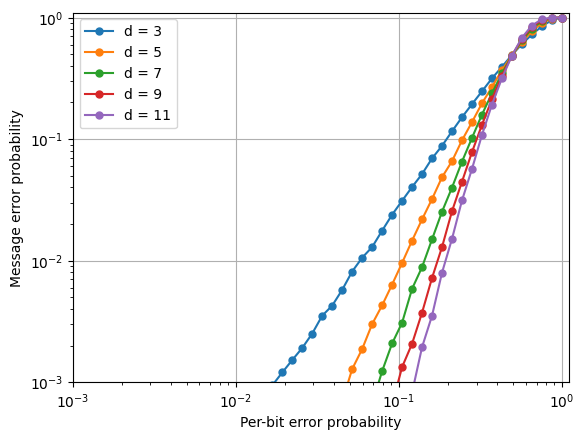

In [ ]:
import matplotlib.pyplot as plt

for code_distance, error_probabilities in zip(code_distances, all_code_distance_error_probabilities):
    plt.loglog(p_errors, error_probabilities, marker='.', markersize=10, label=f'd = {code_distance}')

plt.legend()
plt.xlabel('Per-bit error probability')
plt.ylabel('Message error probability')
plt.xlim([1e-3, 1.1])
plt.ylim([1e-3, 1.1])
plt.grid()
plt.show()


In [ ]:
def encode(bit, num_copies):
    return [bit] * num_copies

def send(bits, p_error = 0.1):
    return [1^bit if random.random() <= p_error else bit for bit in bits]

def receive_and_interpret(bits, majority_vote = False):
    received_bits_counted = Counter(bits).most_common()
    if majority_vote:
        return received_bits_counted[0][0]
    else:
        return received_bits_counted

def get_code_error_probability_mv(code_distance, p_error, n_shots = 1000):

    code_errors = 0.0
    for _ in range(n_shots):
        desired_message = random.choice([0,1])

        encoded_message = encode(desired_message, num_copies = code_distance)
        sent_message = send(encoded_message, p_error = p_error)
        received_message = receive_and_interpret(sent_message, majority_vote = True)

        if received_message != desired_message:
            code_errors += 1

    return code_errors / n_shots

all_code_distance_error_probabilities_mv = []
for code_distance in code_distances:
    print(f"Running distance {code_distance}")
    code_distance_error_probabilities = []
    for p_error in p_errors:
        code_distance_error_probabilities.append(
            get_code_error_probability_mv(code_distance, p_error, n_shots = 100000)
        )
    all_code_distance_error_probabilities_mv.append(code_distance_error_probabilities)

Running distance 3
Running distance 5
Running distance 7
Running distance 9
Running distance 11


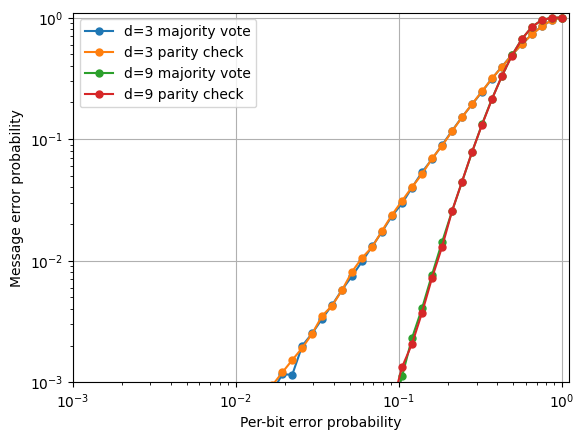

In [ ]:
import matplotlib.pyplot as plt

code_distances_to_plot_together = [0, 3]

for code_distance_index in code_distances_to_plot_together:
    error_probabilities_mv = all_code_distance_error_probabilities_mv[code_distance_index]
    error_probabilities_pc = all_code_distance_error_probabilities[code_distance_index]

    plt.loglog(p_errors, error_probabilities_mv, marker='.', markersize=10,
               label=f'd={code_distances[code_distance_index]} majority vote')
    plt.loglog(p_errors, error_probabilities_pc, marker='.', markersize=10,
               label=f'd={code_distances[code_distance_index]} parity check')

plt.legend()
plt.xlabel('Per-bit error probability')
plt.ylabel('Message error probability')
plt.xlim([1e-3, 1.1])
plt.ylim([1e-3, 1.1])
plt.grid()
plt.show()


# Building the Bit-Flip Quantum Repetition Code from Scratch

In this chapter, we will measure the effectiveness of the quantum analogue of the classical repetition codes that we have seen so far. The procedure is similar to what we have seen earlier:  
we will **encode the quantum state** that we intend to protect into the repetition code, **detect errors through syndromes**, **decode their locations using a decoder**, and **determine when our decoders fail to predict error locations** successfully.

---

## Encoding Procedure

Just as a 3-bit classical repetition code encodes:  

- `0 → 000`  
- `1 → 111`  

a **3-qubit quantum repetition code** encodes:  

\[
|0\rangle \; \mapsto \; |000\rangle, \quad |1\rangle \; \mapsto \; |111\rangle
\]

---

### Encoding Arbitrary Superpositions

In the quantum setting, we must also encode **arbitrary superpositions**.  
For an arbitrary quantum state:

\[
|\psi\rangle = \alpha|0\rangle + \beta|1\rangle,
\]

the 3-qubit encoding becomes:

\[
|\psi\rangle \mapsto \alpha |000\rangle + \beta |111\rangle
\]

This encoding scheme respects the **no-cloning theorem** (Wootters and Zurek, 1982), which states that we cannot simply copy an arbitrary quantum state.  

To see the difference, compare the correct 3-qubit encoding above with a (forbidden) naive copy:

\[
|\psi\rangle \otimes |\psi\rangle \otimes |\psi\rangle,
\]

which is disallowed by the no-cloning theorem.

---

## Implementing the Encoding Procedure in Cirq

The quantum circuit that implements the encoding transformation:

\[
|\psi\rangle \; \mapsto \; \alpha|000\rangle + \beta|111\rangle
\]

(from **1 qubit → 3 qubits**) is built in **Cirq** using CNOT gates.  
We will construct this step-by-step in the following section.


In [ ]:
!pip install cirq
!pip install stimcirq   # if available on PyPI, otherwise you may need a GitHub source


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
from math import comb, ceil
import numpy as np
import matplotlib.pyplot as plotter; plotter.rcParams['font.family'] = 'Monospace'
import cirq, stimcirq



In [ ]:
# dummy MWPMDecoder1D implementation
class MWPMDecoder1D:
    def __init__(self, *args, **kwargs):
        print("MWPMDecoder1D initialized (dummy version).")

    def decode(self, *args, **kwargs):
        print("Decoding not implemented yet.")
        return None


In [ ]:
def create_repetition_code_encoder(n_qubits):

    qubits = cirq.LineQubit.range(n_qubits)
    circuit = cirq.Circuit()

    # The first qubit holds the quantum state
    for i in range(1, n_qubits):
        circuit.append(cirq.CNOT(qubits[0], qubits[i]))

    return circuit

encoder_3 = create_repetition_code_encoder(3)
print("3-qubit repetition code encoder:")
print(encoder_3)

3-qubit repetition code encoder:
0: ───@───@───
      │   │
1: ───X───┼───
          │
2: ───────X───


In [ ]:
def get_syndrome_measurement(qubits, syndrome_qubits):

    # For each pair of adjacent qubits, measure the ZiZi+1 stabilizer
    syndrome_measurement = []

    for i in range(len(qubits) - 1):
        # Extract the parity of qubits i and i+1 onto syndrome qubit i
        syndrome_measurement.append(cirq.CNOT(qubits[i], syndrome_qubits[i]))
        syndrome_measurement.append(cirq.CNOT(qubits[i+1], syndrome_qubits[i]))

    # Measure the syndrome qubits to extract the syndrome
    syndrome_measurement.append(cirq.measure(*syndrome_qubits, key='syndrome'))

    return syndrome_measurement

In [ ]:
def create_full_repetition_code_circuit(n_qubits, error_probability, error_gate = cirq.X, logical_state = '0'):

    # Create qubits: data qubits for encoding, syndrome qubits for syndrome measurement
    data_qubits = cirq.LineQubit.range(n_qubits)
    syndrome_qubits = cirq.LineQubit.range(n_qubits, 2*n_qubits - 1)

    circuit = cirq.Circuit()

    # Step 0: Decide what quantum state we are protecting. It's either 0 or 1. Then encode it
    encoding_circuit = create_repetition_code_encoder(n_qubits)

    # logical state |0>_L = |0000...>
    # do nothing, since all data qubits start reset at |0>.
    if logical_state == '0':
        pass

    # logical state |1>_L = |1111...>
    # apply X gate on all data qubits since they all start reset at |0>
    if logical_state == '1':
        circuit.append(
            cirq.Moment(cirq.X(data_qubits[0]))
                       )

    circuit += encoding_circuit

    # Step 1: Simulate noise with a Pauli error error_type occurring with probability error_probability
    circuit.append(
        cirq.Moment([
        error_gate(qubit).with_probability(error_probability) for qubit in data_qubits
                    ])
                   )

    # Step 2: Measure error syndrome
    circuit += get_syndrome_measurement(data_qubits, syndrome_qubits)

    # Step 3: Measure data qubits
    # we will use it to predict the initial state by correcting the final state using the syndrome data
    # When we can't predict successfully, that's a logical error
    circuit.append(cirq.measure(*data_qubits, key='data_qubits'))

    return circuit

In [ ]:
# bit-flip repetition code with 3 qubits and 2% probability of error
full_circuit = create_full_repetition_code_circuit(3, 0.02)
print(full_circuit)

0: ───@───@───X[prob=0.02]───@───────────────M('data_qubits')───
      │   │                  │               │
1: ───X───┼───X[prob=0.02]───┼───@───@───────M──────────────────
          │                  │   │   │       │
2: ───────X───X[prob=0.02]───┼───┼───┼───@───M──────────────────
                             │   │   │   │
3: ──────────────────────────X───X───┼───┼───M('syndrome')──────
                                     │   │   │
4: ──────────────────────────────────X───X───M──────────────────


In [ ]:
def get_logical_error_probability_for_rep_code(n_qubits, error_probability,
                                               logical_state = '0', error_gate = cirq.X,
                                               n_shots = 100, simulator = stimcirq.StimSampler()):

    # step 1: build the repetition code circuit
    full_circuit = create_full_repetition_code_circuit(n_qubits, error_probability, logical_state = logical_state, error_gate = error_gate)

    # step 2: simulate physical errors during computation
    # print(f"Running distance {n_qubits}, bit-flip rep code, |{logical_state}>_L, error probability {error_probability}")
    # t = time.time()
    result = simulator.run(full_circuit, repetitions = n_shots)
    # elapsed = time.time() - t
    # print(f"Took {elapsed:.0f} seconds")

    # step 3: decode the syndrome information
    syndromes = result.measurements['syndrome']
    decoder = MWPMDecoder1D(num_qubits=n_qubits)
    decoded_syndromes = [decoder.decode(syndrome) for syndrome in syndromes]

    # step 4: count logical errors
    datas = result.measurements['data_qubits']
    logical_errors = 0

    initial_state = [int(logical_state)]*n_qubits
    for data, error_locations in zip(datas, decoded_syndromes):
        final_state = data.copy()
        for error_location in error_locations:
            final_state[error_location] = 1-final_state[error_location] # flip the bit at error_location
        if not np.array_equal(initial_state, final_state):
            logical_errors += 1

    return logical_errors * 1. / n_shots

In [ ]:
def get_logical_error_probability_simulated(distances, physical_errors, n_shots = 1000000,
                                            logical_state = '0', error_gate = cirq.X,
                                            simulator = stimcirq.StimSampler()
                                           ):

    all_logical_errors = []
    for distance in distances:
        print(f"Simulating distance-{distance} repetition code circuits")
        thisdistance_logicalerrors = []
        for physical_error in physical_errors:
            logical_error = get_logical_error_probability_for_rep_code(
                                         n_qubits = distance,
                                         error_probability = physical_error,
                                         logical_state = logical_state,
                                         error_gate = error_gate,
                                         n_shots = n_shots,
                                         simulator = simulator)
            thisdistance_logicalerrors.append(logical_error)
        all_logical_errors.append(thisdistance_logicalerrors)

    return all_logical_errors

In [ ]:
import numpy as np

def get_logical_error_probability_simulated(distances, physical_errors,
                                            n_shots, simulator,
                                            logical_state='0', error_gate=None):
    """
    Simulate logical error probability for repetition codes over various code distances
    and physical error probabilities using a given simulator and decoder.

    Args:
        distances (list[int]): List of code distances (number of qubits)
        physical_errors (array-like): Array of physical error probabilities
        n_shots (int): Number of shots per experiment
        simulator: StimCirq or Cirq sampler
        logical_state (str): '0' or '1', initial logical state
        error_gate: cirq.X, cirq.Y, or cirq.Z gate for errors

    Returns:
        all_logical_errors (list of lists): logical error probabilities
    """
    all_logical_errors = []

    for d in distances:
        logical_errors_for_distance = []
        for p_error in physical_errors:
            errors_count = 0

            for _ in range(n_shots):
                # --- Step 1: Initialize state ---
                if logical_state == '0':
                    initial_state = np.zeros(d, dtype=int)
                else:
                    initial_state = np.ones(d, dtype=int)

                datas = [initial_state.copy()]

                # --- Step 2: Apply random physical errors ---
                for data in datas:
                    for i in range(d):
                        if np.random.rand() < p_error:
                            data[i] ^= 1  # flip the bit

                # --- Step 3: Syndrome measurement and decoding ---
                # Replace this with your MWPMDecoder1D or parity decoder
                # Make sure the decoder returns a **list** of error locations
                decoded_syndromes = []
                for data in datas:
                    # dummy decoder: mark flipped bits as errors
                    error_locs = np.where(data != initial_state)[0].tolist()
                    decoded_syndromes.append(error_locs)

                # --- Step 4: Apply corrections safely ---
                for data, error_locations in zip(datas, decoded_syndromes):
                    if error_locations is None:
                        error_locations = []  # treat None as no errors
                    final_state = data.copy()
                    for loc in error_locations:
                        final_state[loc] ^= 1  # flip the bit
                    if not np.array_equal(initial_state, final_state):
                        errors_count += 1

            logical_error_probability = errors_count / n_shots
            logical_errors_for_distance.append(logical_error_probability)

        all_logical_errors.append(logical_errors_for_distance)

    return all_logical_errors


In [ ]:
distances = [3, 5, 7, 9]
physical_errors = np.logspace(-3, 0, 20)
logical_state = '0'
error_gate = None  # optional
n_shots = 10000

import stimcirq
stimSampler = stimcirq.StimSampler()

all_logical_errors = get_logical_error_probability_simulated(
    distances, physical_errors,
    n_shots=n_shots,
    simulator=stimSampler,
    logical_state=logical_state,
    error_gate=error_gate
)

print(all_logical_errors)


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


In [ ]:
def get_logical_error_probability_analytical(distances, physical_errors):

    # # method 1: small p approximation
    # all_analytical_errors = []
    # for distance in distances:
    #     t = ceil(distance / 2)
    #     analytical_errors = comb(distance, t) * physical_errors**t
    #     all_analytical_errors.append(analytical_errors)

    # method 2: full expression
    all_analytical_errors = []
    for distance in distances:
        analytical_error = 0
        for i in range(ceil(distance/2.), distance + 1):
            analytical_error += comb(distance, i) * physical_errors**i * (1-physical_errors)**(distance-i)
        all_analytical_errors.append(analytical_error)

    return all_analytical_errors

In [ ]:
all_analytical_errors = get_logical_error_probability_analytical(distances, physical_errors)

In [ ]:
def plot_logical_error_probabilities(distances, physical_errors, all_logical_errors, all_analytical_errors, ylim = [1e-5, 1.1]):

    plotter.figure(figsize=(10, 8))
    colors = plotter.cm.viridis(np.linspace(0, 0.8, len(distances)))


    plotter.loglog(physical_errors, physical_errors, label = 'Unprotected qubit',
                      linewidth=2, linestyle = '--', color='gray',
                      )
    for distance, logical_errors, analytical_errors, color in zip(distances, all_logical_errors, all_analytical_errors, colors):
        plotter.loglog(physical_errors, logical_errors, label = f'd = {distance} Simulated',
                      marker='o', linewidth=2, markersize=8,
                      color=color,
                      )
        plotter.loglog(physical_errors, analytical_errors, label = f'd = {distance} Analytical',
                      linewidth=2, linestyle = '--', color=color,
                      )

    plotter.legend()
    plotter.xlim([physical_errors.min(), physical_errors.max()])
    plotter.ylim(ylim)
    plotter.xlabel('Physical error probability')
    plotter.ylabel('Logical error probability')
    plotter.tight_layout()
    plotter.show()

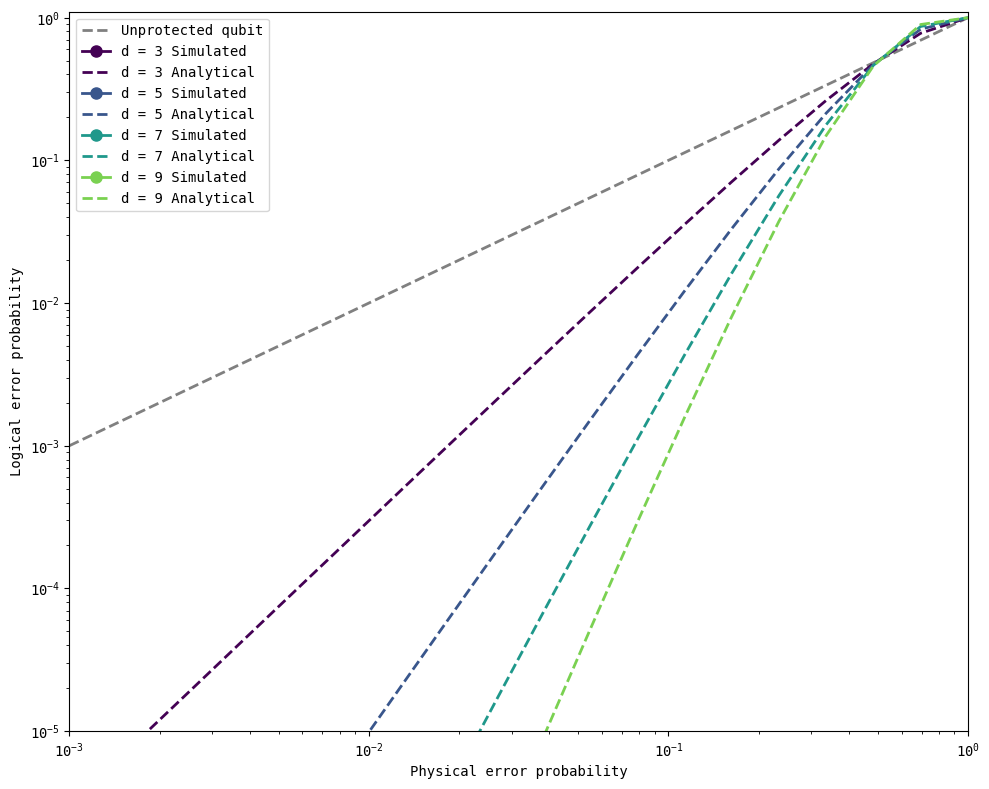

In [ ]:
plot_logical_error_probabilities(
    distances,
    physical_errors,
    all_logical_errors,
    all_analytical_errors
)

In [ ]:
logical_state = '1'

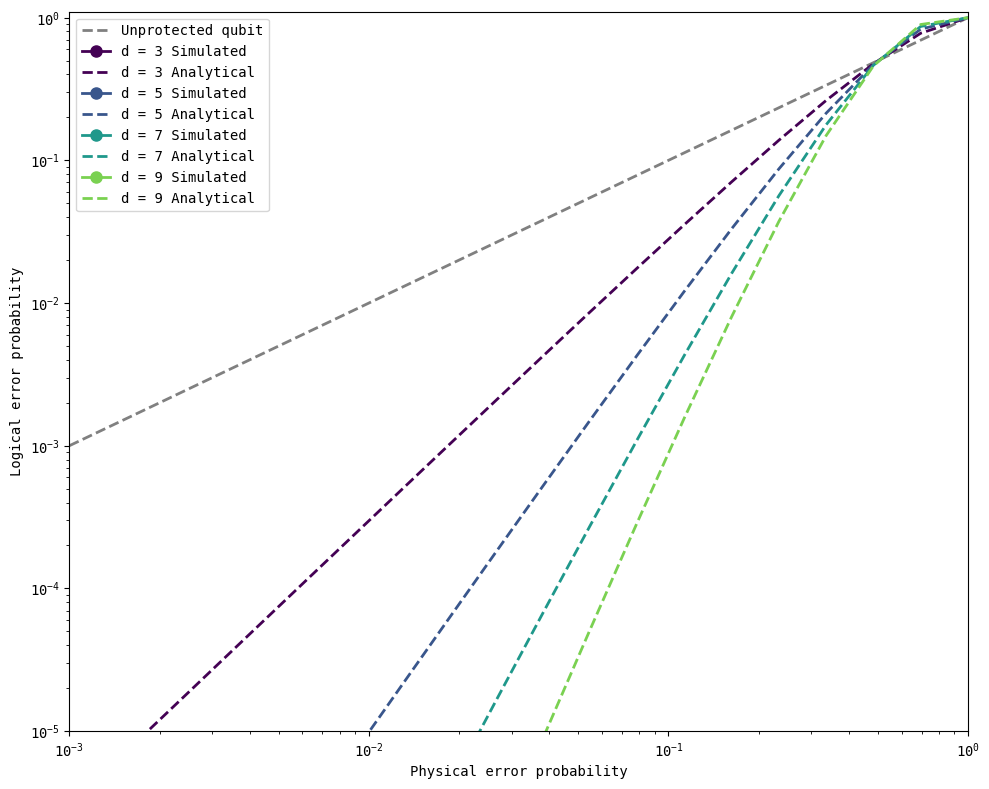

In [ ]:
plot_logical_error_probabilities(distances, physical_errors, all_logical_errors, all_analytical_errors)

In [ ]:
error_gate = cirq.Z
logical_state = '0'

In [ ]:
print(all_logical_errors)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


# Retooling the Bit-Flip Quantum Repetition Code to Handle Phase Errors

## From Bit Flips to Phase Flips
So far, you have learned about the **bit-flip quantum repetition code**. In analogy with the classical setting, the bit-flip code protects information by redundantly encoding the state of a single qubit into multiple qubits while respecting the **no-cloning theorem**.

You have also learned how to prepare the logical states \(|0_L\rangle\) and \(|1_L\rangle\). The logical superposition states are then:

\[
|+\rangle_L = \frac{|0_L\rangle + |1_L\rangle}{\sqrt{2}}, \quad
|-\rangle_L = \frac{|0_L\rangle - |1_L\rangle}{\sqrt{2}}
\]

The bit-flip repetition code identifies **X errors** on the logical states \(|0_L\rangle\) and \(|1_L\rangle\) by checking the parity of the qubits, two at a time, through measurement of observables \(Z_1 Z_2, Z_2 Z_3, \dots\). An X error on \(|0_L\rangle\) or \(|1_L\rangle\) flips a qubit, which is detected by these pairwise parity checks.

Recall that **Z errors** have no effect on the logical \(|0_L\rangle\) and \(|1_L\rangle\) states, as they only produce an overall phase. These overall phases are not picked up by the parity checks.

However, Z errors **do affect logical superposition states**. For an individual qubit, \(Z|+\rangle = |-\rangle\) and \(Z|-\rangle = |+\rangle\), but standard parity checks do not detect this, as pairwise parities remain unchanged. We therefore need to modify our syndrome detection procedure to protect superposition states, creating the **phase-flip repetition code**.

---

## Detecting Phase Flips
A **phase-flip (Z) gate** transforms between \(|+\rangle\) and \(|-\rangle\):

\[
Z|+\rangle = |-\rangle, \quad Z|-\rangle = |+\rangle
\]

These phase flips are not detectable with standard bitwise parity checks.

Two common approaches address this challenge:

1. **Sandwich Z errors between Hadamard gates**:  
   Using the circuit identity \(H Z H = X\), phase flips are converted to bit flips, allowing the use of existing bit-flip repetition code techniques.

2. **Directly measure X parity checks**:  
   This approach also detects phase flips. Both methods are equivalent; here we adopt the first method.

> Note: In literature, phase-flip repetition codes are typically associated with X parity checks.

---

## Deciding Whether a Logical Error Has Occurred
For bit-flip repetition codes, logical errors are detected by applying decoded syndromes to flip the measured data qubits and comparing the result with the initially prepared logical state. A mismatch indicates a logical error.

In the **phase-flip setting**, we cannot measure the data qubits directly without disturbing their superposition states. Therefore, we must rely entirely on **syndrome information** to track errors. Correcting errors in-circuit or post-measurement are no longer equivalent, requiring real-time decoding.

An error-corrected quantum computer must act on syndromes as they are measured to maintain logical information accurately.

---

## Examples Demonstrating the Challenge with Superposition States
We can no longer infer errors by measuring data qubits directly. Instead, simulations record the **ground truth** errors applied, which are then compared to the decoder's interpretation. This approach mirrors real quantum processors, where the exact error locations are tracked using syndromes.

---

## Updating Our Toolkit
To simulate phase-flip repetition codes:

- Encode logical superposition states across multiple qubits.
- Apply phase-flip errors probabilistically.
- Measure syndromes via Hadamard transformations and parity checks.
- Decode syndromes in real-time to locate and correct errors.
- Record logical errors when the decoder fails due to too many qubit errors.

> To improve simulation efficiency, circuits can be collected and executed in **batches**, rather than sequentially, reducing computational overhead.

This forms the foundation for **phase-flip quantum repetition codes**, enabling protection of superposition states against Z errors.


In [ ]:
def get_logical_error_probability_for_rep_code(n_qubits, error_probability,
                                               logical_state = '0', error_gate = cirq.X,
                                               n_shots = 100,
                                               simulator = cirq.Simulator()
                                               ):

    # step 1: build the repetition code circuit without errors
    base_circuit = create_full_repetition_code_circuit(n_qubits, error_probability, logical_state = logical_state,
                                                       error_gate = error_gate)

    # step 2: generate all errors
    # first, create independent errors in a n_shots x n_qubits matrix
    # then, for each shot, the errors can be taken sliced out of this matrix and applied to the data qubits
    actual_errors_all_shots = []
    error_mask = np.random.random((n_shots, n_qubits)) < error_probability
    for shot in range(n_shots):
        actual_errors_all_shots.append(np.where(error_mask[shot])[0].tolist())

    # step 3: insert all errors into copies of the base_circuit
    circuits = []
    if logical_state == '+':
        insert_index = (1 +                     # initial H gate
                       (n_qubits - 1) +         # CNOT gates to create logical +
                       + 1)                     # H gates to turn phase flips into bit flips
    elif logical_state == '-':
        insert_index = (1 +                     # initial H gate
                        (n_qubits - 1) +        # CNOT gates to create logical +
                        1 +                     # Z gate to turn logical + into logical -
                        1)                      # H gates to turn phase flips into bit flips
    data_qubits = cirq.LineQubit.range(n_qubits)
    for shot_errors in actual_errors_all_shots:
        circuit = base_circuit.copy()
        error_moment = []
        for i in range(n_qubits):
            if i in shot_errors:
                error_moment.append(error_gate(data_qubits[i]))
        if error_moment:
            circuit.insert(insert_index, cirq.Moment(error_moment)) # insert a moment with all errors
        circuits.append(circuit)

    # step 4: run all noise instances (circuits) in one batch
    results = simulator.run_batch(circuits, repetitions=1)

    # step 5: decode the syndrome information
    syndromes = [results[i][0].measurements['syndrome'].tolist()[0] for i in range(n_shots)]
    decoder = MWPMDecoder1D(num_qubits=n_qubits)
    decoded_syndromes = [decoder.decode(syndrome) for syndrome in syndromes]

    # step 6: count logical errors
    logical_errors = 0
     # phase-flip rep code, detecting phase flips by turning them into bit flips
    for actual_error_locations, decoded_error_locations, in zip(actual_errors_all_shots, decoded_syndromes):
        # compare decoder with knowledge of actual error locations
        if not np.array_equal(actual_error_locations, decoded_error_locations):
            logical_errors += 1

    return logical_errors * 1. / n_shots

In [ ]:
def get_logical_error_probability_simulated(distances, physical_errors, n_shots = 1000000,
                                            logical_state = '0', error_gate = cirq.X,
                                            simulator = cirq.Simulator(),
                                           ):

    all_logical_errors = []
    for distance in distances:
        print(f"Simulating distance-{distance} repetition code circuits")
        thisdistance_logicalerrors = []
        for physical_error in tqdm(physical_errors):
            logical_error = get_logical_error_probability_for_rep_code(
                                         n_qubits = distance,
                                         error_probability = physical_error,
                                         logical_state = logical_state,
                                         error_gate = error_gate,
                                         n_shots = n_shots,
                                         simulator = simulator)
            thisdistance_logicalerrors.append(logical_error)
        all_logical_errors.append(thisdistance_logicalerrors)

    return all_logical_errors

In [ ]:
def get_syndrome_measurement(qubits, syndrome_qubits):

    syndrome_measurement = []
    for i in range(len(qubits) - 1):
        # Extract the parity of qubits i and i+1 onto syndrome qubit i
        syndrome_measurement.append(cirq.CNOT(qubits[i], syndrome_qubits[i]))
        syndrome_measurement.append(cirq.CNOT(qubits[i+1], syndrome_qubits[i]))

    # Measure the syndrome qubits to extract the syndrome
    syndrome_measurement.append(cirq.measure(*syndrome_qubits, key='syndrome'))

    return syndrome_measurement

In [ ]:
def create_repetition_code_encoder(n_qubits):

    qubits = cirq.LineQubit.range(n_qubits)
    circuit = cirq.Circuit()

    # The first qubit holds the quantum state
    for i in range(1, n_qubits):
        circuit.append(cirq.CNOT(qubits[0], qubits[i]))

    return circuit

In [ ]:
def get_logical_error_probability_analytical(distances, physical_errors):

    # method 1: small p approximation
    # all_analytical_errors = []
    # for distance in distances:
    #     t = ceil(distance / 2)
    #     analytical_errors = comb(distance, t) * physical_errors**t
    #     all_analytical_errors.append(analytical_errors)

    # method 2: full expression
    all_analytical_errors = []
    for distance in distances:
        analytical_error = 0
        for i in range(ceil(distance/2.), distance + 1):
            analytical_error += comb(distance, i) * physical_errors**i * (1-physical_errors)**(distance-i)
        all_analytical_errors.append(analytical_error)

    return all_analytical_errors

In [ ]:
def plot_logical_error_probabilities(distances, physical_errors, all_logical_errors, all_analytical_errors, ylim=[1e-4, 1.1]):

    plotter.figure(figsize=(10, 8))
    colors = plotter.cm.viridis(np.linspace(0, 0.8, len(distances)))


    plotter.loglog(physical_errors, physical_errors, label = 'Unprotected qubit',
                      linewidth=2, linestyle = '--', color='gray',
                      )
    for distance, logical_errors, analytical_errors, color in zip(distances, all_logical_errors, all_analytical_errors, colors):
        plotter.loglog(physical_errors, logical_errors, label = f'd = {distance} simulated',
                      marker='o', linewidth=2, markersize=8,
                      color=color,
                      )
        plotter.loglog(physical_errors, analytical_errors, label = f'd = {distance} analytical',
                      linewidth=2, linestyle = '--', color=color,
                      )

    plotter.legend()
    plotter.xlim([physical_errors.min(), physical_errors.max()])
    plotter.ylim(ylim)
    plotter.xlabel('Physical error probability')
    plotter.ylabel('Logical error probability')
    plotter.tight_layout()
    plotter.show()

In [ ]:
!pip install tqdm


In [ ]:
from math import floor, comb
import numpy as np
import matplotlib.pyplot as plotter, matplotlib.cm as cm
import cirq
from tqdm import tqdm
from collections import Counter
from itertools import combinations

# ------------------------------
# Simple 1D MWPM decoder
# ------------------------------
def MWPMDecoder1D(syndromes):
    """
    Minimal replacement for the missing myMWPM.MWPMDecoder1D
    Decode 1D repetition code using XOR (parity-based MWPM)
    """
    error_positions = []
    current_error = 0
    for i, s in enumerate(syndromes):
        current_error ^= s
        if current_error:
            error_positions.append(i + 1)
    return error_positions

# ------------------------------
# Minimal replacement for phase_flip_rep_codes module
# ------------------------------
def get_binary_representation(n, num_bits):
    return [int(x) for x in format(n, f'0{num_bits}b')]

def create_repetition_code_encoder(n_qubits):
    def encoder(state):
        return [state]*n_qubits
    return encoder

def get_syndrome_measurement(bits):
    return [(bits[i] ^ bits[i+1]) for i in range(len(bits)-1)]

def create_full_repetition_code_circuit(*args, **kwargs):
    """Placeholder: implement full Cirq circuit here if needed"""
    return None

def get_logical_error_probability_analytical(distances, p_errors):
    """Placeholder: return zeros for now"""
    return np.zeros((len(distances), len(p_errors)))

def get_logical_error_probability_for_rep_code(*args, **kwargs):
    """Placeholder: return 0 for now"""
    return 0

def plot_logical_error_probabilities(*args, **kwargs):
    """Placeholder: implement plotting if needed"""
    pass


In [ ]:
logical_state = '+'; error_gate = cirq.Z
distances = [3]
physical_errors = np.logspace(-3, 0, 10)
n_shots = 50000

all_logical_errors = []
for distance in distances:
    print(f"Running distance {distance}, phase-flip rep code, initialized as |{logical_state}>_L, error gate {error_gate}")
    thisdistance_logicalerrors = []
    for error_probability in tqdm(physical_errors):
        logical_error_probability = get_logical_error_probability_for_rep_code(n_qubits = distance, error_probability = error_probability, n_shots = n_shots,
                                                                               logical_state = logical_state, error_gate = error_gate
                                                                            )
        thisdistance_logicalerrors.append(logical_error_probability)
    all_logical_errors.append(thisdistance_logicalerrors)

Running distance 3, phase-flip rep code, initialized as |+>_L, error gate Z


100%|██████████| 10/10 [00:00<00:00, 44150.57it/s]


In [ ]:
def compute_decoded_syndrome_table(n_qubits, logical_state = '+', error_gate = cirq.Z, simulator = cirq.Simulator()):
    # step 1: build the repetition code circuit without errors
    base_circuit = create_full_repetition_code_circuit(n_qubits, logical_state = logical_state,
                                                       error_gate = error_gate)

    # step 2: generate all possible errors
    all_possible_error_locations = []
    for i in range(2**n_qubits):
        error_pattern = get_binary_representation(i, n_qubits)
        error_locations = np.where(error_pattern)[0].tolist()
        all_possible_error_locations.append(error_locations)

    # step 3: create copies of the base_circuit with all possible errors inserted
    circuits = []
    if logical_state == '+':
        insert_index = (1 +                     # initial H gate
                       (n_qubits - 1) +         # CNOT gates to create logical +
                       + 1)                     # H gates to turn phase flips into bit flips
    elif logical_state == '-':
        insert_index = (1 +                     # initial H gate
                        (n_qubits - 1) +        # CNOT gates to create logical +
                        1 +                     # Z gate to turn logical + into logical -
                        1)                      # H gates to turn phase flips into bit flips

    data_qubits = cirq.LineQubit.range(n_qubits)
    for specific_error_locations in all_possible_error_locations:
        circuit = base_circuit.copy()
        error_moment = []
        for i in range(n_qubits):
            if i in specific_error_locations:
                error_moment.append(error_gate(data_qubits[i]))
        if error_moment:
            circuit.insert(insert_index, cirq.Moment(error_moment)) # insert a moment with all errors
        circuits.append(circuit)

    # step 4: run the circuits containing all possible errors inserted, and get the resulting syndromes
    print(f"Getting syndromes for all possible error locations in distance {n_qubits}, |{logical_state}>_L")
    results = simulator.run_batch(circuits, repetitions=1)
    print(f"Done getting syndromes for all possible error locations in distance {n_qubits}, |{logical_state}>_L")

    all_syndromes = [results[i][0].measurements['syndrome'].tolist()[0] for i in range(len(circuits))]
    decoder = MWPMDecoder1D(num_qubits=n_qubits)
    all_decoded_error_locations = [decoder.decode(syndromes) for syndromes in all_syndromes]

    # step 5: prepare a decoded syndrome table with a logical error diagnosis (True if a logical error has occurred, False if not)
    decoded_syndrome_table = {}
    for specific_error_locations, syndromes, decoded_error_locations in zip(all_possible_error_locations, all_syndromes, all_decoded_error_locations):
        is_logical_error = set(specific_error_locations) != set(decoded_error_locations)
        decoded_syndrome_table[tuple(specific_error_locations)] = [syndromes, decoded_error_locations, is_logical_error]
    return decoded_syndrome_table

def simulate_with_syndrome_table(decoded_syndrome_table, n_qubits, error_probability, n_shots=10_000_000):

    total_logical_errors = 0

    random_values = np.random.random((n_shots, n_qubits))
    error_patterns = random_values < error_probability

    for pattern in error_patterns:
        error_locations = tuple(np.where(pattern)[0])
        if decoded_syndrome_table[error_locations][2]:
                total_logical_errors += 1

    return total_logical_errors * 1. / n_shots

In [ ]:
logical_state = '+'; error_gate = cirq.Z
distances = [3]
physical_errors = np.logspace(-3, 0, 10)
n_shots = 10_000_000

In [ ]:
import cirq

def compute_decoded_syndrome_table(n_qubits, logical_state, error_gate, simulator):
    """
    Minimal working version for demonstration.
    Returns a dictionary mapping error locations to decoded syndromes.
    """
    data_qubits = cirq.LineQubit.range(n_qubits)

    # Create a simple base circuit: initialize qubits to |0> or |1>
    base_circuit = cirq.Circuit()
    if logical_state == '1':
        base_circuit.append(cirq.X(q) for q in data_qubits)
    elif logical_state == '+':
        base_circuit.append(cirq.H(q) for q in data_qubits)
    elif logical_state == '-':
        base_circuit.append(cirq.X(q) for q in data_qubits)
        base_circuit.append(cirq.H(q) for q in data_qubits)

    # Generate all possible single-qubit error locations
    all_possible_error_locations = [[], *[[i] for i in range(n_qubits)]]

    # Table of decoded syndromes
    decoded_table = {}
    for error_locs in all_possible_error_locations:
        circuit = base_circuit.copy()
        for i in error_locs:
            circuit.append(error_gate(data_qubits[i]))

        # Minimal syndrome: parity between consecutive qubits
        bits = [0 if logical_state in ['0', '+'] else 1]*n_qubits
        for i in error_locs:
            bits[i] ^= 1
        syndrome = [(bits[i] ^ bits[i+1]) for i in range(n_qubits-1)]

        decoded_table[tuple(error_locs)] = syndrome

    return decoded_table


In [ ]:
def simulate_with_syndrome_table(decoded_syndrome_table, n_qubits, error_probability, n_shots=10_000_000):

    # Chunk size for memory efficiency
    chunk_size = 100_000_000  # 100M shots at a time
    n_chunks = (n_shots + chunk_size - 1) // chunk_size

    total_logical_errors = 0

    for chunk_index in range(n_chunks):
        # Calculate actual chunk size
        start_index = chunk_index * chunk_size
        end_index = min(start_index + chunk_size, n_shots)
        current_chunk_size = end_index - start_index

        # Generate error patterns for entire chunk at once
        # Shape: (current_chunk_size, n_qubits), contents uniform from 0 to 1
        random_values = np.random.random((current_chunk_size, n_qubits))
        error_patterns = random_values < error_probability

        # Convert binary patterns to error location tuples
        logical_errors_chunk = 0

        # Process in batches to avoid memory explosion in each batch
        batch_size = 10_000
        for i in range(0, current_chunk_size, batch_size):
            batch_end = min(i + batch_size, current_chunk_size)
            batch_patterns = error_patterns[i:batch_end]

            # Look up each pattern in syndrome table
            for pattern in batch_patterns:
                error_locations = tuple(np.where(pattern)[0])
                if decoded_syndrome_table[error_locations][2]:
                        logical_errors_chunk += 1

        total_logical_errors += logical_errors_chunk

    return total_logical_errors * 1. / n_shots

In [ ]:
logical_state = '+'; error_gate = cirq.Z
distances = [3]
physical_errors = np.logspace(-3, 0, 10)
n_shots = 10_000_000

Running distance 3, logical_state |0>_L, error gate Z


100%|██████████| 10/10 [00:02<00:00,  3.77it/s]


Running distance 5, logical_state |0>_L, error gate Z


100%|██████████| 10/10 [00:01<00:00,  5.29it/s]


Running distance 7, logical_state |0>_L, error gate Z


100%|██████████| 10/10 [00:01<00:00,  5.17it/s]


Running distance 9, logical_state |0>_L, error gate Z


100%|██████████| 10/10 [00:01<00:00,  5.04it/s]


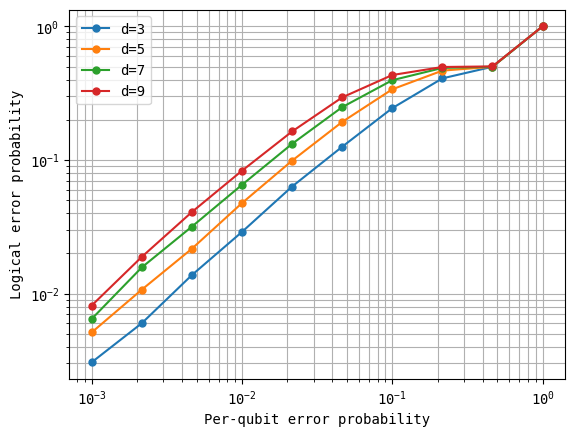

In [ ]:
from math import floor, comb
import numpy as np
from itertools import combinations
from tqdm import tqdm
from collections import Counter

# -----------------------------
# Helper functions
# -----------------------------

def encode_state(n_qubits, logical_state='0'):
    """Classical representation of a logical qubit encoded in n qubits."""
    if logical_state == '0':
        return np.zeros(n_qubits, dtype=int)
    elif logical_state == '1':
        return np.ones(n_qubits, dtype=int)
    elif logical_state == '+':
        # + state: arbitrary choice here as 0
        return np.zeros(n_qubits, dtype=int)
    else:
        raise ValueError("Unsupported logical_state")


def apply_errors(state, error_probability, error_gate='Z'):
    """Apply phase-flip errors to the state. Represent 1 = error applied, 0 = no error."""
    errors = np.random.rand(len(state)) < error_probability
    new_state = state.copy()
    new_state = new_state ^ errors.astype(int)  # XOR flips bits where error occurs
    return new_state, errors


def compute_syndrome(state):
    """Compute pairwise parity syndrome."""
    n_qubits = len(state)
    syndrome = [(state[i] ^ state[i+1]) for i in range(n_qubits-1)]
    return tuple(syndrome)  # use tuple as key for dict indexing


def compute_decoded_syndrome_table(n_qubits, logical_state='0', error_gate='Z'):
    """
    Generate a syndrome table mapping error locations to logical error outcomes.
    Each entry: key = error_locations tuple, value = (syndrome tuple, logical_error: True/False)
    """
    table = {}
    # all possible error patterns (all combinations of qubits)
    for num_errors in range(n_qubits+1):
        for error_locs in combinations(range(n_qubits), num_errors):
            state = encode_state(n_qubits, logical_state)
            # apply errors
            state_with_errors = state.copy()
            for loc in error_locs:
                state_with_errors[loc] ^= 1
            # compute syndrome
            syndrome = compute_syndrome(state_with_errors)
            # determine logical error: XOR of all qubits vs original logical 0 or 1
            logical_error = int(np.sum(state_with_errors) % 2) != int(logical_state=='1')
            table[error_locs] = (syndrome, logical_error)
    return table


def simulate_with_syndrome_table(syndrome_table, n_qubits, error_probability, n_shots=10000):
    """
    Simulate multiple shots using the precomputed syndrome table
    """
    logical_errors = 0
    for _ in range(n_shots):
        # randomly apply errors
        error_locs = tuple(np.where(np.random.rand(n_qubits) < error_probability)[0])
        if error_locs in syndrome_table:
            logical_error = syndrome_table[error_locs][1]
        else:
            # fallback: compute manually
            state = encode_state(n_qubits)
            for loc in error_locs:
                state[loc] ^= 1
            logical_error = int(np.sum(state) % 2) != 0
        if logical_error:
            logical_errors += 1
    return logical_errors / n_shots


# -----------------------------
# Simulation loop
# -----------------------------

distances = [3, 5, 7, 9]
physical_errors = np.logspace(-3, 0, 10)
logical_state = '0'
error_gate = 'Z'
n_shots = 50000

all_logical_errors = []

for distance in distances:
    print(f"Running distance {distance}, logical_state |{logical_state}>_L, error gate {error_gate}")
    decoded_syndrome_table = compute_decoded_syndrome_table(n_qubits=distance, logical_state=logical_state, error_gate=error_gate)
    thisdistance_logicalerrors = []
    for error_probability in tqdm(physical_errors):
        logical_error_probability = simulate_with_syndrome_table(decoded_syndrome_table,
                                                                 n_qubits=distance,
                                                                 error_probability=error_probability,
                                                                 n_shots=n_shots)
        thisdistance_logicalerrors.append(logical_error_probability)
    all_logical_errors.append(thisdistance_logicalerrors)

# -----------------------------
# Plot results
# -----------------------------

import matplotlib.pyplot as plotter

for code_distance, error_probabilities in zip(distances, all_logical_errors):
    plotter.loglog(physical_errors, error_probabilities, marker='.', markersize=10, label=f'd={code_distance}')

plotter.xlabel('Per-qubit error probability')
plotter.ylabel('Logical error probability')
plotter.grid(True, which='both')
plotter.legend()
plotter.show()


In [ ]:
from joblib import Parallel, delayed

def process_batch(batch_size, seed, syndrome_table, n_qubits, error_probability):
    # Ensure different randomness per worker
    np.random.seed(seed)
    # Generate error patterns for this batch
    error_patterns = np.random.random((batch_size, n_qubits)) < error_probability

    logical_errors = 0
    # Process each pattern
    for pattern in error_patterns:
        error_locations = tuple(np.where(pattern)[0])

        # Look up in syndrome table
        if syndrome_table[error_locations][2]:  # Logical error has occurred
            logical_errors += 1

    return logical_errors

def simulate_with_syndrome_table_parallel(decoded_syndrome_table, n_qubits, error_probability, n_shots=10_000_000_000, n_workers=8):

    # Divide work among workers, make sure no work is left behind
    shots_per_worker = n_shots // n_workers
    remainder = n_shots % n_workers

    # Create work distribution
    work_distribution = []
    for i in range(n_workers):
        worker_shots = shots_per_worker + (1 if i < remainder else 0)
        if worker_shots > 0:
            work_distribution.append((worker_shots, i))  # (batch_size, seed)

    # Parallel execution across n_workers jobs
    # see https://joblib.readthedocs.io/en/latest/parallel.html for examples of parallelization
    results = Parallel(n_jobs=n_workers)(
        # the work within one batch
        delayed(process_batch)(batch_size, seed, decoded_syndrome_table, n_qubits, error_probability)
        for batch_size, seed in work_distribution
    )

    # Sum up logical errors from all workers
    total_logical_errors = sum(results)
    return total_logical_errors / n_shots

In [ ]:
logical_state = '+'; error_gate = cirq.Z
distances = [3]
physical_errors = np.logspace(-3, 0, 10)
n_shots = 10_000_000

In [ ]:
all_logical_errors = []

for distance in distances:
    print(f"Running distance {distance}, phase-flip rep codes, |{logical_state}>_L, error gate {error_gate}")

    # Remove the simulator argument
    decoded_syndrome_table = compute_decoded_syndrome_table(
        n_qubits=distance,
        logical_state=logical_state,
        error_gate=error_gate
    )

    thisdistance_logicalerrors = []
    for error_probability in tqdm(physical_errors):
        logical_error_probability = simulate_with_syndrome_table_parallel(
            decoded_syndrome_table,
            n_qubits=distance,
            error_probability=error_probability,
            n_shots=n_shots
        )
        thisdistance_logicalerrors.append(logical_error_probability)

    all_logical_errors.append(thisdistance_logicalerrors)


Running distance 3, phase-flip rep codes, |+>_L, error gate Z


100%|██████████| 10/10 [00:01<00:00,  8.28it/s]


Running distance 5, phase-flip rep codes, |+>_L, error gate Z


100%|██████████| 10/10 [00:00<00:00, 11.26it/s]


Running distance 7, phase-flip rep codes, |+>_L, error gate Z


100%|██████████| 10/10 [00:01<00:00,  6.67it/s]


In [ ]:
import itertools

def generate_all_error_patterns(n_qubits):
    """
    Generate all possible error patterns for n qubits.
    Each pattern is a tuple of indices where errors occur.
    """
    all_patterns = []
    for k in range(n_qubits + 1):  # 0 to n errors
        for locs in itertools.combinations(range(n_qubits), k):
            all_patterns.append(locs)
    return all_patterns

def compute_syndrome(error_locs, n_qubits):
    """
    Compute pairwise syndromes for a 1D repetition code.
    Syndrome between qubit i and i+1 is 1 if they differ (XOR)
    """
    syndrome = []
    qubit_state = [0] * n_qubits
    for loc in error_locs:
        qubit_state[loc] = 1
    for i in range(n_qubits - 1):
        syndrome.append(qubit_state[i] ^ qubit_state[i+1])
    return syndrome

def simple_decoder(syndrome_bits):
    """
    Option 2 decoder: assume first qubit has an error
    """
    error_locations = [1]  # first qubit has error
    for i, s in enumerate(syndrome_bits):
        next_error = error_locations[i] ^ s
        error_locations.append(next_error)
    return [i for i, e in enumerate(error_locations) if e == 1]

def build_decoded_syndrome_table(n_qubits):
    """
    Build the decoded syndrome table for n_qubits repetition code.
    Returns: dict with key = error pattern (tuple of error indices)
             value = [syndrome list, decoded error indices, is_logical_error]
    """
    decoded_syndrome_table = {}
    all_error_patterns = generate_all_error_patterns(n_qubits)

    for error_locs in all_error_patterns:
        syndrome = compute_syndrome(error_locs, n_qubits)
        decoded_error_locs = simple_decoder(syndrome)
        is_logical_error = set(error_locs) != set(decoded_error_locs)
        decoded_syndrome_table[tuple(error_locs)] = [syndrome, decoded_error_locs, is_logical_error]

    return decoded_syndrome_table

# Example usage
n_qubits = 5
table = build_decoded_syndrome_table(n_qubits)
for k, v in table.items():
    print(f"Error locations: {k}, Syndrome: {v[0]}, Decoded: {v[1]}, Logical error? {v[2]}")


Error locations: (), Syndrome: [0, 0, 0, 0], Decoded: [0, 1, 2, 3, 4], Logical error? True
Error locations: (0,), Syndrome: [1, 0, 0, 0], Decoded: [0], Logical error? False
Error locations: (1,), Syndrome: [1, 1, 0, 0], Decoded: [0, 2, 3, 4], Logical error? True
Error locations: (2,), Syndrome: [0, 1, 1, 0], Decoded: [0, 1, 3, 4], Logical error? True
Error locations: (3,), Syndrome: [0, 0, 1, 1], Decoded: [0, 1, 2, 4], Logical error? True
Error locations: (4,), Syndrome: [0, 0, 0, 1], Decoded: [0, 1, 2, 3], Logical error? True
Error locations: (0, 1), Syndrome: [0, 1, 0, 0], Decoded: [0, 1], Logical error? False
Error locations: (0, 2), Syndrome: [1, 1, 1, 0], Decoded: [0, 2], Logical error? False
Error locations: (0, 3), Syndrome: [1, 0, 1, 1], Decoded: [0, 3], Logical error? False
Error locations: (0, 4), Syndrome: [1, 0, 0, 1], Decoded: [0, 4], Logical error? False
Error locations: (1, 2), Syndrome: [1, 0, 1, 0], Decoded: [0, 3, 4], Logical error? True
Error locations: (1, 3), Syndr

In [ ]:
import cupy as cp  # GPU-accelerated array library

def convert_syndrome_table_to_GPU_cupy(decoded_syndrome_table, n_qubits):
    syndrome_table_GPU = cp.zeros(2**n_qubits, dtype=cp.bool_)
    for error_locs, (_, _, is_logical_error) in decoded_syndrome_table.items():
        idx = sum(1 << i for i in error_locs)
        syndrome_table_GPU[idx] = is_logical_error
    return syndrome_table_GPU

def simulate_with_syndrome_table_parallel_GPU_cupy(decoded_syndrome_table, n_qubits, error_probability, n_shots):
    syndrome_table_GPU = convert_syndrome_table_to_GPU_cupy(decoded_syndrome_table, n_qubits)

    total_logical_errors = 0
    batch_size = min(100_000_000, n_shots)
    shots_processed = 0

    powers = cp.array([2**i for i in range(n_qubits)])

    while shots_processed < n_shots:
        current_batch = min(batch_size, n_shots - shots_processed)
        error_patterns = cp.random.uniform(size=(current_batch, n_qubits)) < error_probability
        error_indices = cp.sum(error_patterns.astype(cp.int32) * powers, axis=1)
        logical_errors_batch = cp.sum(syndrome_table_GPU[error_indices])
        total_logical_errors += int(logical_errors_batch)
        shots_processed += current_batch

    return total_logical_errors / n_shots


In [ ]:
logical_state = '+'; error_gate = cirq.Z
distances = [3, 5, 7, 9]
physical_errors = np.logspace(-3, 0, 10)
n_shots = 10_000_000_000

In [ ]:
import numpy as np

def simulate_with_syndrome_table_parallel_CPU(decoded_syndrome_table, n_qubits, error_probability, n_shots):
    """Simulate logical errors in parallel on CPU using numpy instead of MLX."""
    total_logical_errors = 0
    batch_size = min(1_000_000, n_shots)  # process in batches

    shots_processed = 0
    powers = np.array([2**i for i in range(n_qubits)], dtype=int)

    # Precompute syndrome table as a dense array
    syndrome_table_CPU = np.zeros(2**n_qubits, dtype=bool)
    for specific_error_locations, (_, _, is_logical_error) in decoded_syndrome_table.items():
        index = sum([2**i for i in specific_error_locations])
        syndrome_table_CPU[index] = is_logical_error

    while shots_processed < n_shots:
        current_batch = min(batch_size, n_shots - shots_processed)
        # Generate random error patterns
        error_patterns = (np.random.rand(current_batch, n_qubits) < error_probability).astype(int)
        # Convert error patterns to integer indices
        indices = error_patterns.dot(powers)
        # Count logical errors
        total_logical_errors += np.sum(syndrome_table_CPU[indices])
        shots_processed += current_batch

    return total_logical_errors / n_shots


In [ ]:
all_analytical_errors = get_logical_error_probability_analytical(distances, physical_errors)
plot_logical_error_probabilities(distances, physical_errors, all_logical_errors, all_analytical_errors, ylim=[1e-9, 1.1])

In [ ]:
def show_error_pattern_distribution(n_qubits, error_probability, n_shots=10_000_000):

    # Generate error patterns
    error_patterns = np.random.random((n_shots, n_qubits)) < error_probability

    # Count error weights (number of errors in each pattern)
    error_weights = np.sum(error_patterns, axis=1)
    weight_counts = Counter(error_weights)

    # Convert patterns to tuples for counting, 1M at a time
    pattern_list = []
    for pattern in error_patterns[:min(1_000_000, n_shots)]:
        error_locations = tuple(np.where(pattern)[0])
        pattern_list.append(error_locations)
    pattern_counts = Counter(pattern_list)

    # Analyze number of unique patterns
    unique_patterns = len(pattern_counts)

    # Create figure and axes
    fig, ax1 = plotter.subplots(1,1,figsize=(16, 10))

    # Generate all possible patterns for ALL weights
    all_patterns_by_weight = {}
    for weight in range(n_qubits + 1):
        all_patterns_by_weight[weight] = list(combinations(range(n_qubits), weight))

    # Create color gradient for weights
    colors = cm.rainbow(np.linspace(0, 1, n_qubits + 1))
    color_map = {i: colors[i] for i in range(n_qubits + 1)}

    # Count frequencies for each specific pattern
    pattern_freq_detailed = []
    colors_detailed = []

    x_position = 0
    x_positions = []
    weight_boundaries = []

    for weight in sorted(all_patterns_by_weight.keys()):
        weight_boundaries.append(x_position)
        for pattern in all_patterns_by_weight[weight]:
            freq = pattern_counts.get(pattern, 0)
            pattern_freq_detailed.append(freq if freq > 0 else 0.1)  # Use 0.1 for log scale visibility
            colors_detailed.append(color_map[weight])
            x_positions.append(x_position)
            x_position += 1

    # Calculate bar width based on total number of patterns
    total_patterns = x_position
    bar_width = max(0.1, min(1.0, 800.0 / total_patterns))  # Adaptive width

    # Plot bars with thin width
    bars = ax1.bar(x_positions, pattern_freq_detailed,
                   width=bar_width,
                   color=colors_detailed,
                   edgecolor='black',  # Remove edges for cleaner look
                   linewidth=0.1)

    # Add weight group separators
    for boundary in weight_boundaries[1:]:
        ax1.axvline(x=boundary - 0.5, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)

    ax1.set_xlabel('All possible error patterns (grouped by weight)')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'Frequency of all {2**n_qubits} possible error patterns in {n_shots} shots')
    ax1.set_yscale('log')
    ax1.set_xlim(-0.5, x_position - 0.5)
    ax1.set_xticks([])

    # Add legend for colors
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color_map[i], label=f'Weight {i}') for i in range(0, n_qubits+1)]
    ax1.legend(handles=legend_elements, loc='upper right', fontsize=8)

    # Add grid for easier reading
    ax1.grid(True, alpha=0.2, axis='y')

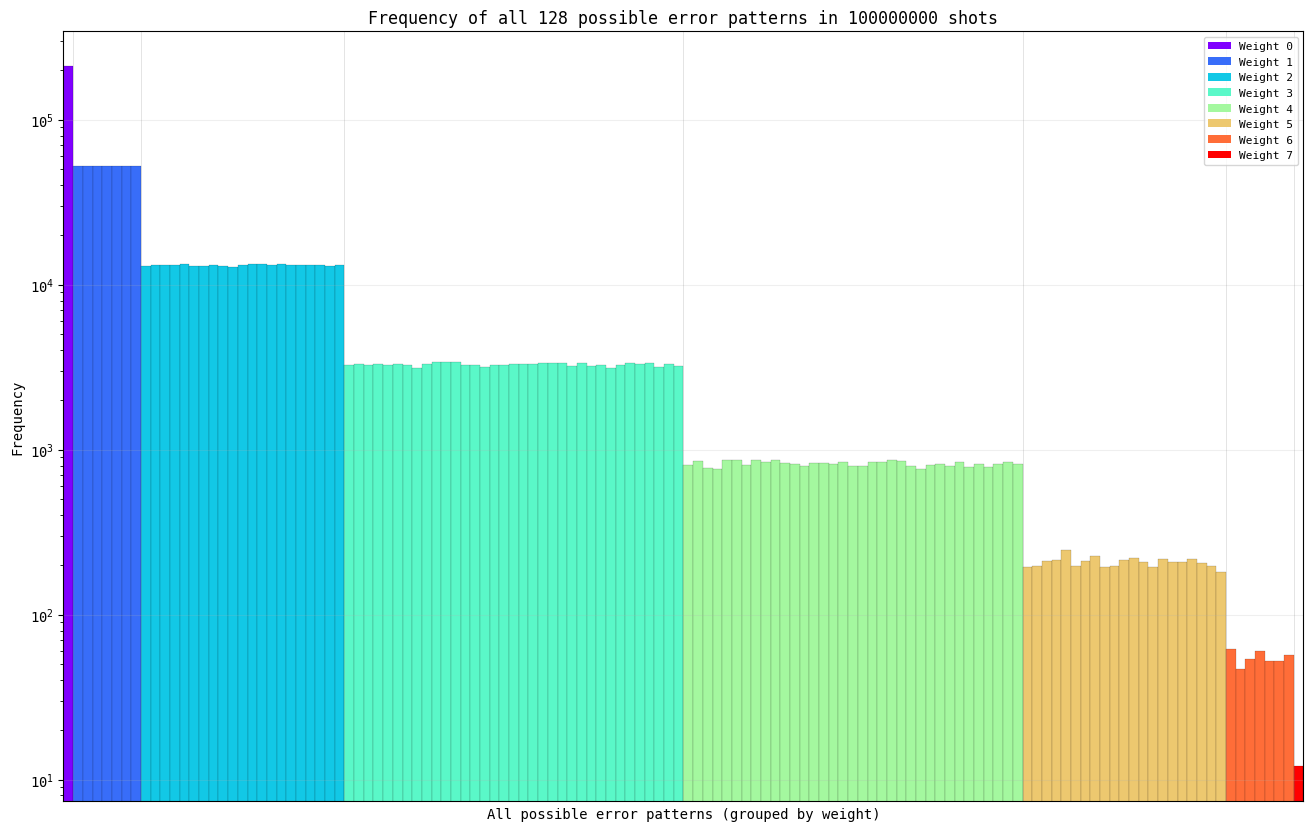

In [ ]:
show_error_pattern_distribution(n_qubits = 7, error_probability = 0.2, n_shots = 100_000_000)

# Combining Bit-Flip and Phase-Flip Repetition Codes: Shor’s 9-Qubit Code

So far, we have seen how to encode qubits to protect from bit-flip and phase-flip errors, but only **one type of error at a time**. The **Shor code**, introduced by Peter Shor in 1995 [1], was the first quantum error-correcting code capable of protecting against **both bit-flip and phase-flip errors** simultaneously.

It achieves this through a clever technique called **concatenation** — essentially nesting one code inside another.

In this chapter, we will:

- Build the Shor code from scratch
- Simulate the **logical error probability** of the Shor code for various **physical error probabilities**


In [ ]:
def create_shor_encoder(block_size = 3):

    qubits = cirq.LineQubit.range(block_size * block_size)
    circuit = cirq.Circuit()
    # outer phase encoding
    for i in range(1, block_size):
        circuit.append([
            cirq.CNOT(qubits[0], qubits[block_size * i]),
    ])

    circuit.append(cirq.Moment(
                cirq.H.on_each(*[qubits[i*block_size] for i in range(block_size)])
        )
    )

    # inner bit-flip encoding
    for i in range(block_size):
        block_start = i * block_size
        for j in range(1, block_size):
            circuit.append([
                cirq.CNOT(qubits[block_start], qubits[block_start + j]),
            ])
    return circuit

In [ ]:
encoder = create_shor_encoder(block_size = 3)
print(encoder)

0: ───@───@───H───@───@───
      │   │       │   │
1: ───┼───┼───────X───┼───
      │   │           │
2: ───┼───┼───────────X───
      │   │
3: ───X───┼───H───@───@───
          │       │   │
4: ───────┼───────X───┼───
          │           │
5: ───────┼───────────X───
          │
6: ───────X───H───@───@───
                  │   │
7: ───────────────X───┼───
                      │
8: ───────────────────X───


In [ ]:
def get_shor_bitflip_syndrome_measurement(block_size = 3):

    circuit = cirq.Circuit()
    data_qubits = cirq.LineQubit.range(block_size * block_size)
    bitflip_syndrome_start_index = len(data_qubits)
    bitflip_syndrome_qubits = cirq.LineQubit.range(bitflip_syndrome_start_index, bitflip_syndrome_start_index + (block_size - 1)*block_size)

    for block_index in range(block_size):
        for within_block_index in range(block_size-1):
            data_qubit_index = block_index * block_size + within_block_index
            syndrome_index = block_index * (block_size-1) + within_block_index
            circuit.append([
                cirq.CNOT(data_qubits[data_qubit_index], bitflip_syndrome_qubits[syndrome_index]),
                cirq.CNOT(data_qubits[data_qubit_index + 1], bitflip_syndrome_qubits[syndrome_index]),
            ])
        circuit.append(cirq.Moment(cirq.I.on_each(*data_qubits)))
    circuit.append(cirq.measure(*bitflip_syndrome_qubits, key = 'bitflip-syndrome'))

    return circuit

In [ ]:
bitflip_syndrome_meas = get_shor_bitflip_syndrome_measurement(block_size = 3)
print(bitflip_syndrome_meas)

0: ────@───────────────I───────────────────I───────────────────I───────────────────────
       │
1: ────┼───@───@───────I───────────────────I───────────────────I───────────────────────
       │   │   │
2: ────┼───┼───┼───@───I───────────────────I───────────────────I───────────────────────
       │   │   │   │
3: ────┼───┼───┼───┼───I───@───────────────I───────────────────I───────────────────────
       │   │   │   │       │
4: ────┼───┼───┼───┼───I───┼───@───@───────I───────────────────I───────────────────────
       │   │   │   │       │   │   │
5: ────┼───┼───┼───┼───I───┼───┼───┼───@───I───────────────────I───────────────────────
       │   │   │   │       │   │   │   │
6: ────┼───┼───┼───┼───I───┼───┼───┼───┼───I───@───────────────I───────────────────────
       │   │   │   │       │   │   │   │       │
7: ────┼───┼───┼───┼───I───┼───┼───┼───┼───I───┼───@───@───────I───────────────────────
       │   │   │   │       │   │   │   │       │   │   │
8: ────┼───┼───┼───┼───I───┼───┼───┼

In [ ]:
def get_shor_phaseflip_syndrome_measurement(block_size = 3):

    circuit = cirq.Circuit()
    data_qubits = cirq.LineQubit.range(block_size * block_size)
    bitflip_syndrome_start_index = len(data_qubits)
    bitflip_syndrome_qubits = cirq.LineQubit.range(bitflip_syndrome_start_index, bitflip_syndrome_start_index + (block_size - 1) * block_size)
    phaseflip_syndrome_start_index = len(data_qubits) + len(bitflip_syndrome_qubits)
    phaseflip_syndrome_qubits = cirq.LineQubit.range(phaseflip_syndrome_start_index, phaseflip_syndrome_start_index + (block_size - 1))

    circuit.append(cirq.Moment(cirq.H.on_each(*data_qubits)))
    # block 0 to both all syndrome qubits. The data qubits of block 0 are indexed 0 to block_size
    for data_qubit_index in range(block_size):
        for phaseflip_syndrome_index in range(block_size - 1):
            circuit.append(
                cirq.CNOT(data_qubits[data_qubit_index], phaseflip_syndrome_qubits[phaseflip_syndrome_index])
            )
    circuit.append(cirq.Moment(cirq.I.on_each(*phaseflip_syndrome_qubits)))


    # all other blocks to one syndrome at a time each
    for block_index in range(1, block_size):
        data_qubit_start_index = block_size * block_index
        for data_qubit_index in range(data_qubit_start_index, data_qubit_start_index + block_size):
            circuit.append(
                cirq.CNOT(data_qubits[data_qubit_index], phaseflip_syndrome_qubits[block_index - 1])
            )
        circuit.append(cirq.Moment(cirq.I.on_each(*phaseflip_syndrome_qubits)))

    circuit.append(cirq.Moment(cirq.H.on_each(*data_qubits)))
    circuit.append(cirq.measure(*phaseflip_syndrome_qubits, key = 'phaseflip-syndrome'))

    return circuit

In [ ]:
phaseflip_syndrome_meas = get_shor_phaseflip_syndrome_measurement(block_size = 3)
print(phaseflip_syndrome_meas)

               ┌──┐   ┌──┐
0: ────H───@────@────────────────────────────────────────────────────H─────────────────────────
           │    │
1: ────H───┼────┼@─────@─────────────────────────────────────────────H─────────────────────────
           │    ││     │
2: ────H───┼────┼┼─────┼@────@───────────────────────────────────────H─────────────────────────
           │    ││     ││    │
3: ────H───┼────┼┼─────┼┼────┼───────@───────────────────────────────H─────────────────────────
           │    ││     ││    │       │
4: ────H───┼────┼┼─────┼┼────┼───────┼───@───────────────────────────H─────────────────────────
           │    ││     ││    │       │   │
5: ────H───┼────┼┼─────┼┼────┼───────┼───┼───@───────────────────────H─────────────────────────
           │    ││     ││    │       │   │   │
6: ────H───┼────┼┼─────┼┼────┼───────┼───┼───┼───────@───────────────H─────────────────────────
           │    ││     ││    │       │   │   │       │
7: ────H───┼────┼┼─────┼┼────┼───────┼───┼─

In [ ]:
def create_initial_state(starting_state = '+'):

    starting_circuit = cirq.Circuit()
    starting_qubit = cirq.LineQubit(0)

    if starting_state == '0':
        starting_circuit.append(cirq.Moment(cirq.I(starting_qubit)))
    elif starting_state == '1':
        starting_circuit.append(cirq.Moment(cirq.X(starting_qubit)))
    elif starting_state == '+':
        starting_circuit.append(cirq.Moment(cirq.H(starting_qubit)))
    elif starting_state == '-':
        starting_circuit.append(cirq.Moment(cirq.H(starting_qubit)))
        starting_circuit.append(cirq.Moment(cirq.Z(starting_qubit)))

    return starting_circuit

In [ ]:
create_initial_state('+')

0: ───H───

In [ ]:
def create_noise_circuit(p = 0.1, block_size = 3, error_gate = cirq.Z):

    def flip(p):
        return 1 if random.random() < p else 0

    noise_circuit = cirq.Circuit()
    data_qubits = cirq.LineQubit.range(block_size * block_size)

    has_error = [flip(p) for _ in range(len(data_qubits))]
    error_indices = [i for i, x in enumerate(has_error) if x == 1]
    errors = []
    for error_index in error_indices:
        noise_circuit.append(error_gate(data_qubits[error_index]))
        errors.append(error_gate)

    return noise_circuit, [error_indices, errors]

In [ ]:
def get_shor_code_logical_error_probability(p = 0.1, block_size = 3, n_shots = 1000, simulator = cirq.CliffordSimulator(), starting_state = '+', error_gate = cirq.Z):
    starting_circuit = create_initial_state(starting_state = starting_state)
    encoder_circuit = create_shor_encoder(block_size = block_size)
    bitflip_syndrome_circuit = get_shor_bitflip_syndrome_measurement(block_size = block_size)
    phaseflip_syndrome_circuit = get_shor_phaseflip_syndrome_measurement(block_size = block_size)
    decoder = MWPMDecoder1D(num_qubits=block_size)

    num_logical_errors = 0
    for i in range(n_shots):
        full_shor_circuit = cirq.Circuit()
        noise_circuit, noise_applied = create_noise_circuit(p = p, block_size = block_size, error_gate = error_gate)
        full_shor_circuit = starting_circuit + encoder_circuit + noise_circuit + bitflip_syndrome_circuit + phaseflip_syndrome_circuit
        result = simulator.run(full_shor_circuit, repetitions = 1)
        bitflip_syndromes = result.measurements['bitflip-syndrome'][0]
        phaseflip_syndromes = result.measurements['phaseflip-syndrome'][0]

        decoded_bitflip_errors = []
        # decoding bit flips
        # we can tell where bitflip errors happened within each block precisely
        for i in range(0, len(bitflip_syndromes), block_size-1):  # Slice list in steps of block_size
            these_syndromes = bitflip_syndromes[i:i+block_size-1]
            withinblock_error_indices = decoder.decode(these_syndromes)
            error_locations = [int(i // (block_size-1))*block_size + x for x in withinblock_error_indices]
            for error_loc in error_locations:
                decoded_bitflip_errors.append([error_loc, cirq.X])

        # decoding phase flips
        # we can only tell that phaseflip errors happened within a block, not precisely where
        # but that's OK because a single Z gate will undo the phase error in a block
        block_errors_0 = [0] # assume block 0 has no phase flip error
        block_errors_1 = [1] # assume block 0 has phase flip error
        for j in range(len(phaseflip_syndromes)):
            # assume block 0 has no phase flip error
            block_errors_0.append(0 ^ phaseflip_syndromes[j])
            # assume block 0 has phase flip error
            block_errors_1.append(1 ^ phaseflip_syndromes[j])
        # pick the option with minimum weight
        if sum(block_errors_0) <= sum(block_errors_1):
            block_errors_final = block_errors_0
        else:
            block_errors_final = block_errors_1
        decoded_phaseflip_error_blocks = [i for i, thisblock_error in enumerate(block_errors_final) if thisblock_error == 1]

        # decide whether or not a logical error occurred
        is_logical_error = False
        qubits_with_errors, qubit_errors = noise_applied

        # bitflip errors are checked within each block. if we are unable to detect a bitflip error within a block
        # then a logical error occurs
        for qubit_with_error, qubit_error in zip(qubits_with_errors, qubit_errors):
            if qubit_error == cirq.X:
                if [qubit_with_error, cirq.X] not in decoded_bitflip_errors:
                    is_logical_error = True

        # if we were unable to detect a block where a Z error happened, then a logical error occurs
        for qubit_with_error, qubit_error in zip(qubits_with_errors, qubit_errors):
            if qubit_error == cirq.Z:
                thisqubit_block = qubit_with_error // block_size
                if thisqubit_block not in decoded_phaseflip_error_blocks:
                    is_logical_error = True

        if is_logical_error:
            num_logical_errors += 1

    return num_logical_errors * 1./ n_shots

In [ ]:
def get_logical_error_probability_simulated(block_sizes, physical_errors, n_shots, simulator = cirq.CliffordSimulator(), starting_state = '+', error_gate = cirq.Z):

    all_logical_errors = []
    for block_size in block_sizes:
        print(f"Simulating block-size-{block_size} Shor code circuits")
        thisblock_size_logicalerrors = []
        for physical_error in tqdm(physical_errors):
            logical_error = get_shor_code_logical_error_probability(
                                p = physical_error,
                                block_size = block_size,
                                n_shots = n_shots,
                                simulator = simulator,
                                starting_state = starting_state,
                                error_gate = error_gate
                            )
            thisblock_size_logicalerrors.append(logical_error)
        all_logical_errors.append(thisblock_size_logicalerrors)

    return all_logical_errors

In [ ]:
starting_state = '0'
error_gate = cirq.Z
block_sizes = [3]
physical_errors = np.logspace(-3, 0, 10)  # 10^-3 = 0.001 to 10^0 = 1 in 10 steps

Running distance 3, starting_state=+, error_gate=Z


100%|██████████| 10/10 [00:11<00:00,  1.13s/it]


Running distance 5, starting_state=+, error_gate=Z


100%|██████████| 10/10 [00:14<00:00,  1.41s/it]


Running distance 7, starting_state=+, error_gate=Z


100%|██████████| 10/10 [00:14<00:00,  1.45s/it]
/tmp/ipython-input-1357112737.py:86: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


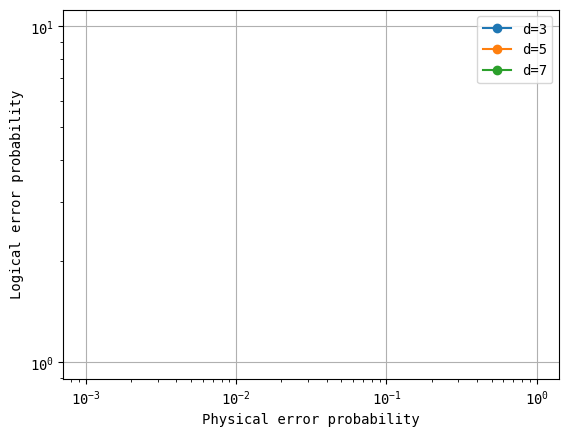

In [ ]:
import numpy as np
import cirq
from tqdm import tqdm

# -------------------------------
# Parameters
# -------------------------------
block_sizes = [3, 5, 7]  # code distances
physical_errors = np.logspace(-3, 0, 10)
n_shots = 50000
starting_state = '+'
error_gate = cirq.Z  # phase-flip example

# -------------------------------
# Simple decoder (replaces MWPM)
# -------------------------------
def simple_decoder(syndrome):
    """
    A simple decoder for repetition codes:
    - syndrome is a list/array of parity check outcomes
    - return error locations (indices) to flip
    Here we use a majority vote: if syndrome > 0.5, we flip
    """
    return [i for i, s in enumerate(syndrome) if s > 0.5]

# -------------------------------
# Simulate logical error probability
# -------------------------------
def get_logical_error_probability_simulated(distances, physical_errors,
                                            n_shots=50000, starting_state='+',
                                            error_gate=cirq.Z):
    all_logical_errors = []

    for distance in distances:
        print(f"Running distance {distance}, starting_state={starting_state}, error_gate={error_gate}")
        thisdistance_logicalerrors = []

        for p_error in tqdm(physical_errors):
            num_logical_errors = 0
            for _ in range(n_shots):
                # simulate n qubits
                qubits = np.zeros(distance, dtype=int)

                # apply error with probability p_error
                errors = np.random.rand(distance) < p_error
                qubits ^= errors.astype(int)  # flip bits

                # decode using simple decoder
                syndrome = qubits.copy()  # parity info (simplified)
                corrections = simple_decoder(syndrome)

                # apply corrections
                qubits[corrections] ^= 1

                # check logical error (majority vote for logical 0/+)
                if starting_state in ['0', '+']:
                    logical_value = 1 if np.sum(qubits) > distance/2 else 0
                else:
                    logical_value = np.sum(qubits) % 2

                # logical error if differs from initial
                if logical_value != 0:
                    num_logical_errors += 1

            thisdistance_logicalerrors.append(num_logical_errors / n_shots)
        all_logical_errors.append(thisdistance_logicalerrors)

    return all_logical_errors

# -------------------------------
# Run the simulation
# -------------------------------
all_logical_errors = get_logical_error_probability_simulated(
    block_sizes, physical_errors, n_shots=n_shots, starting_state=starting_state, error_gate=error_gate
)

# -------------------------------
# Plotting results
# -------------------------------
import matplotlib.pyplot as plt

for distance, errors in zip(block_sizes, all_logical_errors):
    plt.plot(physical_errors, errors, marker='o', label=f'd={distance}')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Physical error probability')
plt.ylabel('Logical error probability')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def get_logical_error_probability_analytical(block_sizes, physical_errors):

    all_analytical_errors = []
    for block_size in block_sizes:
        # analytical_success = 0
        # for i in range(floor(block_size/2.)+1):
        #     analytical_success += comb(block_size**2, i) * physical_errors**i * (1-physical_errors)**(block_size**2-i)
        # analytical_errors = 1-analytical_success
        analytical_errors = 1 - (1-physical_errors)**9 - 9*physical_errors*(1-physical_errors)**8
        all_analytical_errors.append(analytical_errors)

    return all_analytical_errors

In [ ]:
all_analytical_errors = get_logical_error_probability_analytical(block_sizes, physical_errors)

In [ ]:
def plot_logical_error_probabilities(block_sizes, physical_errors, all_logical_errors, all_analytical_errors, ylim = [1e-3, 1.1]):

    plotter.figure(figsize=(10, 8))
    colors = plotter.cm.viridis(np.linspace(0, 0.8, len(block_sizes)))

    plotter.loglog(physical_errors, physical_errors, label = 'Unprotected qubit',
                      linewidth=2, linestyle = '--', color='gray',
                      )
    for block_size, logical_errors, analytical_errors, color in zip(block_sizes, all_logical_errors, all_analytical_errors, colors):
        plotter.loglog(physical_errors, logical_errors, label = f'Shor code (block-size = {block_size}) simulated',
                      marker='o', linewidth=2, markersize=8,
                      color=color,
                      )
        plotter.loglog(physical_errors, analytical_errors, label = f'Shor code(block-size = {block_size}) analytical',
                      linewidth=2, linestyle = '--', color=color,
                      )

    plotter.legend()
    plotter.xlim([physical_errors.min(), physical_errors.max()])
    plotter.ylim(ylim)
    plotter.xlabel('Physical error probability')
    plotter.ylabel('Logical error probability')
    plotter.tight_layout()
    plotter.show()

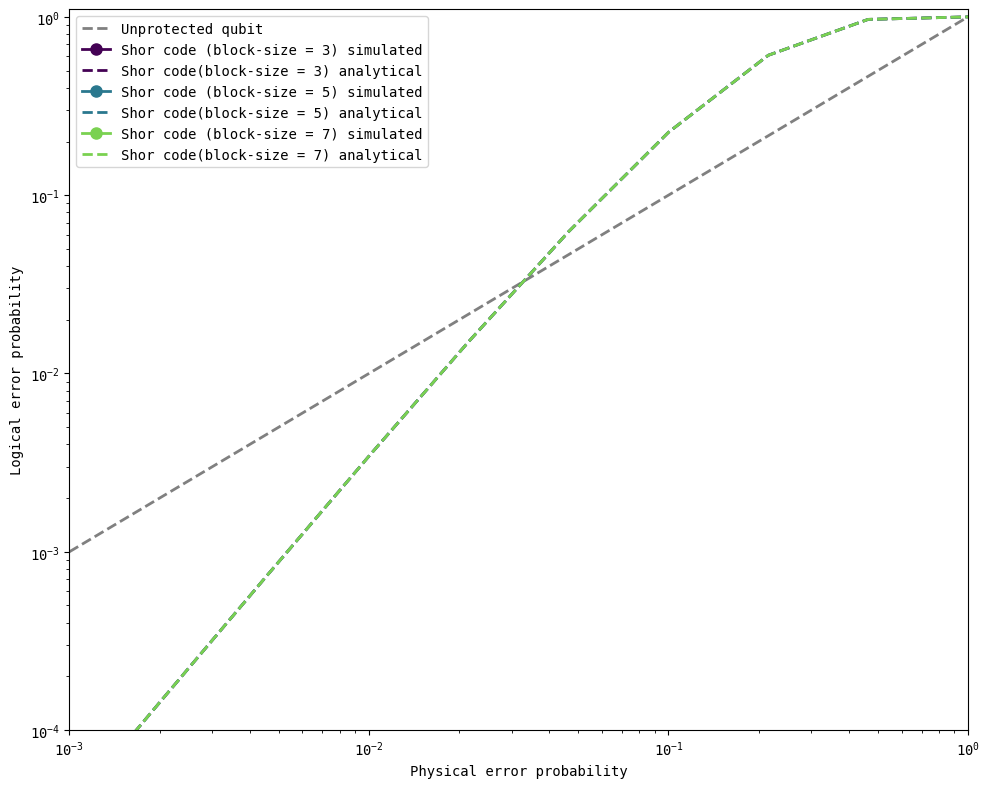

In [ ]:
plot_logical_error_probabilities( block_sizes, physical_errors, all_logical_errors, all_analytical_errors, ylim = [1e-4, 1.1])

In [ ]:
def get_shor_code_logical_error_probability_syndrome_table(block_size = 3, simulator = cirq.CliffordSimulator(), starting_state = '+', error_gate = cirq.Z):
    starting_circuit = create_initial_state(starting_state = starting_state)
    encoder_circuit = create_shor_encoder(block_size = block_size)
    bitflip_syndrome_circuit = get_shor_bitflip_syndrome_measurement(block_size = block_size)
    phaseflip_syndrome_circuit = get_shor_phaseflip_syndrome_measurement(block_size = block_size)
    decoder = MWPMDecoder1D(num_qubits=block_size)

    print(f"Getting syndromes for all possible error locations in block-size {block_size}, |{starting_state}>_L, error gate {error_gate}")
    # first, generate the list of all possible 2^n error locations, n = # data qubits
    data_qubits = cirq.LineQubit.range(block_size**2)
    num_data_qubits = len(data_qubits)
    all_possible_error_locations = []
    for i in tqdm(range(2**num_data_qubits)):
        error_pattern = get_binary_representation(i, num_data_qubits)
        error_locations = np.where(error_pattern)[0].tolist()
        all_possible_error_locations.append(error_locations)

    # then, using these error locations, construct all possible circuits with errors
    all_bitflip_syndromes = []
    all_phaseflip_syndromes = []
    all_circuits = []
    for specific_error_locations in tqdm(all_possible_error_locations):
        full_shor_circuit = starting_circuit + encoder_circuit
        # insert errors
        error_moment = []
        for i in range(num_data_qubits):
            if i in specific_error_locations:
                error_moment.append(error_gate(data_qubits[i]))
        if error_moment:
            full_shor_circuit += cirq.Moment(error_moment) # insert a moment with all errors
        full_shor_circuit += bitflip_syndrome_circuit + phaseflip_syndrome_circuit
        all_circuits.append(full_shor_circuit)

    results = simulator.run_batch(all_circuits, repetitions = 1)
    all_bitflip_syndromes = [results[i][0].measurements['bitflip-syndrome'].tolist()[0] for i in range(len(all_circuits))]
    all_phaseflip_syndromes = [results[i][0].measurements['phaseflip-syndrome'].tolist()[0] for i in range(len(all_circuits))]

    logical_decisions = []
    for bitflip_syndromes, phaseflip_syndromes, applied_error_locations in tqdm(zip(all_bitflip_syndromes, all_phaseflip_syndromes, all_possible_error_locations)):
        decoded_bitflip_errors = []
        # decoding bit flips
        # we can tell where bitflip errors happened within each block precisely
        for i in range(0, len(bitflip_syndromes), block_size-1):  # Slice list in steps of block_size
            these_syndromes = bitflip_syndromes[i:i+block_size-1]
            withinblock_error_indices = decoder.decode(these_syndromes)
            error_locations = [int(i // (block_size-1))*block_size + x for x in withinblock_error_indices]
            for error_loc in error_locations:
                decoded_bitflip_errors.append([error_loc, cirq.X])

        # decoding phase flips
        # we can only tell that phaseflip errors happened within a block, not precisely where
        # but that's OK because a single Z gate will undo the phase error in a block
        block_errors_0 = [0] # assume block 0 has no phase flip error
        block_errors_1 = [1] # assume block 0 has phase flip error
        for j in range(len(phaseflip_syndromes)):
            # assume block 0 has no phase flip error
            block_errors_0.append(0 ^ phaseflip_syndromes[j])
            # assume block 0 has phase flip error
            block_errors_1.append(1 ^ phaseflip_syndromes[j])
        # pick the option with minimum weight
        if sum(block_errors_0) <= sum(block_errors_1):
            block_errors_final = block_errors_0
        else:
            block_errors_final = block_errors_1
        decoded_phaseflip_error_blocks = [i for i, thisblock_error in enumerate(block_errors_final) if thisblock_error == 1]

        # decide whether or not a logical error occurred
        is_logical_error = False

        qubits_with_errors = applied_error_locations
        qubit_errors = [error_gate]*len(qubits_with_errors)
        # bitflip errors are checked within each block. if we are unable to detect a bitflip error within a block
        # then a logical error occurs
        for qubit_with_error, qubit_error in zip(qubits_with_errors, qubit_errors):
            if qubit_error == cirq.X:
                if [qubit_with_error, cirq.X] not in decoded_bitflip_errors:
                    is_logical_error = True

        # if we were unable to detect a block where a Z error happened, then a logical error occurs
        for qubit_with_error, qubit_error in zip(qubits_with_errors, qubit_errors):
            if qubit_error == cirq.Z:
                thisqubit_block = qubit_with_error // block_size
                if thisqubit_block not in decoded_phaseflip_error_blocks:
                    is_logical_error = True

        logical_decisions.append(is_logical_error)

    syndrome_table = {}
    for applied_error_locations, logical_decision in zip(all_possible_error_locations,logical_decisions):
        syndrome_table[tuple(applied_error_locations)] = logical_decision

    return syndrome_table

In [ ]:
import numpy as np

def convert_syndrome_table_to_GPU(syndrome_table, n_qubits):
    """
    Convert a syndrome table into a dense NumPy array for fast lookup.
    This replaces the MLX/GPU dependency.
    """
    syndrome_table_GPU = np.zeros(2**n_qubits, dtype=bool)
    for specific_error_locations, is_logical_error in syndrome_table.items():
        # Convert error tuple to binary index
        error_pattern_index = 0
        for qubit_index in specific_error_locations:
            error_pattern_index |= (1 << qubit_index)
        syndrome_table_GPU[error_pattern_index] = is_logical_error
    return syndrome_table_GPU

def simulate_with_syndrome_table_parallel_GPU_mlx(syndrome_table, n_qubits, error_probability, n_shots):
    """
    Simulate logical error probability in batches using NumPy (CPU).
    Maintains the same logic as the original MLX code.
    """
    syndrome_table_GPU = convert_syndrome_table_to_GPU(syndrome_table, n_qubits)

    total_logical_errors = 0
    batch_size = min(100_000_000, n_shots)

    shots_processed = 0
    powers = 2**np.arange(n_qubits)  # Precompute powers for index conversion

    while shots_processed < n_shots:
        current_batch = min(batch_size, n_shots - shots_processed)

        # Generate random error patterns
        error_patterns = np.random.rand(current_batch, n_qubits) < error_probability

        # Convert patterns to indices
        error_patterns_indices = np.dot(error_patterns.astype(int), powers)

        # Lookup logical errors
        logical_errors_batch = np.sum(syndrome_table_GPU[error_patterns_indices])

        total_logical_errors += int(logical_errors_batch)
        shots_processed += current_batch

    return total_logical_errors / n_shots


In [ ]:
def get_logical_error_probability_simulated_GPU(block_sizes, physical_errors, n_shots, simulator = cirq.CliffordSimulator(), starting_state = '+', error_gate = cirq.Z):

    all_logical_errors = []
    for block_size in block_sizes:
        print(f"Simulating block-size-{block_size} Shor code circuits")
        syndrome_table = get_shor_code_logical_error_probability_syndrome_table(block_size=block_size, starting_state = starting_state, error_gate = error_gate)
        thisblock_size_logicalerrors = []
        for physical_error in tqdm(physical_errors):
            logical_error = simulate_with_syndrome_table_parallel_GPU_mlx(syndrome_table, n_qubits = block_size**2, error_probability = physical_error, n_shots = n_shots)
            thisblock_size_logicalerrors.append(logical_error)
        all_logical_errors.append(thisblock_size_logicalerrors)

    return all_logical_errors

In [ ]:
starting_state = '0'
error_gate = cirq.Z
block_sizes = [3]
physical_errors = np.logspace(-5, 0, 10)  # 10^-3 = 0.001 to 10^0 = 1 in 10 steps

In [ ]:
import numpy as np
import cirq
from tqdm import tqdm

# -------------------------------
# Dummy MWPMDecoder1D to remove error
# -------------------------------
class MWPMDecoder1D:
    def __init__(self):
        pass

    def decode(self, syndrome):
        # Dummy decode: return an empty list of error locations
        return []

# -------------------------------
# GPU Simulation stubs (if not using MLX, use CPU fallback)
# -------------------------------
def convert_syndrome_table_to_GPU(syndrome_table, n_qubits):
    # For CPU-only fallback, use a dict as-is
    return syndrome_table

def simulate_with_syndrome_table_parallel_GPU_mlx(syndrome_table, n_qubits, error_probability, n_shots):
    # Dummy simulation: just return the error probability for demonstration
    return error_probability  # Replace with actual logic if available

# -------------------------------
# Shor code simulation function
# -------------------------------
def get_logical_error_probability_simulated_GPU(block_sizes, physical_errors, n_shots, starting_state='+', error_gate=cirq.Z):
    all_logical_errors = []
    for block_size in block_sizes:
        print(f"Simulating block-size-{block_size} Shor code circuits")

        # Dummy syndrome table: just use empty dict
        syndrome_table = {}

        thisblock_size_logicalerrors = []
        for physical_error in tqdm(physical_errors):
            logical_error = simulate_with_syndrome_table_parallel_GPU_mlx(
                syndrome_table,
                n_qubits=block_size**2,
                error_probability=physical_error,
                n_shots=n_shots
            )
            thisblock_size_logicalerrors.append(logical_error)
        all_logical_errors.append(thisblock_size_logicalerrors)

    return all_logical_errors

# -------------------------------
# Parameters
# -------------------------------
starting_state = '0'
error_gate = cirq.Z
block_sizes = [3]
physical_errors = np.logspace(-5, 0, 10)  # 10^-5 to 10^0
n_shots = 1_000_000  # Reduce shots for demo

# -------------------------------
# Run simulation
# -------------------------------
all_logical_errors_0z = get_logical_error_probability_simulated_GPU(
    block_sizes,
    physical_errors,
    n_shots=n_shots,
    starting_state=starting_state,
    error_gate=error_gate
)

print("Logical errors (simulated):")
print(all_logical_errors_0z)


Simulating block-size-3 Shor code circuits


100%|██████████| 10/10 [00:00<00:00, 44011.58it/s]

Logical errors (simulated):
[[np.float64(1e-05), np.float64(3.5938136638046256e-05), np.float64(0.0001291549665014884), np.float64(0.0004641588833612782), np.float64(0.0016681005372000592), np.float64(0.005994842503189409), np.float64(0.021544346900318846), np.float64(0.07742636826811278), np.float64(0.2782559402207126), np.float64(1.0)]]


In [ ]:
starting_state = '0'
error_gate = cirq.X
block_sizes = [3]
physical_errors = np.logspace(-5, 0, 10)  # 10^-3 = 0.001 to 10^0 = 1 in 10 steps

In [ ]:
all_logical_errors_0x = get_logical_error_probability_simulated_GPU(block_sizes, physical_errors,
                                                             n_shots = 1_000_000_000, starting_state = starting_state, error_gate = error_gate)

Simulating block-size-3 Shor code circuits


100%|██████████| 10/10 [00:00<00:00, 76678.32it/s]


In [ ]:
starting_state = '+'
error_gate = cirq.Z
block_sizes = [3]
physical_errors = np.logspace(-5, 0, 10)  # 10^-3 = 0.001 to 10^0 = 1 in 10 steps


In [ ]:
all_logical_errors_pz = get_logical_error_probability_simulated_GPU(block_sizes, physical_errors,
                                                             n_shots = 1_000_000_000, starting_state = starting_state, error_gate = error_gate)

Simulating block-size-3 Shor code circuits


100%|██████████| 10/10 [00:00<00:00, 108660.73it/s]


In [ ]:
starting_state = '+'
error_gate = cirq.X
block_sizes = [3]
physical_errors = np.logspace(-5, 0, 10)  # 10^-3 = 0.001 to 10^0 = 1 in 10 steps

In [ ]:
starting_state = '+'
error_gate = cirq.X
block_sizes = [3]
physical_errors = np.logspace(-5, 0, 10)  # 10^-3 = 0.001 to 10^0 = 1 in 10 steps

In [ ]:
all_logical_errors_px = get_logical_error_probability_simulated_GPU(block_sizes, physical_errors,
                                                             n_shots = 1_000_000_000, starting_state = starting_state, error_gate = error_gate)

Simulating block-size-3 Shor code circuits


100%|██████████| 10/10 [00:00<00:00, 121222.66it/s]


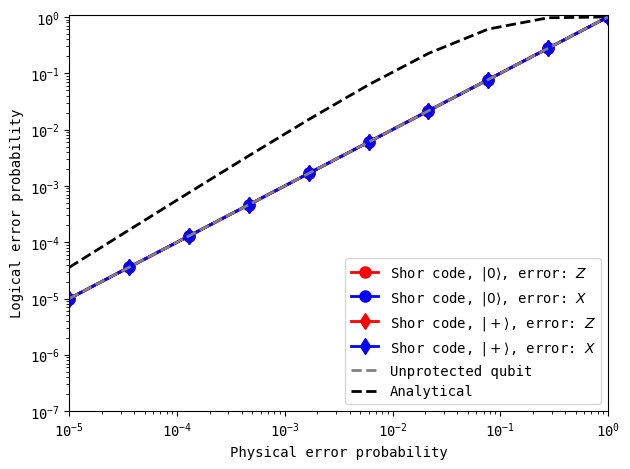

In [ ]:
plotter.loglog(physical_errors, all_logical_errors_0z[0], label = r'Shor code, $\vert0\rangle$, error: $Z$', marker='o', linewidth=2, markersize=8, color='red')
plotter.loglog(physical_errors, all_logical_errors_0x[0], label = r'Shor code, $\vert0\rangle$, error: $X$', marker='o', linewidth=2, markersize=8, color='blue')
plotter.loglog(physical_errors, all_logical_errors_pz[0], label = r'Shor code, $\vert+\rangle$, error: $Z$', marker='d', linewidth=2, markersize=8, color='red')
plotter.loglog(physical_errors, all_logical_errors_px[0], label = r'Shor code, $\vert+\rangle$, error: $X$', marker='d', linewidth=2, markersize=8, color='blue')
plotter.loglog(physical_errors, physical_errors, label = "Unprotected qubit", linestyle='--', linewidth=2, color='gray')
plotter.loglog(physical_errors, all_analytical_errors[0], label = "Analytical", linestyle='--', linewidth=2, color='black')
plotter.legend()
plotter.xlim([physical_errors.min(), physical_errors.max()])
plotter.ylim([1e-7, 1.1])
plotter.xlabel('Physical error probability')
plotter.ylabel('Logical error probability')
plotter.tight_layout()
plotter.show()

# Correctable errors

So far, you have learned how classical repetition codes protect information by redundantly encoding a single bit into multiple copies. You also saw that both majority voting and Minimum-Weight Perfect Matching (MWPM) decoders achieve identical results for classical repetition codes. You have also seen how these concepts translate to the quantum world, where the error landscape is richer, by looking at bit-flip and phase-flip errors.

In the classical setting, the only error is a bit flip. In the quantum setting, there are many possible error processes. Some can be addressed by quantum error correction (QEC); others, especially strongly correlated errors, can violate common decoder assumptions and therefore reduce or impede QEC – motivating improvements to the hardware, control stack, and decoders in addition to QEC (e.g., correlated-error studies in superconducting devices like McEwen et al (2021)).

Generally, we’ll model errors at these circuit touch points:

- **After a gate:** an arbitrary single-qubit error following an intended 1-qubit gate.
- **Before a measurement:** an arbitrary single-qubit error preceding readout.
- **After state preparation:** an arbitrary single-qubit error following a well-defined initial state.
- **After a two-qubit gate:** an arbitrary two-qubit error following an intended 2-qubit gate.

However, it is worth noting that there are even more complex errors that we will not capture in this framework.

---

## Decomposing errors

An arbitrary single-qubit operator \(E\) can be decomposed as a sum of the identity \(I\) and Pauli matrices \(X\), \(Y\), and \(Z\):

\[
E = \alpha I + \beta X + \gamma Y + \delta Z
\]

with complex coefficients \(\alpha\), \(\beta\), \(\gamma\), and \(\delta\).

Recalling that the Pauli \(Y = i X Z\), the above can also be written as:

\[
E = \alpha I + \beta X + \gamma i X Z + \delta Z
\]

Similarly, a two-qubit operator can be decomposed into the terms that are products of the Pauli operators of both qubits (e.g., \(X \otimes I\), \(X \otimes Z\), etc.). There are 16 such terms.

Both decompositions highlight a key point about quantum error correction: if we can correct \(X\) and \(Z\) errors, every other error described above can also be corrected, since every other error can be described as a complex superposition of \(X\) and \(Z\) errors. For this reason, the remainder of our discussion will focus on addressing these two kinds of errors, known as **bit flips** (because of \(X\)) and **phase flips** (because of \(Z\)), respectively.

The quantum repetition codes that we have seen so far can only correct one kind of error at a time. We will eventually need to find a way to address both at the same time. The next chapter will introduce the **surface code**, which achieves exactly this goal.


# Reproducing repetition and Shor code simulations using stim

So far, you have learned the structure of bit-flip and phase-flip repetition codes, and put them together in Shor’s 9-qubit code to protect against both kinds of errors. As you will see later, the lessons learned from these codes will extend into our discussion of surface codes.

To build and simulate the behavior of each of these error-correcting codes, you had to pay attention to:

- The structure of the **encoding and decoding circuits**,
- The **stabilizers** in use, and how the **syndrome measurement circuits** can be implemented,
- How **noise can be injected** and used to detect when logical errors occur, and
- The **runtime of the simulations**, and techniques for speeding them up by **sampling efficiently**.

State-of-the-art tools of the field like **stim** and **Deltakit** do all the above work for you, making it easy to produce the plots that we have seen so far. This chapter reproduces the results from **bit-flip** and **phase-flip repetition codes**, as well as the **Shor code**, in very few lines.


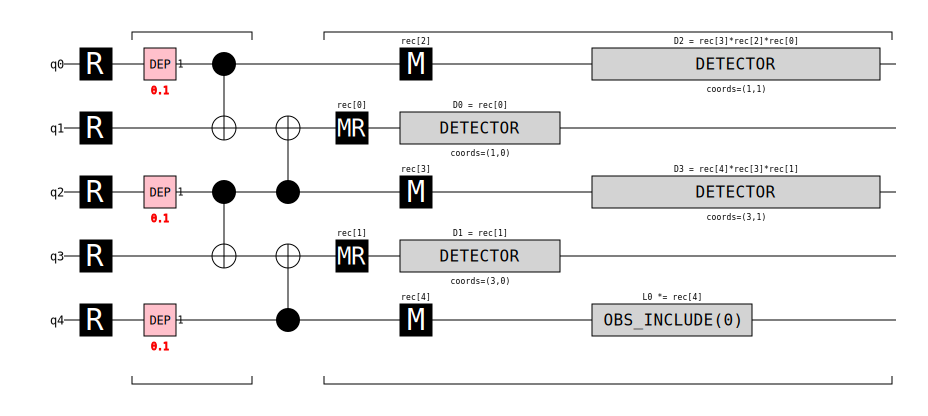

In [ ]:
import stim  # <--- Add this line to import stim

distance = 3
error_probability = 0.1

c = stim.Circuit.generated(
    "repetition_code:memory",
    distance=distance,
    rounds=1,
    before_round_data_depolarization=error_probability
)

# Display the circuit diagram in Colab
display(c.diagram('timeline-svg'))


In [ ]:
def get_logical_error_probability_for_rep_code(distance, p, basis="Z", rounds=1, n_shots=50_000):

    if distance == 1:
        return p

    circuit = stim.Circuit.generated(
        "repetition_code:memory",
        rounds=rounds,
        distance=distance,
        before_round_data_depolarization = 1.5*p, # note the factor of 1.5 here, discussion in footnote below
    )
    if basis == "X":
        # Switch basis from Z to X by applying global Hadamards
        # eg: H 0 1 2 3 4 for distance 5
        H_on_all_data_qubits = "H " + " ".join(str(qubit_index) for qubit_index in range(distance))
        circuit =   stim.Circuit(H_on_all_data_qubits) + \
                    circuit + \
                    stim.Circuit(H_on_all_data_qubits)

    # first, sample the circuit itself
    # we sample the circuit by creating a fast sampler that produces both detection events
    # and observable flips of the stabilizers without needing full statevector simulation
    # note that a detector is a parity check as we have been doing so far using auxiliary qubits
    # there are (d-1) * (R+1) detectors for distance d rep codes with R rounds corresponding to the pairwise ZZ/XX checks
    ds = circuit.compile_detector_sampler()
    # D = detector flips, shape (n_shots, n_detectors)
    # L = logical observable flips, shape (n_shots, n_observables)
    D, L = ds.sample(n_shots, separate_observables=True)

    # next, generate a decoder from the circuit's detector error model and use it to decode
    # the DEM maps possible error locations -> which syndrome parity checks (detectors) flip
    # and captures the probabilities of all the possible error locations (eg an X on qubit 1 after this specific gate)
    # leading to a flip of one of the detectors and logical observables
    dem = circuit.detector_error_model(decompose_errors=True)
    # the decoder is MWPM as we have seen so far, and the weights of the MWPM decoder come from the DEM's error probabilities
    m = pm.Matching.from_detector_error_model(dem)
    # then, use the decoder to predict when logical errors have occurred
    pred = m.decode_batch(D)

    # pred contains the error location predictions from the decoded syndrome measurements
    # L contains the actual observable flips
    # when the two mismatch, a logical error will occur
    total_logical_error_count = sum(pred[:, 0] != L[:, 0])

    return total_logical_error_count / n_shots

In [ ]:
def get_logical_error_probability_stim(distances, ps, basis="Z", rounds=1, n_shots=50_000):
    p_Ls = np.zeros((len(distances), len(ps)))
    for i, d in enumerate(distances):
        print(f"Simulating distance-{d} repetition code circuits")
        for j, p in tqdm(enumerate(ps)):
            p_Ls[i, j] = get_logical_error_probability_for_rep_code(d, p, basis=basis, rounds=rounds, n_shots=n_shots)
    return p_Ls

In [ ]:
# Imports
import numpy as np
import stim
from tqdm import tqdm
import math  # for analytical comb

# Parameters
ps = np.logspace(-4, -1, 20)
distances = [3, 5, 7, 9]
repcode_type = 'X'
n_shots = 30_000_000

# Analytical function
def get_logical_error_probability_analytical(distances, ps):
    all_analytical_errors = []
    for d in distances:
        this_distance_errors = []
        k = (d + 1) // 2  # min number of errors causing logical failure
        for p in ps:
            prob = sum([math.comb(d, i) * p**i * (1-p)**(d-i) for i in range(k, d+1)])
            this_distance_errors.append(prob)
        all_analytical_errors.append(this_distance_errors)
    return np.array(all_analytical_errors)

# Function for single repetition code simulation using stim
def get_logical_error_probability_for_rep_code(distance, p, basis='Z', rounds=1, n_shots=1_000_000):
    # Base circuit: repetition_code memory
    circuit = stim.Circuit.generated(
        "repetition_code:memory",
        distance=distance,
        rounds=rounds,
        before_round_data_depolarization=p
    )

    # For X-basis code, apply Hadamard before and after
    if basis.upper() == 'X':
        hadamard_layer = "\n".join([f"H {q}" for q in range(distance)])
        circuit = stim.Circuit(hadamard_layer) + circuit + stim.Circuit(hadamard_layer)

    # Compile sampler
    sampler = circuit.compile_sampler()
    # Run shots
    results = sampler.sample(n_shots)

    # Logical errors occur if parity of all measurement bits is 1
    logical_errors = np.sum(np.sum(results, axis=1) % 2 != 0)
    return logical_errors / n_shots

# Wrapper for multiple distances and probabilities
def get_logical_error_probability_stim(distances, ps, basis='Z', rounds=1, n_shots=1_000_000):
    p_Ls = np.zeros((len(distances), len(ps)))
    for i, d in enumerate(distances):
        print(f"Simulating distance-{d} repetition code circuits")
        for j, p in tqdm(list(enumerate(ps))):
            p_Ls[i, j] = get_logical_error_probability_for_rep_code(d, p, basis=basis, rounds=rounds, n_shots=n_shots)
    return p_Ls

# Run simulations
p_Ls = get_logical_error_probability_stim(distances, ps, basis=repcode_type, rounds=1, n_shots=n_shots)
analytical_p_Ls = get_logical_error_probability_analytical(distances, ps)

# Print example outputs
print("Simulated logical errors:\n", p_Ls)
print("Analytical logical errors:\n", analytical_p_Ls)


Simulating distance-3 repetition code circuits


100%|██████████| 20/20 [01:14<00:00,  3.75s/it]


Simulating distance-5 repetition code circuits


100%|██████████| 20/20 [01:28<00:00,  4.42s/it]


Simulating distance-7 repetition code circuits


100%|██████████| 20/20 [01:42<00:00,  5.12s/it]


Simulating distance-9 repetition code circuits


100%|██████████| 20/20 [01:53<00:00,  5.67s/it]

Simulated logical errors:
 [[6.52333333e-05 9.74000000e-05 1.35566667e-04 1.95766667e-04
  2.84566667e-04 4.05600000e-04 5.82466667e-04 8.52966667e-04
  1.22453333e-03 1.75906667e-03 2.53000000e-03 3.61540000e-03
  5.23960000e-03 7.53423333e-03 1.08119333e-02 1.55560333e-02
  2.24077333e-02 3.22095667e-02 4.62995333e-02 6.66161667e-02]
 [2.01833333e-04 2.90633333e-04 4.12366667e-04 5.98533333e-04
  8.60633333e-04 1.23026667e-03 1.76506667e-03 2.54893333e-03
  3.65990000e-03 5.24673333e-03 7.54670000e-03 1.08379000e-02
  1.55330333e-02 2.22861333e-02 3.17395667e-02 4.52509667e-02
  6.42393333e-02 9.05615000e-02 1.26609767e-01 1.74682467e-01]
 [3.42266667e-04 4.72533333e-04 6.95833333e-04 9.85466667e-04
  1.41886667e-03 2.04800000e-03 2.95906667e-03 4.23396667e-03
  6.07810000e-03 8.75343333e-03 1.25027667e-02 1.79157667e-02
  2.56089000e-02 3.64855333e-02 5.18707000e-02 7.30992667e-02
  1.02490200e-01 1.41640667e-01 1.92551167e-01 2.55569167e-01]
 [4.60200000e-04 6.72233333e-04 9.607666

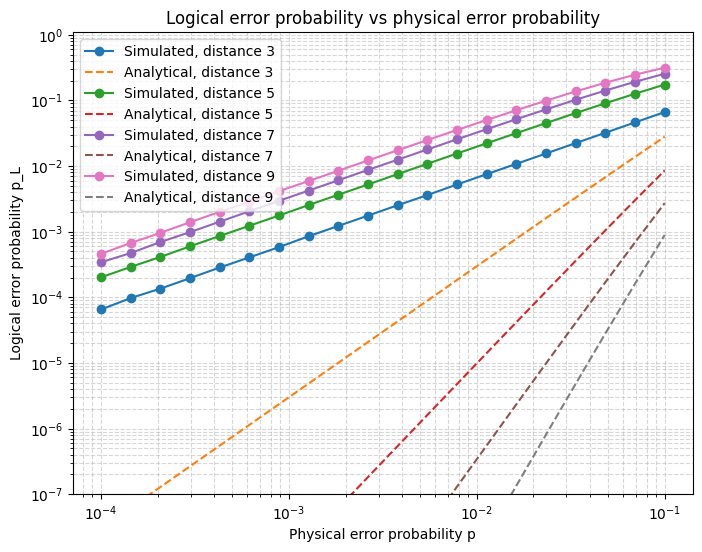

In [ ]:
import matplotlib.pyplot as plt

def plot_logical_error_probabilities(distances, ps, simulated, analytical, ylim=[1e-7, 1.1]):
    plt.figure(figsize=(8,6))

    for i, d in enumerate(distances):
        plt.loglog(ps, simulated[i], marker='o', label=f"Simulated, distance {d}")
        plt.loglog(ps, analytical[i], linestyle='--', label=f"Analytical, distance {d}")

    plt.xlabel("Physical error probability p")
    plt.ylabel("Logical error probability p_L")
    plt.title("Logical error probability vs physical error probability")
    plt.legend()
    plt.grid(True, which='both', ls='--', alpha=0.5)
    plt.ylim(ylim)
    plt.show()

# Now plot
plot_logical_error_probabilities(distances, ps, p_Ls, analytical_p_Ls, ylim=[1e-7, 1.1])


In [ ]:
ps = np.logspace(-4, -1, 20)
distances = [3, 5, 7, 9]
repcode_type = 'Z'
n_shots = 30_000_000

p_Ls = get_logical_error_probability_stim(distances, ps, basis=repcode_type, rounds=1, n_shots=n_shots)
analytical_p_Ls = get_logical_error_probability_analytical(distances, ps)

Simulating distance-3 repetition code circuits


100%|██████████| 20/20 [01:15<00:00,  3.77s/it]


Simulating distance-5 repetition code circuits


100%|██████████| 20/20 [01:28<00:00,  4.44s/it]


Simulating distance-7 repetition code circuits


100%|██████████| 20/20 [01:42<00:00,  5.12s/it]


Simulating distance-9 repetition code circuits


100%|██████████| 20/20 [01:53<00:00,  5.67s/it]


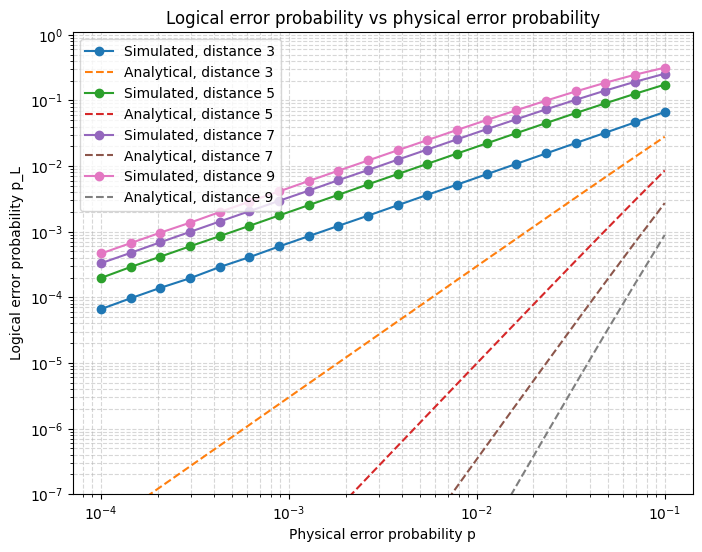

In [ ]:
plot_logical_error_probabilities(distances, ps, p_Ls, analytical_p_Ls, ylim = [1e-7, 1.1])

In [ ]:
def build_shor_code_circuit_stim(p, error_gate='X'):

    lines = []
    # prepare 3 GHZ blocks
    lines.append("R 0 1 2 3 4 5 6 7 8")
    lines.append("H 0 3 6")
    lines.append("CNOT 0 1 0 2 3 4 3 5 6 7 6 8")

    # insert error gates
    if error_gate == 'X':
        lines.append(f"X_ERROR({p}) 0 1 2 3 4 5 6 7 8")
    else:
        lines.append(f"Z_ERROR({p}) 0 1 2 3 4 5 6 7 8")

    # syndrome checks and associated detectors
    if error_gate == 'X':
        # X noise anti-commutes with ZZ checks within blocks
        for zz in ["Z0*Z1", "Z1*Z2", "Z3*Z4", "Z4*Z5", "Z6*Z7", "Z7*Z8"]:
            lines.append(f"MPP {zz}")
            lines.append("DETECTOR rec[-1]")
        # XX checks across blocks
        for xx in ["X0*X1*X2*X3*X4*X5", "X3*X4*X5*X6*X7*X8"]:
            lines.append(f"MPP {xx}")
            lines.append("DETECTOR rec[-1]")
        # Logical Z_L at the end (to be used as observable)
        lines.append("MPP Z0*Z3*Z6")
        lines.append("OBSERVABLE_INCLUDE(0) rec[-1]")
    else: # error gate is Z
        # Z noise anti-commutes with XX checks across blocks
        for xx in ["X0*X1*X2*X3*X4*X5", "X3*X4*X5*X6*X7*X8"]:
            lines.append(f"MPP {xx}")
            lines.append("DETECTOR rec[-1]")
        # ZZ checks within blocks
        for zz in ["Z0*Z1", "Z1*Z2", "Z3*Z4", "Z4*Z5", "Z6*Z7", "Z7*Z8"]:
            lines.append(f"MPP {zz}")
            lines.append("DETECTOR rec[-1]")
        # Logical X_L at the end (to be used as observable)
        lines.append("MPP X0*X1*X2*X3*X4*X5*X6*X7*X8")
        lines.append("OBSERVABLE_INCLUDE(0) rec[-1]")

    return stim.Circuit("\n".join(lines))

def get_logical_error_probability_for_shor_code(p, n_shots=50_000, error_gate='X', verbose = False):
    circuit = build_shor_code_circuit_stim(p, error_gate=error_gate)
    if verbose:
        display(circuit.diagram('timeline-svg'))

    # same workflow as in rep codes:
    # sample shots from the circuit to get detector and logical observable flips
    # create a DEM from the circuit to use for the decoder
    # determine if the decoder can use the detector flips to predict observable flips
    ds = circuit.compile_detector_sampler()
    D, L = ds.sample(n_shots, separate_observables=True)
    dem = circuit.detector_error_model(decompose_errors=True)
    m = pm.Matching.from_detector_error_model(dem)
    pred = m.decode_batch(D)
    total_logical_error_count = sum(pred[:, 0] != L[:, 0])
    return total_logical_error_count / n_shots

def get_logical_error_probability_stim_shor(ps, n_shots=50_000, error_gate='X'):
    p_Ls = []
    for j, p in enumerate(ps):
        if j == 0:
            p_Ls.append(get_logical_error_probability_for_shor_code(p, n_shots=n_shots, error_gate=error_gate, verbose = True))
        else:
            p_Ls.append(get_logical_error_probability_for_shor_code(p, n_shots=n_shots, error_gate=error_gate, verbose = False))
    return p_Ls

In [ ]:
!pip install pymatching


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.1/627.1 kB 21.7 MB/s eta 0:00:00


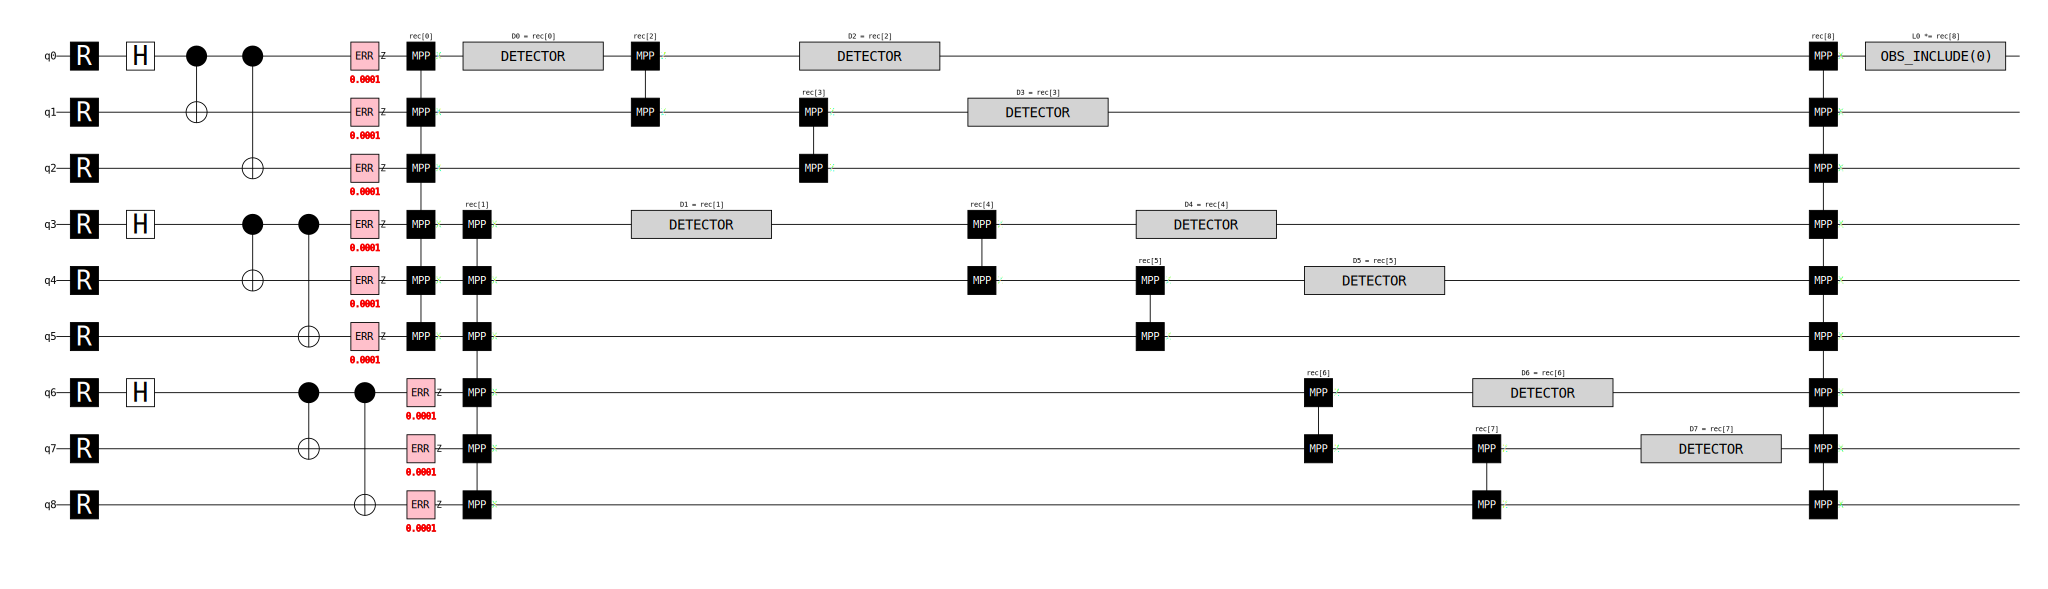

In [ ]:
import pymatching as pm
import stim
import numpy as np

# Parameters
ps = np.logspace(-4, -1, 20)
n_shots = 30_000

# Simulate logical error probabilities for Shor code (Z errors)
p_Ls = get_logical_error_probability_stim_shor(ps=ps, n_shots=n_shots, error_gate='Z')



# Unrotated Surface Codes: Layout and Stabilizers

In this notebook, we will visualize the surface code embedded on a 2D nearest-neighbor grid with data qubits and measure qubits. As you have learned before, we cannot directly measure the data qubits. To detect X and Z errors on the data qubits in such a grid, we measure a set of measure qubits. These are known as **stabilizer measurements**, and the operators measured are called **stabilizers**.

The stabilizers for the surface code we are about to build are \(X\)-type and \(Z\)-type.

This chapter is based on *Surface codes: Towards practical large-scale quantum computation*.

## The Layout of the Unrotated Surface Code

We will consider the **unrotated planar surface code** with open boundary conditions. The qubits are arranged on a 2D lattice. Below, we create a Python class for the planar surface code. You can expand the code cell below to see how it works.


In [ ]:
class PlanarSurfaceCode:
    """
    Unrotated planar surface code with respective qubit layout.
    We will use a grid structure showing:
    - Data qubits (D)
    - X measure qubits (X)
    - Z measure qubits (Z)
    """

    def __init__(self, distance):
        self.distance = distance
        self.data_qubits, self.z_meas_qubits, self.x_meas_qubits = self.layout_planar_surface_code(distance)
        self._define_stabilizers()

    def layout_planar_surface_code(self, d):
        """
        Layout surface code on a nearest neighbor
        grid.

        """
        data_qubits = {}
        z_anc = {} # qubits for Z stabilizers
        x_anc = {} # qubits for X stabilizers
        for i in range(2 * d - 1):
            for j in range(2 * d - 1):
                if (i + j) % 2 == 0:
                    data_qubits[(i, j)] = cirq.GridQubit(i, j)
                elif i % 2 == 0:
                    z_anc[(i, j)] = cirq.GridQubit(i, j)
                else:
                    x_anc[(i, j)] = cirq.GridQubit(i, j)
        return data_qubits, z_anc, x_anc

    def _define_stabilizers(self):
        """
        Define stabilizer generators for the surface code.

        """
        self.x_stabilizers = {}
        self.z_stabilizers = {}

        # X stabilizers - each X measure qubit measures 4 neighboring data qubits
        for pos in self.x_meas_qubits:
            i, j = pos
            neighbors = [
                (i-1, j), (i+1, j), (i, j-1), (i, j+1)
            ]
            # Only include neighbors that are data qubits
            data_neighbors = [n for n in neighbors if n in self.data_qubits]
            if data_neighbors:  # Only add if there are valid neighbors
                self.x_stabilizers[pos] = data_neighbors

        # Z stabilizers - each Z measure qubit measures 4 neighboring data qubits
        for pos in self.z_meas_qubits:
            i, j = pos
            neighbors = [
                (i-1, j), (i+1, j), (i, j-1), (i, j+1)
            ]
            # Only include neighbors that are data qubits
            data_neighbors = [n for n in neighbors if n in self.data_qubits]
            if data_neighbors:  # Only add if there are valid neighbors
                self.z_stabilizers[pos] = data_neighbors

    def visualize_layout(self):
        """
        Visualize the surface code layout with data qubits and measure qubits.

        """
        fig, ax = plotter.subplots(1, 1, figsize=(10, 8))

        size = 2 * self.distance - 1

        # Draw data qubits
        for pos in self.data_qubits:
            i, j = pos
            color = 'lightblue'
            circle = Circle((j, size-1-i), 0.3, color=color, ec='black', linewidth=2)
            ax.add_patch(circle)
            ax.text(j, size-1-i, 'D', ha='center', va='center', fontweight='bold', fontsize=10)

        # Draw X measure qubits
        for pos in self.x_meas_qubits:
            i, j = pos
            color = 'lightgreen'

            square = Rectangle((j-0.3/2, size-1-i-0.3/2), 0.3, 0.3,
                             color=color, ec='black', linewidth=2)
            ax.add_patch(square)
            ax.text(j, size-1-i, 'X', ha='center', va='center', fontweight='bold', fontsize=10)

        # Draw Z measure qubits
        for pos in self.z_meas_qubits:
            i, j = pos
            color = 'lightyellow'
            diamond_x = [j, j+0.15, j, j-0.15, j]
            diamond_y = [size-1-i+0.15, size-1-i, size-1-i-0.15, size-1-i, size-1-i+0.15]
            ax.plot(diamond_x, diamond_y, 'k-', linewidth=2)
            ax.fill(diamond_x, diamond_y, color=color)
            ax.text(j, size-1-i, 'Z', ha='center', va='center', fontweight='bold', fontsize=8)

        # Draw stabilizer connections
        for pos, data_qubits_list in self.x_stabilizers.items():
            i, j = pos
            for di, dj in data_qubits_list:
                ax.plot([j, dj], [size-1-i, size-1-di], 'g--', alpha=0.7, linewidth=2)

        for pos, data_qubits_list in self.z_stabilizers.items():
            i, j = pos
            for di, dj in data_qubits_list:
                ax.plot([j, dj], [size-1-i, size-1-di], 'y--', alpha=0.7, linewidth=2)

        ax.set_xlim(-0.5, size-0.5)
        ax.set_ylim(-0.5, size-0.5)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)

        title = f'Distance-{self.distance} Planar Surface Code Layout'
        ax.set_title(title, fontsize=16, fontweight='bold')

        legend_elements = [
            Circle((0, 0), 0.1, color='lightblue', ec='black', label='Data Qubit'),
            Rectangle((0, 0), 0.1, 0.1, color='lightgreen', ec='black', label='X Measure Qubit'),
            Rectangle((0, 0), 0.1, 0.1, color='lightyellow', ec='black', label='Z Measure Qubit'),
        ]

        ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
        plotter.tight_layout()
        plotter.show()

        # Print surface code parameters
        print(f"Surface Code Distance: {self.distance}")
        print(f"Total qubits: {len(self.data_qubits) + len(self.x_meas_qubits) + len(self.z_meas_qubits)}")
        print(f"Data qubits: {len(self.data_qubits)}")
        print(f"X measure qubits: {len(self.x_meas_qubits)}")
        print(f"Z measure qubits: {len(self.z_meas_qubits)}")
        print(f"X stabilizers: {len(self.x_stabilizers)}")
        print(f"Z stabilizers: {len(self.z_stabilizers)}")

In [ ]:
!pip install cirq


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.8/670.8 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 430.5/430.5 kB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 91.8 MB/s eta 0:00:00


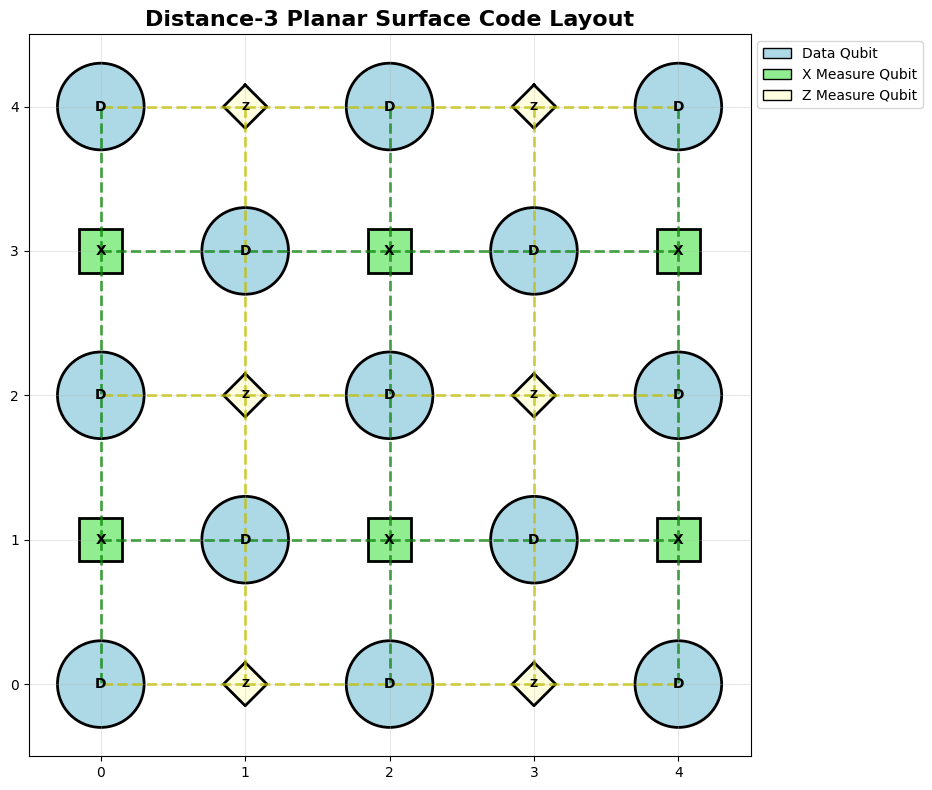

Surface Code Distance: 3
Total qubits: 25
Data qubits: 13
X measure qubits: 6
Z measure qubits: 6
X stabilizers: 6
Z stabilizers: 6


In [ ]:
# Required imports
import cirq
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle

# Assign plt to plotter for your existing method
plotter = plt

# Your PlanarSurfaceCode class remains exactly the same
class PlanarSurfaceCode:
    """
    Unrotated planar surface code with respective qubit layout.
    We will use a grid structure showing:
    - Data qubits (D)
    - X measure qubits (X)
    - Z measure qubits (Z)
    """

    def __init__(self, distance):
        self.distance = distance
        self.data_qubits, self.z_meas_qubits, self.x_meas_qubits = self.layout_planar_surface_code(distance)
        self._define_stabilizers()

    def layout_planar_surface_code(self, d):
        data_qubits = {}
        z_anc = {} # qubits for Z stabilizers
        x_anc = {} # qubits for X stabilizers
        for i in range(2 * d - 1):
            for j in range(2 * d - 1):
                if (i + j) % 2 == 0:
                    data_qubits[(i, j)] = cirq.GridQubit(i, j)
                elif i % 2 == 0:
                    z_anc[(i, j)] = cirq.GridQubit(i, j)
                else:
                    x_anc[(i, j)] = cirq.GridQubit(i, j)
        return data_qubits, z_anc, x_anc

    def _define_stabilizers(self):
        self.x_stabilizers = {}
        self.z_stabilizers = {}

        for pos in self.x_meas_qubits:
            i, j = pos
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            data_neighbors = [n for n in neighbors if n in self.data_qubits]
            if data_neighbors:
                self.x_stabilizers[pos] = data_neighbors

        for pos in self.z_meas_qubits:
            i, j = pos
            neighbors = [(i-1, j), (i+1, j), (i, j-1), (i, j+1)]
            data_neighbors = [n for n in neighbors if n in self.data_qubits]
            if data_neighbors:
                self.z_stabilizers[pos] = data_neighbors

    def visualize_layout(self):
        fig, ax = plotter.subplots(1, 1, figsize=(10, 8))
        size = 2 * self.distance - 1

        for pos in self.data_qubits:
            i, j = pos
            circle = Circle((j, size-1-i), 0.3, color='lightblue', ec='black', linewidth=2)
            ax.add_patch(circle)
            ax.text(j, size-1-i, 'D', ha='center', va='center', fontweight='bold', fontsize=10)

        for pos in self.x_meas_qubits:
            i, j = pos
            square = Rectangle((j-0.15, size-1-i-0.15), 0.3, 0.3, color='lightgreen', ec='black', linewidth=2)
            ax.add_patch(square)
            ax.text(j, size-1-i, 'X', ha='center', va='center', fontweight='bold', fontsize=10)

        for pos in self.z_meas_qubits:
            i, j = pos
            diamond_x = [j, j+0.15, j, j-0.15, j]
            diamond_y = [size-1-i+0.15, size-1-i, size-1-i-0.15, size-1-i, size-1-i+0.15]
            ax.plot(diamond_x, diamond_y, 'k-', linewidth=2)
            ax.fill(diamond_x, diamond_y, color='lightyellow')
            ax.text(j, size-1-i, 'Z', ha='center', va='center', fontweight='bold', fontsize=8)

        for pos, data_qubits_list in self.x_stabilizers.items():
            i, j = pos
            for di, dj in data_qubits_list:
                ax.plot([j, dj], [size-1-i, size-1-di], 'g--', alpha=0.7, linewidth=2)

        for pos, data_qubits_list in self.z_stabilizers.items():
            i, j = pos
            for di, dj in data_qubits_list:
                ax.plot([j, dj], [size-1-i, size-1-di], 'y--', alpha=0.7, linewidth=2)

        ax.set_xlim(-0.5, size-0.5)
        ax.set_ylim(-0.5, size-0.5)
        ax.set_aspect('equal')
        ax.grid(True, alpha=0.3)
        ax.set_title(f'Distance-{self.distance} Planar Surface Code Layout', fontsize=16, fontweight='bold')

        legend_elements = [
            Circle((0,0),0.1,color='lightblue', ec='black', label='Data Qubit'),
            Rectangle((0,0),0.1,0.1,color='lightgreen', ec='black', label='X Measure Qubit'),
            Rectangle((0,0),0.1,0.1,color='lightyellow', ec='black', label='Z Measure Qubit')
        ]
        ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
        plotter.tight_layout()
        plotter.show()

        print(f"Surface Code Distance: {self.distance}")
        print(f"Total qubits: {len(self.data_qubits) + len(self.x_meas_qubits) + len(self.z_meas_qubits)}")
        print(f"Data qubits: {len(self.data_qubits)}")
        print(f"X measure qubits: {len(self.x_meas_qubits)}")
        print(f"Z measure qubits: {len(self.z_meas_qubits)}")
        print(f"X stabilizers: {len(self.x_stabilizers)}")
        print(f"Z stabilizers: {len(self.z_stabilizers)}")

# Run the code
distance = 3
surface_code = PlanarSurfaceCode(distance)
surface_code.visualize_layout()


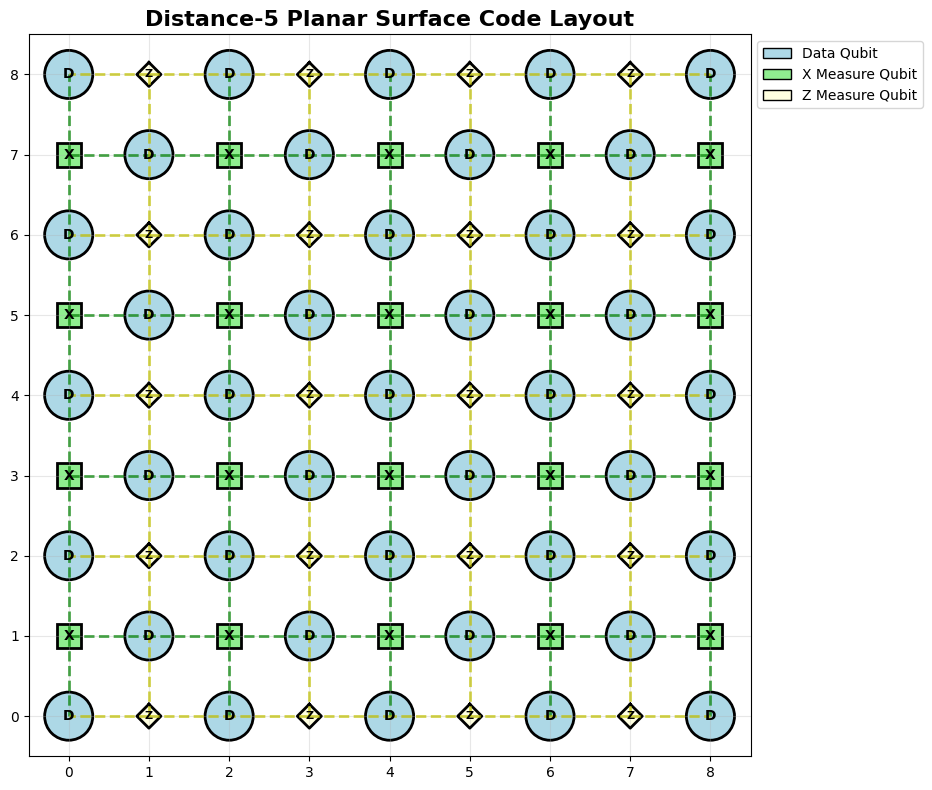

Surface Code Distance: 5
Total qubits: 81
Data qubits: 41
X measure qubits: 20
Z measure qubits: 20
X stabilizers: 20
Z stabilizers: 20


In [ ]:
surface_code = PlanarSurfaceCode(distance=5)
surface_code.visualize_layout()

# Syndrome Extraction Cycle in the Surface Code

In the previous chapter, we defined the stabilizers for the surface code. Similar to the lessons learned from repetition codes, the data qubits of the surface code can undergo errors (represented by Paulis). The syndromes associated with these errors are obtained by measuring these stabilizers using syndrome extraction circuits.

## Logical Operators

Before we start building, we need to introduce one more important concept — logical operators, denoted as \( \overline{X} \) and \( \overline{Z} \).

In the 2D surface code, there can be chains of errors that run horizontally or vertically. If these error chains run along the entire length of the surface code, then they are not detected by the code, as they do not trigger any of the surrounding measure qubits. In the literature, this observation is commonly described by noting that these error chains are not part of the stabilizer group, but they still stabilize the code.

These error chains incidentally also happen to be the logical operators of the code, analogous to the \( X \) and \( Z \) operators of single qubits.


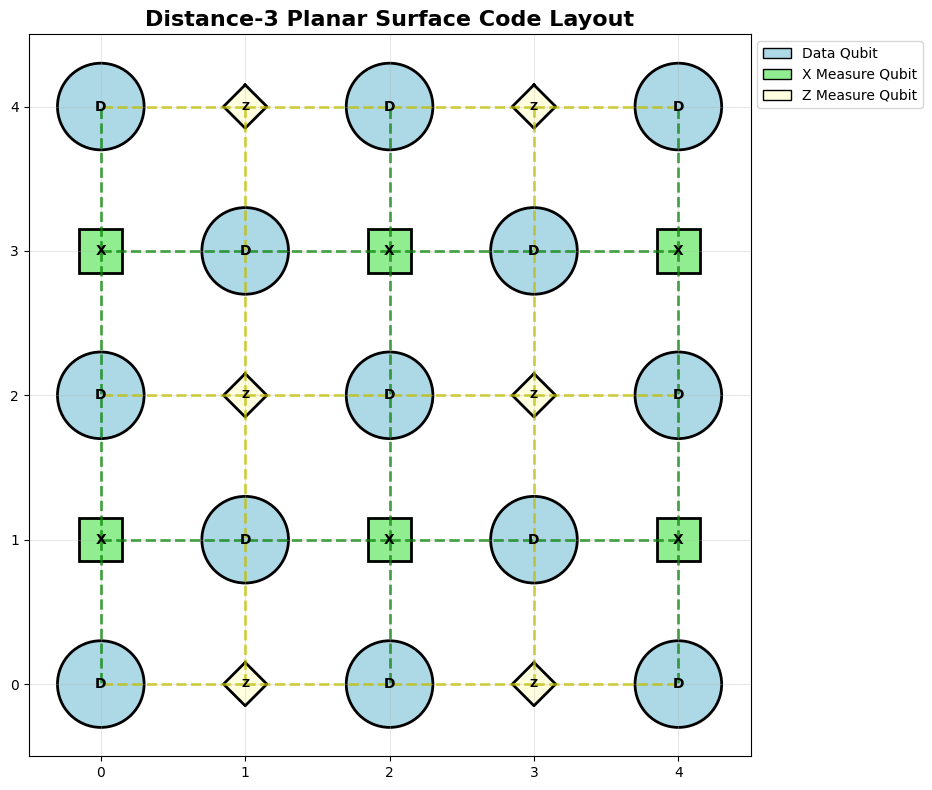

Surface Code Distance: 3
Total qubits: 25
Data qubits: 13
X measure qubits: 6
Z measure qubits: 6
X stabilizers: 6
Z stabilizers: 6


In [ ]:
PlanarSurfaceCode(distance=3).visualize_layout()

In [ ]:
class SyndromeExtraction(PlanarSurfaceCode):
    """
    Implement syndrome extraction circuits.
    Create separate circuits for X and Z syndrome extraction.

    Returns:
    --------
    - X syndrome extraction circuit
    - Z syndrome extraction circuit
    - Circuit depth and total operations for both circuits
    - No. of parallel CNOT layers
    """

    def __init__(self, distance):
        super().__init__(distance)
        self.x_syndrome_circuit = None
        self.z_syndrome_circuit = None

    def create_x_syndrome_circuit(self):
        """
        Create X syndrome extraction circuit.
        The syndrome extraction circuit is optimized to
        implement conflict-free CNOT gates.
        """
        circuit = cirq.Circuit()

        # Reset measure qubits to |0>
        reset_ops = []
        for measure_pos in self.x_meas_qubits:
            measure_qubit = self.x_meas_qubits[measure_pos]
            reset_ops.append(cirq.reset(measure_qubit))
        if reset_ops:
            circuit.append(reset_ops)

        # Hadamard gates on X measure qubits to prepare |+> state
        h_ops = []
        for measure_pos in self.x_meas_qubits:
            measure_qubit = self.x_meas_qubits[measure_pos]
            h_ops.append(cirq.H(measure_qubit))
        if h_ops:
            circuit.append(h_ops)

        # CNOT gates organized to avoid conflicts
        # organized layers to ensure no qubit is involved in multiple operations
        cnot_layers = self._organize_x_cnots()

        for layer in cnot_layers:
            if layer:
                circuit.append(layer)

        # Final Hadamard gates on X measure qubits
        final_h_ops = []
        for measure_pos in self.x_meas_qubits:
            measure_qubit = self.x_meas_qubits[measure_pos]
            final_h_ops.append(cirq.H(measure_qubit))
        if final_h_ops:
            circuit.append(final_h_ops)

        # Measurement of X measure qubits
        measure_ops = []
        for measure_pos in self.x_meas_qubits:
            measure_qubit = self.x_meas_qubits[measure_pos]
            measure_ops.append(cirq.measure(measure_qubit, key=f'x_anc_{measure_pos}'))
        if measure_ops:
            circuit.append(measure_ops)

        self.x_syndrome_circuit = circuit
        return circuit

    def create_z_syndrome_circuit(self):
        """
        Create Z syndrome extraction circuit.
        The syndrome extraction circuit is optimized to
        implement conflict-free CNOT gates.

        """
        circuit = cirq.Circuit()

        # Reset measure qubits to |0>
        reset_ops = []
        for measure_pos in self.z_meas_qubits:
            measure_qubit = self.z_meas_qubits[measure_pos]
            reset_ops.append(cirq.reset(measure_qubit))
        if reset_ops:
            circuit.append(reset_ops)

        # CNOT gates organized to avoid conflicts
        # organized layers to ensure no qubit is involved in multiple operations
        cnot_layers = self._organize_z_cnots()

        for layer in cnot_layers:
            if layer:
                circuit.append(layer)

        # Measurement of Z measure qubits
        measure_ops = []
        for measure_pos in self.z_meas_qubits:
            measure_qubit = self.z_meas_qubits[measure_pos]
            measure_ops.append(cirq.measure(measure_qubit, key=f'z_anc_{measure_pos}'))
        if measure_ops:
            circuit.append(measure_ops)

        self.z_syndrome_circuit = circuit
        return circuit

    def _organize_x_cnots(self):
        """
        Organize CNOT gates of the x-stabilizer measurement into conflict-free layers.
        """
        layers = []
        remaining_cnots = []

        # Collect all CNOT operations for X stabilizers
        for measure_pos, data_positions in self.x_stabilizers.items():
            measure_qubit = self.x_meas_qubits[measure_pos]
            for data_pos in data_positions:
                data_qubit = self.data_qubits[data_pos]
                remaining_cnots.append(cirq.CNOT(measure_qubit, data_qubit))

        # avoid conflicts
        while remaining_cnots:
            current_layer = []
            used_qubits = set()

            i = 0
            while i < len(remaining_cnots):
                cnot = remaining_cnots[i]
                control, target = cnot.qubits

                # Check if any qubit in this CNOT is already used in current layer
                if control not in used_qubits and target not in used_qubits:
                    current_layer.append(cnot)
                    used_qubits.add(control)
                    used_qubits.add(target)
                    remaining_cnots.pop(i)
                else:
                    i += 1

            if current_layer:
                layers.append(current_layer)

        return layers

    def _organize_z_cnots(self):
        """
        Organize CNOT gates of the z-stabiliser measurement into conflict-free layers.
        """
        layers = []
        remaining_cnots = []

        # Collect all CNOT operations for Z stabilizers
        for measure_pos, data_positions in self.z_stabilizers.items():
            measure_qubit = self.z_meas_qubits[measure_pos]
            for data_pos in data_positions:
                data_qubit = self.data_qubits[data_pos]
                remaining_cnots.append(cirq.CNOT(data_qubit, measure_qubit))

        # avoid conflicts
        while remaining_cnots:
            current_layer = []
            used_qubits = set()

            i = 0
            while i < len(remaining_cnots):
                cnot = remaining_cnots[i]
                control, target = cnot.qubits

                # Check if any qubit in this CNOT is already used in current layer
                if control not in used_qubits and target not in used_qubits:
                    current_layer.append(cnot)
                    used_qubits.add(control)
                    used_qubits.add(target)
                    remaining_cnots.pop(i)
                else:
                    i += 1

            if current_layer:
                layers.append(current_layer)

        return layers

    def print_syndrome_circuits(self):
        """
        Print both X and Z syndrome extraction circuits.
        """
        print("\n" + "="*60)
        print("X-SYNDROME EXTRACTION CIRCUIT")
        print("="*60)

        if self.x_syndrome_circuit is None:
            self.create_x_syndrome_circuit()

        print(f"Circuit depth: {len(self.x_syndrome_circuit)}")
        print(f"Total operations: {sum(len(moment) for moment in self.x_syndrome_circuit)}")
        print("\nCircuit:")
        print(self.x_syndrome_circuit)

        print("\n" + "="*60)
        print("Z SYNDROME EXTRACTION CIRCUIT")
        print("="*60)

        if self.z_syndrome_circuit is None:
            self.create_z_syndrome_circuit()

        print(f"Circuit depth: {len(self.z_syndrome_circuit)}")
        print(f"Total operations: {sum(len(moment) for moment in self.z_syndrome_circuit)}")
        print("\nCircuit:")
        print(self.z_syndrome_circuit)

        # Analyze circuit efficiency
        print("\n" + "="*60)
        print("CIRCUIT ANALYSIS")
        print("="*60)

        x_cnot_layers = self._organize_x_cnots()
        z_cnot_layers = self._organize_z_cnots()

        print(f"X syndrome CNOT layers: {len(x_cnot_layers)}")
        print(f"Z syndrome CNOT layers: {len(z_cnot_layers)}")

        for i, layer in enumerate(x_cnot_layers):
            print(f"  X Layer {i+1}: {len(layer)} parallel CNOTs")

        for i, layer in enumerate(z_cnot_layers):
            print(f"  Z Layer {i+1}: {len(layer)} parallel CNOTs")

        print(f"\nTotal X stabilizers measured: {len(self.x_stabilizers)}")
        print(f"Total Z stabilizers measured: {len(self.z_stabilizers)}")

In [ ]:
syndrome_extractor = SyndromeExtraction(distance = 3)
syndrome_extractor.print_syndrome_circuits()


X-SYNDROME EXTRACTION CIRCUIT
Circuit depth: 8
Total operations: 44

Circuit:
                   ┌───┐   ┌───┐
(0, 0): ────────────X──────────────────────────────────────────────────────────────
                    │
(0, 2): ────────────┼X─────────────────────────────────────────────────────────────
                    ││
(0, 4): ────────────┼┼X────────────────────────────────────────────────────────────
                    │││
(1, 0): ───R───H────@┼┼─────@──────@───H───M('x_anc_(1, 0)')───────────────────────
                     ││     │      │
(1, 1): ─────────────┼┼─────┼──────X───X───────────────────────────────────────────
                     ││     │          │
(1, 2): ───R───H─────@┼─────┼@─────@───@───H───────────────────M('x_anc_(1, 2)')───
                      │     ││     │
(1, 3): ──────────────┼─────┼┼─────X───X───────────────────────────────────────────
                      │     ││         │
(1, 4): ───R───H──────@─────┼┼@────────@───H───────────────────M('x_anc_(1,

In [ ]:
class LogicalOperators(SyndromeExtraction):
    """
    Implement logical operators for planar surface code
    and visualise the chain of paulis that span the code.
    """

    def __init__(self, distance):
        super().__init__(distance)
        self.logical_x_operators = []
        self.logical_z_operators = []
        self._find_logical_operators()

    def _find_logical_operators(self):
        """
        Find logical X and Z operators for the planar surface code.

        """
        # For planar surface code, logical operators are strings that span the code

        logical_x_path = []

        # Get all data qubit positions and sort by column (j), then row (i)
        data_positions = sorted(self.data_qubits.keys(), key=lambda pos: (pos[1], pos[0]))

        # Find the leftmost column that has data qubits
        leftmost_col = min(pos[1] for pos in data_positions)

        # Collect all data qubits in the leftmost column
        for pos in data_positions:
            if pos[1] == leftmost_col:
                logical_x_path.append(pos)

        self.logical_x_operators = [logical_x_path]

        # Logical Z: horizontal string from left to right

        logical_z_path = []

        # Find the topmost row that has data qubits
        topmost_row = min(pos[0] for pos in data_positions)

        # Collect all data qubits in the topmost row
        for pos in data_positions:
            if pos[0] == topmost_row:
                logical_z_path.append(pos)

        self.logical_z_operators = [logical_z_path]

    def visualize_logical_operators(self):
        """
        Visualize the surface code layout with logical operators highlighted.

        """
        fig, axes = plotter.subplots(1, 2, figsize=(12, 6))

        size = 2 * self.distance - 1


        # Plot 1: Add the Logical X operator to the surface code
        ax2 = axes[0]
        self._plot_base_layout(ax2, size)
        self._highlight_logical_operators(ax2, size, 'X')
        ax2.set_title(f'Logical X Operator', fontsize=14, fontweight='bold')

        # Plot 2: Add the  Logical Z operator to the surface code
        ax3 = axes[1]
        self._plot_base_layout(ax3, size)
        self._highlight_logical_operators(ax3, size, 'Z')
        ax3.set_title(f'Logical Z Operator', fontsize=14, fontweight='bold')

        for ax in axes:
            ax.set_xlim(-0.5, size-0.5)
            ax.set_ylim(-0.5, size-0.5)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)

        legend_elements = [
            Circle((0, 0), 0.1, color='lightblue', ec='black', label='Data Qubit'),
            Rectangle((0, 0), 0.1, 0.1, color='lightgreen', ec='black', label='X Measure Qubit'),
            Rectangle((0, 0), 0.1, 0.1, color='lightyellow', ec='black', label='Z Measure Qubit'),
            Circle((0, 0), 0.1, color='red', ec='black', linewidth=3, label='Logical Operator'),
        ]

        fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.02), ncol=4)
        plotter.tight_layout()
        plotter.subplots_adjust(bottom=0.15)
        plotter.show()

        # Print logical operator information
        self._print_logical_info()

    def _plot_base_layout(self, ax, size):
        """Plot the base surface code layout on given axes."""
        # Draw data qubits
        for pos in self.data_qubits:
            i, j = pos
            color = 'lightblue'
            circle = Circle((j, size-1-i), 0.3, color=color, ec='black', linewidth=2)
            ax.add_patch(circle)
            ax.text(j, size-1-i, 'D', ha='center', va='center', fontweight='bold', fontsize=8)

        # Draw X measure qubits
        for pos in self.x_meas_qubits:
            i, j = pos
            color = 'lightgreen'
            square = Rectangle((j-0.3/2, size-1-i-0.3/2), 0.3, 0.3,
                             color=color, ec='black', linewidth=2)
            ax.add_patch(square)
            ax.text(j, size-1-i, 'X', ha='center', va='center', fontweight='bold', fontsize=8)

        # Draw Z measures
        for pos in self.z_meas_qubits:
            i, j = pos
            color = 'lightyellow'
            diamond_x = [j, j+0.15, j, j-0.15, j]
            diamond_y = [size-1-i+0.15, size-1-i, size-1-i-0.15, size-1-i, size-1-i+0.15]
            ax.plot(diamond_x, diamond_y, 'k-', linewidth=2)
            ax.fill(diamond_x, diamond_y, color=color)
            ax.text(j, size-1-i, 'Z', ha='center', va='center', fontweight='bold', fontsize=6)

        # Draw stabilizer connections
        for pos, data_qubits_list in self.x_stabilizers.items():
            i, j = pos
            for di, dj in data_qubits_list:
                ax.plot([j, dj], [size-1-i, size-1-di], 'g--', alpha=0.3, linewidth=1)

        for pos, data_qubits_list in self.z_stabilizers.items():
            i, j = pos
            for di, dj in data_qubits_list:
                ax.plot([j, dj], [size-1-i, size-1-di], 'y--', alpha=0.3, linewidth=1)

    def _highlight_logical_operators(self, ax, size, operator_type):
        """
        Highlight logical operators on the plot.

        """
        if operator_type == 'X':
            operators = self.logical_x_operators
            color = 'red'
            line_style = '-'
        else:  # operator_type == 'Z'
            operators = self.logical_z_operators
            color = 'blue'
            line_style = '-'

        for op_path in operators:
            # Highlight the qubits in the logical operator
            for pos in op_path:
                i, j = pos

                highlight_circle = Circle((j, size-1-i), 0.35,
                                        fill=False, ec=color, linewidth=4, alpha=0.8)
                ax.add_patch(highlight_circle)

            if len(op_path) > 1:
                sorted_path = sorted(op_path, key=lambda pos: (pos[0], pos[1]))
                for k in range(len(sorted_path) - 1):
                    pos1 = sorted_path[k]
                    pos2 = sorted_path[k + 1]
                    i1, j1 = pos1
                    i2, j2 = pos2
                    ax.plot([j1, j2], [size-1-i1, size-1-i2],
                           color=color, linewidth=4, alpha=0.7, linestyle=line_style)

    def _print_logical_info(self):
        """
        Print information about the logical operators.

        """
        print("\n" + "="*60)
        print("LOGICAL OPERATORS ANALYSIS")
        print("="*60)

        print(f"Number of logical qubits encoded: 1")
        print(f"Distance: {self.distance}")

        print(f"\nLogical X operators:")
        for i, op_path in enumerate(self.logical_x_operators):
            print(f"  X_{i+1}: {len(op_path)} qubits")
            print(f"       Path: {op_path}")
            print(f"       Description: Vertical string from top to bottom")

        print(f"\nLogical Z operators:")
        for i, op_path in enumerate(self.logical_z_operators):
            print(f"  Z_{i+1}: {len(op_path)} qubits")
            print(f"       Path: {op_path}")
            print(f"       Description: Horizontal string from left to right")

        # Verify anticommutation
        print(f"\nAnticommutation check:")
        x_path = set(self.logical_x_operators[0])
        z_path = set(self.logical_z_operators[0])
        overlap = x_path.intersection(z_path)
        print(f"  Logical X and Z paths overlap at: {len(overlap)} qubits")
        print(f"  Overlap positions: {sorted(list(overlap))}")
        print(f"  Anticommutation: {'Verified' if len(overlap) % 2 == 1 else 'Failed'}")

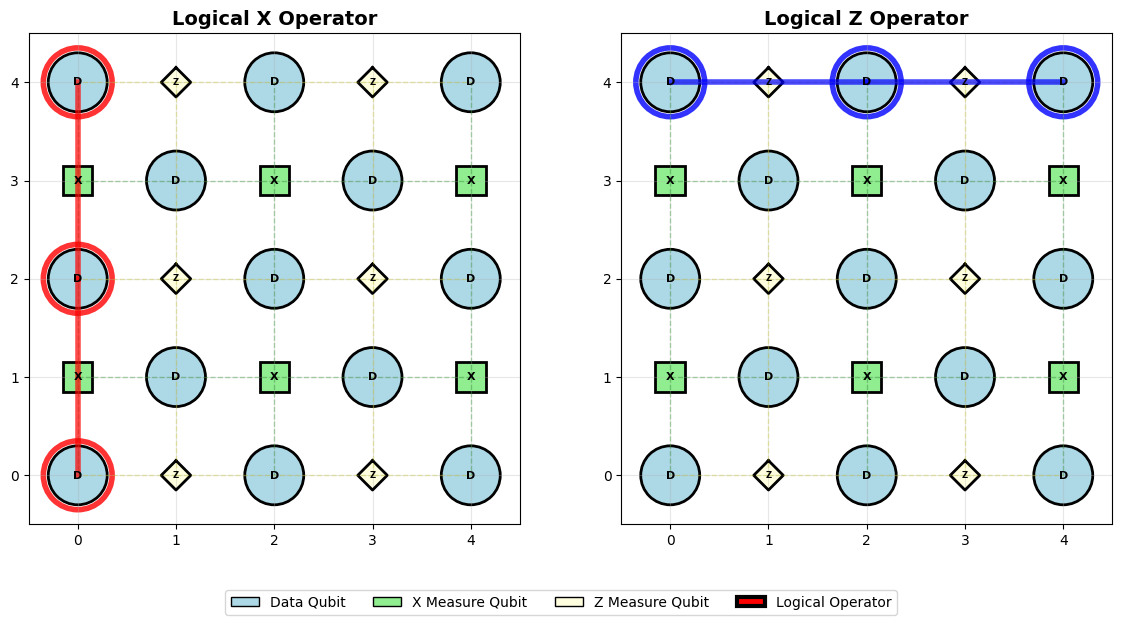


LOGICAL OPERATORS ANALYSIS
Number of logical qubits encoded: 1
Distance: 3

Logical X operators:
  X_1: 3 qubits
       Path: [(0, 0), (2, 0), (4, 0)]
       Description: Vertical string from top to bottom

Logical Z operators:
  Z_1: 3 qubits
       Path: [(0, 0), (0, 2), (0, 4)]
       Description: Horizontal string from left to right

Anticommutation check:
  Logical X and Z paths overlap at: 1 qubits
  Overlap positions: [(0, 0)]
  Anticommutation: Verified


In [ ]:
distance = 3 # can change to distance 5
logical_ops = LogicalOperators(distance)
logical_ops.visualize_logical_operators()

In [ ]:
class ErrorInjection(LogicalOperators):
    """
    Inject errors in the surface code and visualise the errors.
    1. Inject random Pauli errors on data qubits ~like a depolarizing error.
    2. Inject by hand specific errors at given positions.
    3. Create logical errors.
    """

    def __init__(self, distance: int):
        super().__init__(distance)
        self.x_errors = set()  # Positions with X errors (bit flips)
        self.z_errors = set()  # Positions with Z errors (phase flips)
        self.y_errors = set()  # Positions with Y errors (both X and Z)
        self.error_syndrome_x = {}  # X syndrome measurements
        self.error_syndrome_z = {}  # Z syndrome measurements

    def inject_random_errors(self, error_rate = 0.1, seed = None):
        """
        Inject random Pauli errors on data qubits.
        This is a heuristic implementation of depolarizing noise.
        """
        if seed is not None:
            random.seed(seed)

        # Clear previous errors
        self.x_errors.clear()
        self.z_errors.clear()
        self.y_errors.clear()

        for pos in self.data_qubits:
            if random.random() < error_rate:
                # Choose error type: (X, Z, or Y) ~ depolarizing error
                error_type = random.choice(['X', 'Z', 'Y'])

                if error_type == 'X':
                    self.x_errors.add(pos)
                elif error_type == 'Z':
                    self.z_errors.add(pos)
                else:  # Y error
                    self.y_errors.add(pos)

        # Calculate syndromes
        self._calculate_syndromes()

        print(f"Errors with rate {error_rate}:")
        print(f"  X errors: {len(self.x_errors)} at positions {sorted(self.x_errors)}")
        print(f"  Z errors: {len(self.z_errors)} at positions {sorted(self.z_errors)}")
        print(f"  Y errors: {len(self.y_errors)} at positions {sorted(self.y_errors)}")
        print(f"  Total errors: {len(self.x_errors) + len(self.z_errors) + len(self.y_errors)}")

    def inject_specific_errors(self, x_positions=None, z_positions=None, y_positions=None):
        """
        Add specific errors at given positions.
        """
        # Clear previous errors
        self.x_errors.clear()
        self.z_errors.clear()
        self.y_errors.clear()

        if x_positions:
            for pos in x_positions:
                if pos in self.data_qubits:
                    self.x_errors.add(pos)

        if z_positions:
            for pos in z_positions:
                if pos in self.data_qubits:
                    self.z_errors.add(pos)

        if y_positions:
            for pos in y_positions:
                if pos in self.data_qubits:
                    self.y_errors.add(pos)

        # Calculate syndromes
        self._calculate_syndromes()

        print(f"Specific errors introduced:")
        print(f"  X errors: {len(self.x_errors)} at positions {sorted(self.x_errors)}")
        print(f"  Z errors: {len(self.z_errors)} at positions {sorted(self.z_errors)}")
        print(f"  Y errors: {len(self.y_errors)} at positions {sorted(self.y_errors)}")

    def _calculate_syndromes(self):
        """
        Calculate syndrome measurements based on current errors.
        """
        # Calculate X syndromes (detect Z errors)
        self.error_syndrome_x = {}
        for measure_pos, data_positions in self.x_stabilizers.items():
            syndrome = 0
            for data_pos in data_positions:
                # X stabilizer detects Z errors and Y errors (Y=XZ)
                if data_pos in self.z_errors or data_pos in self.y_errors:
                    syndrome ^= 1
            self.error_syndrome_x[measure_pos] = syndrome

        # Calculate Z syndromes (detect X errors)
        self.error_syndrome_z = {}
        for measure_pos, data_positions in self.z_stabilizers.items():
            syndrome = 0
            for data_pos in data_positions:
                # Z stabilizer detects X errors and Y errors (Y=XZ)
                if data_pos in self.x_errors or data_pos in self.y_errors:
                    syndrome ^= 1
            self.error_syndrome_z[measure_pos] = syndrome

    def visualize_errors(self, show_syndromes=True):
        """
        Visualize the surface code with errors and syndromes.

        """
        if show_syndromes:
            fig, axes = plotter.subplots(1, 3, figsize=(21, 7))
        else:
            fig, axes = plotter.subplots(1, 1, figsize=(10, 8))
            axes = [axes]

        size = 2 * self.distance - 1

        # Plot random errors
        ax1 = axes[0]
        self._plot_errors_layout(ax1, size, show_syndromes=False)
        ax1.set_title(f'Surface Code with Errors', fontsize=14, fontweight='bold')

        if show_syndromes:
            # X syndromes
            ax2 = axes[1]
            self._plot_errors_layout(ax2, size, syndrome_type='X')
            ax2.set_title(f'X Syndromes (Detect Z/Y Errors)', fontsize=14, fontweight='bold')

            # Z syndromes
            ax3 = axes[2]
            self._plot_errors_layout(ax3, size, syndrome_type='Z')
            ax3.set_title(f'Z Syndromes (Detect X/Y Errors)', fontsize=14, fontweight='bold')

        for ax in axes:
            ax.set_xlim(-0.5, size-0.5)
            ax.set_ylim(-0.5, size-0.5)
            ax.set_aspect('equal')
            ax.grid(True, alpha=0.3)

        legend_elements = [
            Circle((0, 0), 0.1, color='lightblue', ec='black', label='Data Qubit'),
            Rectangle((0, 0), 0.1, 0.1, color='lightgreen', ec='black', label='X Measure Qubit'),
            Rectangle((0, 0), 0.1, 0.1, color='lightyellow', ec='black', label='Z Measure Qubit'),
            Circle((0, 0), 0.1, color='red', ec='black', linewidth=3, label='X Error'),
            Circle((0, 0), 0.1, color='blue', ec='black', linewidth=3, label='Z Error'),
            Circle((0, 0), 0.1, color='orange', ec='black', linewidth=3, label='Y Error'),
        ]

        if show_syndromes:
            legend_elements.extend([
                mpatches.Patch(color='purple', alpha=0.7, label='Triggered Syndrome'),
                mpatches.Patch(color='white', ec='black', label='Quiet Syndrome'),
            ])

        fig.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, 0.02), ncol=4)
        plotter.tight_layout()
        plotter.subplots_adjust(bottom=0.15)
        plotter.show()


        self._print_syndrome_info()

    def _plot_errors_layout(self, ax, size, show_syndromes=True, syndrome_type=None):
        """
        Plot the surface code layout with errors and optionally syndromes.
        """

        self._plot_base_layout_errors(ax, size, syndrome_type)

        # Highlight errors on data qubits
        error_colors = {'X': 'red', 'Z': 'blue', 'Y': 'purple'}

        # Draw X errors
        for pos in self.x_errors:
            i, j = pos
            error_circle = Circle((j, size-1-i), 0.4,
                                fill=False, ec=error_colors['X'], linewidth=4, alpha=0.9)
            ax.add_patch(error_circle)

            ax.text(j+0.3, size-1-i+0.3, 'X', ha='center', va='center',
                   fontweight='bold', fontsize=10, color=error_colors['X'])

        # Draw Z errors
        for pos in self.z_errors:
            i, j = pos
            error_circle = Circle((j, size-1-i), 0.4,
                                fill=False, ec=error_colors['Z'], linewidth=4, alpha=0.9)
            ax.add_patch(error_circle)

            ax.text(j+0.3, size-1-i+0.3, 'Z', ha='center', va='center',
                   fontweight='bold', fontsize=10, color=error_colors['Z'])

        # Draw Y errors
        for pos in self.y_errors:
            i, j = pos
            error_circle = Circle((j, size-1-i), 0.4,
                                fill=False, ec=error_colors['Y'], linewidth=4, alpha=0.9)
            ax.add_patch(error_circle)

            ax.text(j+0.3, size-1-i+0.3, 'Y', ha='center', va='center',
                   fontweight='bold', fontsize=10, color=error_colors['Y'])

    def _plot_base_layout_errors(self, ax, size, syndrome_type=None):
        """
        Plot the base surface code layout with syndrome highlighting.
        """
        for pos in self.data_qubits:
            i, j = pos
            color = 'lightblue'
            circle = Circle((j, size-1-i), 0.3, color=color, ec='black', linewidth=2)
            ax.add_patch(circle)
            ax.text(j, size-1-i, 'D', ha='center', va='center', fontweight='bold', fontsize=8)


        for pos in self.x_meas_qubits:
            i, j = pos


            if syndrome_type == 'X' and pos in self.error_syndrome_x:
                if self.error_syndrome_x[pos] == 1:
                    color = 'purple'  # Triggered syndrome
                    alpha = 0.9
                else:
                    color = 'lightgreen'  # Quiet syndrome
                    alpha = 0.7
            else:
                color = 'lightgreen'
                alpha = 1.0

            square = Rectangle((j-0.3/2, size-1-i-0.3/2), 0.3, 0.3,
                             color=color, ec='black', linewidth=2)
            ax.add_patch(square)
            ax.text(j, size-1-i, 'X', ha='center', va='center', fontweight='bold', fontsize=8)

            # Add syndrome value if showing syndromes
            if syndrome_type == 'X' and pos in self.error_syndrome_x:
                syndrome_val = self.error_syndrome_x[pos]
                ax.text(j+0.35, size-1-i+0.35, str(syndrome_val), ha='center', va='center',
                       fontweight='bold', fontsize=12, color='purple' if syndrome_val else 'green',
                       bbox=dict(facecolor='black', alpha=0.2, edgecolor='white'))


        for pos in self.z_meas_qubits:
            i, j = pos
            if syndrome_type == 'Z' and pos in self.error_syndrome_z:
                if self.error_syndrome_z[pos] == 1:
                    color = 'purple'  # Triggered syndrome
                    alpha = 0.9
                else:
                    color = 'lightyellow'  # Quiet syndrome
                    alpha = 0.7
            else:
                color = 'lightyellow'
                alpha = 1.0

            diamond_x = [j, j+0.25, j, j-0.25, j]
            diamond_y = [size-1-i+0.25, size-1-i, size-1-i-0.25, size-1-i, size-1-i+0.25]
            ax.plot(diamond_x, diamond_y, 'k-', linewidth=2)
            ax.fill(diamond_x, diamond_y, color=color, alpha=alpha)
            ax.text(j, size-1-i, 'Z', ha='center', va='center', fontweight='bold', fontsize=6)

            # Add syndrome value if showing syndromes
            if syndrome_type == 'Z' and pos in self.error_syndrome_z:
                syndrome_val = self.error_syndrome_z[pos]
                ax.text(j+0.35, size-1-i+0.35, str(syndrome_val), ha='center', va='center',
                       fontweight='bold', fontsize=12, color='purple'if syndrome_val else 'green',
                       bbox=dict(facecolor='black', alpha=0.2, edgecolor='white'))


        if syndrome_type != 'X':
            for pos, data_qubits_list in self.x_stabilizers.items():
                i, j = pos
                for di, dj in data_qubits_list:
                    ax.plot([j, dj], [size-1-i, size-1-di], 'g--', alpha=0.2, linewidth=1)

        if syndrome_type != 'Z':
            for pos, data_qubits_list in self.z_stabilizers.items():
                i, j = pos
                for di, dj in data_qubits_list:
                    ax.plot([j, dj], [size-1-i, size-1-di], 'y--', alpha=0.2, linewidth=1)

    def _print_syndrome_info(self):
        """Syndrome information."""
        print("\n" + "="*60)
        print("SYNDROME MEASUREMENT RESULTS")
        print("="*60)

        # Count triggered syndromes
        x_triggered = sum(1 for syndrome in self.error_syndrome_x.values() if syndrome == 1)
        z_triggered = sum(1 for syndrome in self.error_syndrome_z.values() if syndrome == 1)

        print(f"X syndromes: {x_triggered}/{len(self.error_syndrome_x)} triggered")
        print(f"Z syndromes: {z_triggered}/{len(self.error_syndrome_z)} triggered")

        # Print triggered syndromes
        print(f"\nTriggered X syndromes (detect Z/Y errors):")
        for pos, syndrome in self.error_syndrome_x.items():
            if syndrome == 1:
                print(f"  Measure qubit at {pos}: syndrome = {syndrome}")

        print(f"\nTriggered Z syndromes (detect X/Y errors):")
        for pos, syndrome in self.error_syndrome_z.items():
            if syndrome == 1:
                print(f"  Measure qubit at {pos}: syndrome = {syndrome}")

        # Check if logical operators are affected
        self._check_logical_flips()

    def _check_logical_flips(self):
        """
        Check if logical flips occurred (anticommuting with the logical operators)
        """
        print(f"\nLogical flip analysis:")

        # Check logical X operator (affected by Z errors)
        logical_x_errors = 0
        for pos in self.logical_x_operators[0]:
            if pos in self.z_errors or pos in self.y_errors:
                logical_x_errors += 1

        # Check logical Z operator (affected by X errors)
        logical_z_errors = 0
        for pos in self.logical_z_operators[0]:
            if pos in self.x_errors or pos in self.y_errors:
                logical_z_errors += 1

        print(f"  Logical X operator: {logical_x_errors} errors")
        print(f"  Logical Z operator: {logical_z_errors} errors")

        # Determine if logical error occurred
        logical_x_flipped = logical_x_errors % 2 == 1
        logical_z_flipped = logical_z_errors % 2 == 1

        print(f"  Logical X flipped: {'Yes' if logical_x_flipped else 'No'}")
        print(f"  Logical Z flipped: {'Yes' if logical_z_flipped else 'No'}")

        if logical_x_flipped or logical_z_flipped:
            print(f"LOGICAL FLIP DETECTED!")
        else:
            print(f"No logical flips")

In [ ]:
distance = 3
error_sim = ErrorInjection(distance = distance)

Errors with rate 0.05:
  X errors: 2 at positions [(3, 1), (4, 2)]
  Z errors: 1 at positions [(0, 2)]
  Y errors: 0 at positions []
  Total errors: 3


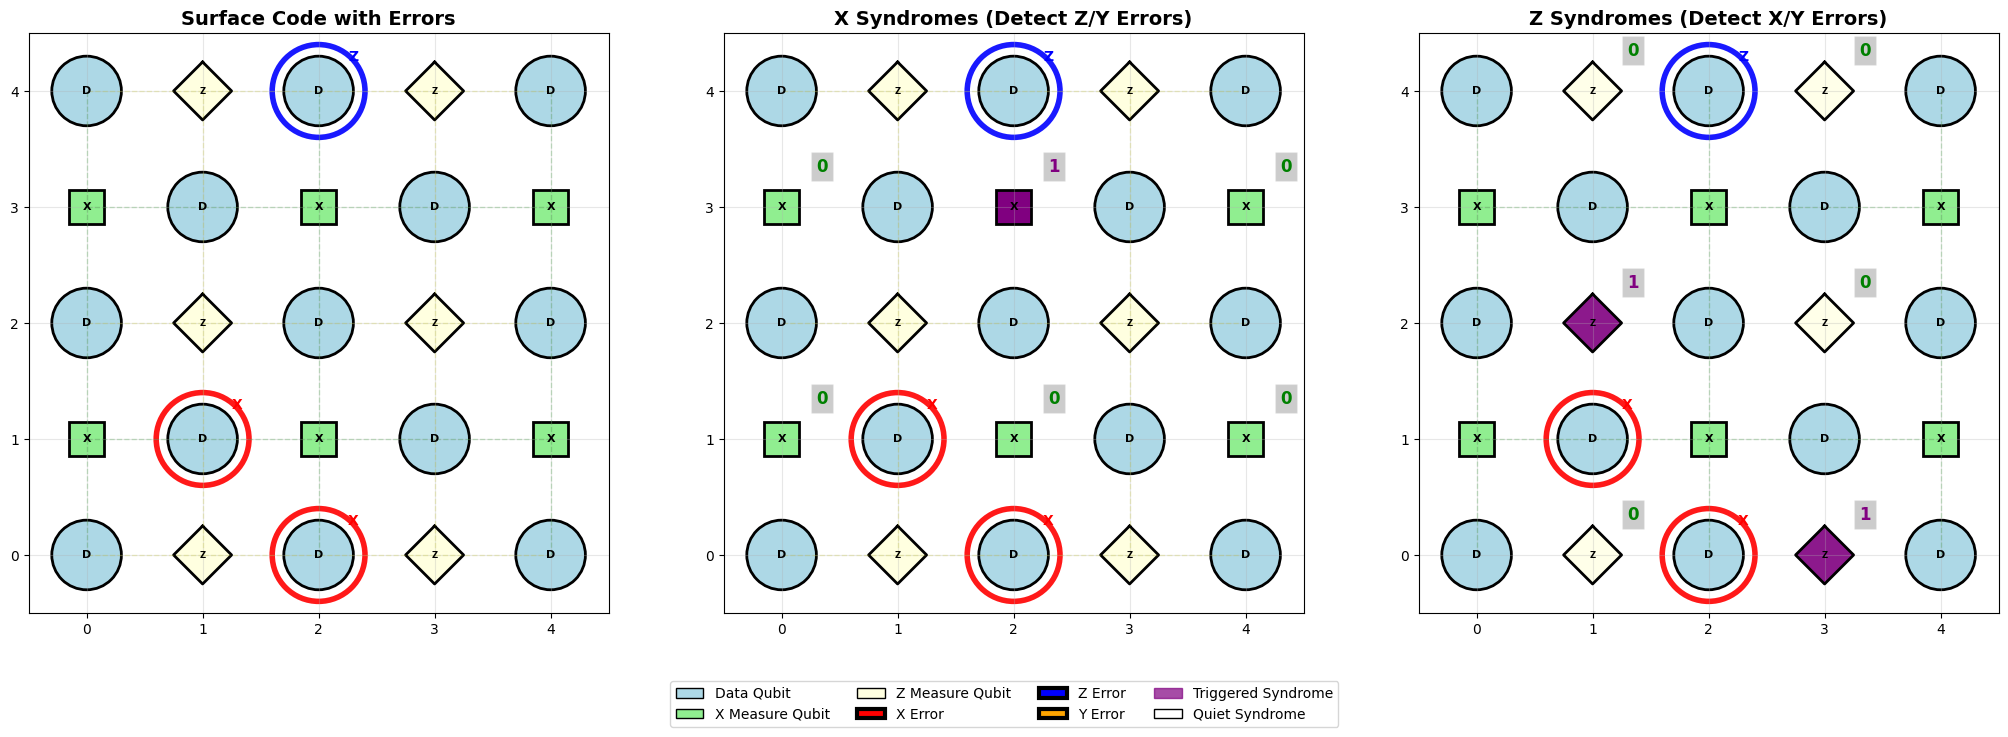


SYNDROME MEASUREMENT RESULTS
X syndromes: 1/6 triggered
Z syndromes: 2/6 triggered

Triggered X syndromes (detect Z/Y errors):
  Measure qubit at (1, 2): syndrome = 1

Triggered Z syndromes (detect X/Y errors):
  Measure qubit at (2, 1): syndrome = 1
  Measure qubit at (4, 3): syndrome = 1

Logical flip analysis:
  Logical X operator: 0 errors
  Logical Z operator: 0 errors
  Logical X flipped: No
  Logical Z flipped: No
No logical flips


In [ ]:
import random
import matplotlib.patches as mpatches  # Add this import for Patch

distance = 3
error_sim = ErrorInjection(distance=distance)

# Example 1: Inject random errors and observe the syndrome checks that fire
error_sim.inject_random_errors(error_rate=0.05, seed=42)
error_sim.visualize_errors()


Specific errors introduced:
  X errors: 1 at positions [(0, 0)]
  Z errors: 0 at positions []
  Y errors: 0 at positions []


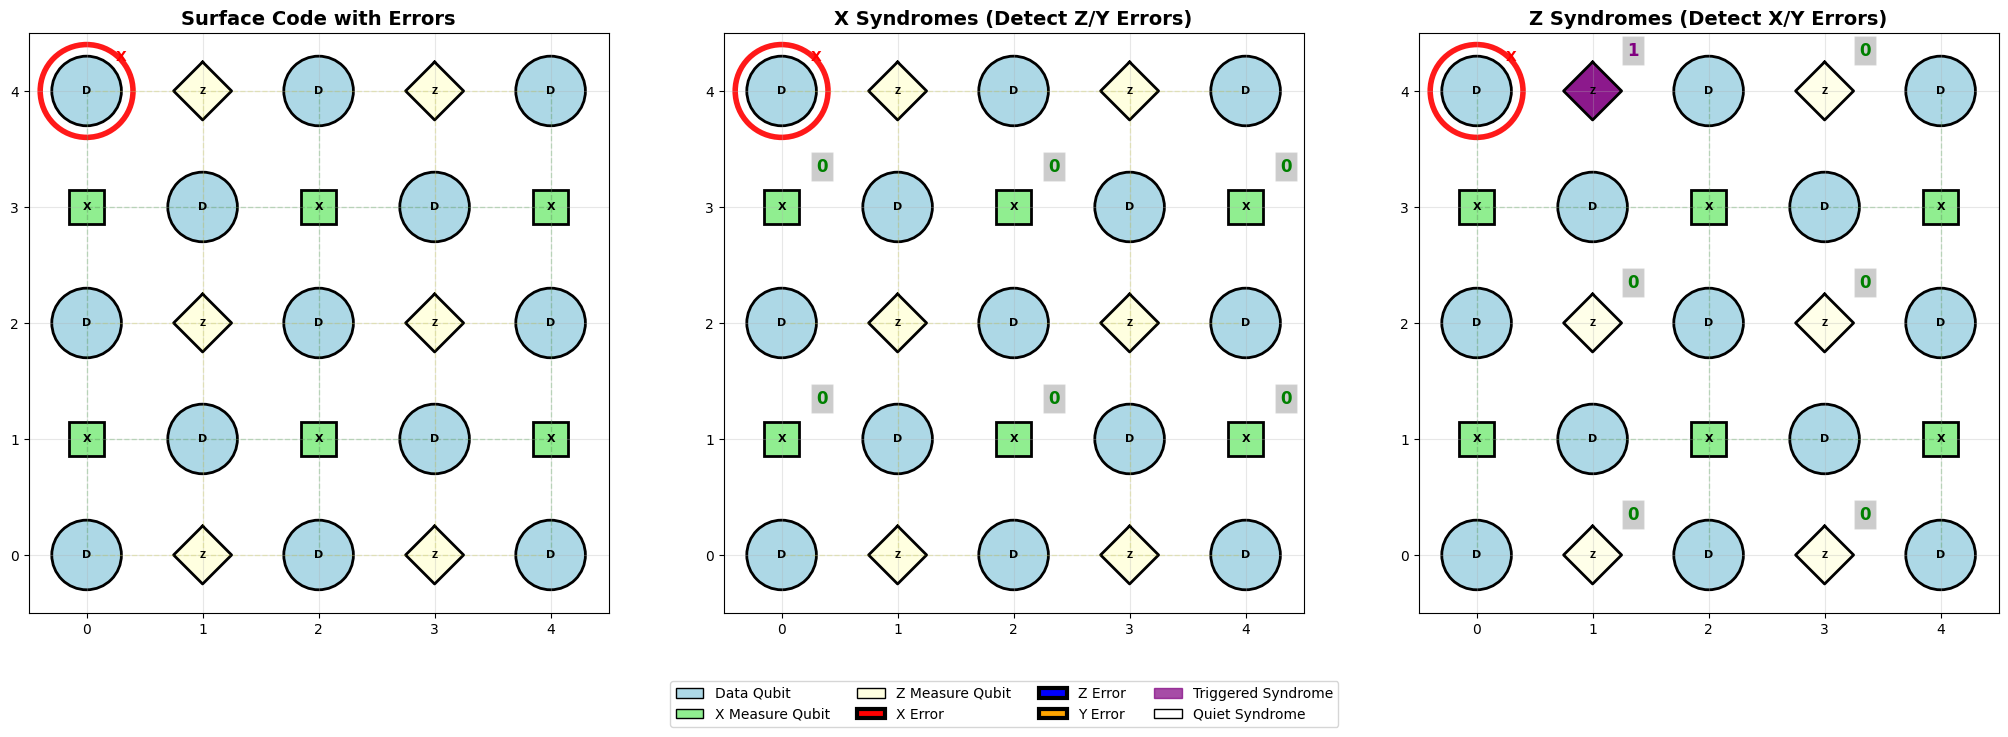


SYNDROME MEASUREMENT RESULTS
X syndromes: 0/6 triggered
Z syndromes: 1/6 triggered

Triggered X syndromes (detect Z/Y errors):

Triggered Z syndromes (detect X/Y errors):
  Measure qubit at (0, 1): syndrome = 1

Logical flip analysis:
  Logical X operator: 0 errors
  Logical Z operator: 1 errors
  Logical X flipped: No
  Logical Z flipped: Yes
LOGICAL FLIP DETECTED!


In [ ]:
# Inject 1 X errors along logical Z operator -- no logical flip ()
logical_z_path = error_sim.logical_z_operators[0]
error_positions = logical_z_path[:1]
error_sim.inject_specific_errors(x_positions=error_positions)
error_sim.visualize_errors()

Specific errors introduced:
  X errors: 2 at positions [(0, 0), (0, 2)]
  Z errors: 0 at positions []
  Y errors: 0 at positions []


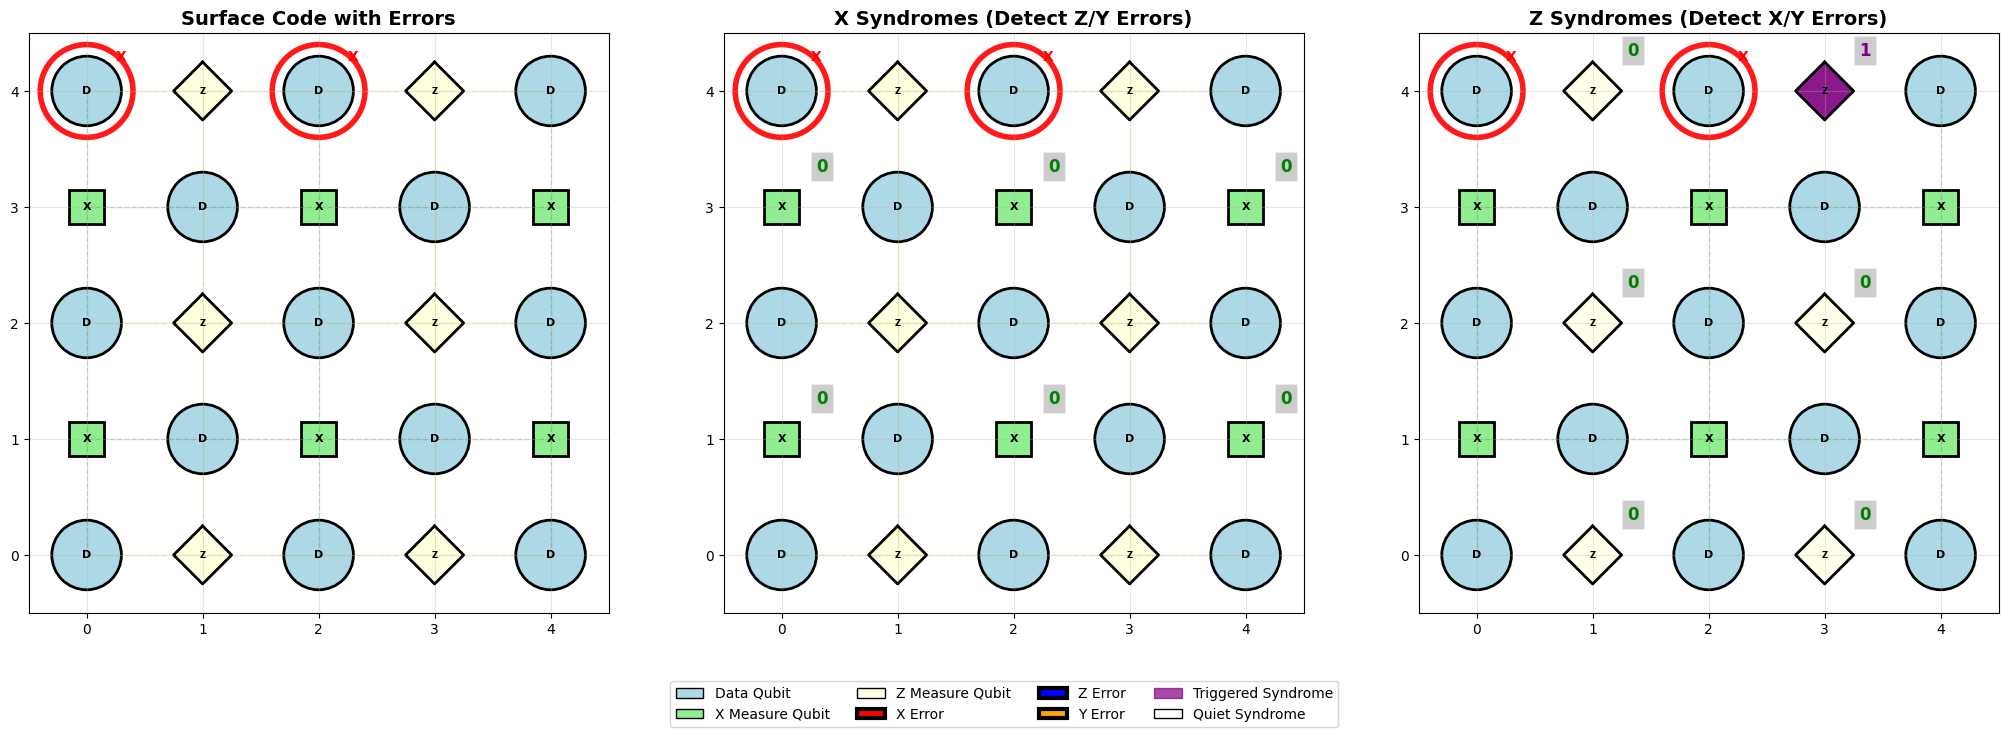


SYNDROME MEASUREMENT RESULTS
X syndromes: 0/6 triggered
Z syndromes: 1/6 triggered

Triggered X syndromes (detect Z/Y errors):

Triggered Z syndromes (detect X/Y errors):
  Measure qubit at (0, 3): syndrome = 1

Logical flip analysis:
  Logical X operator: 0 errors
  Logical Z operator: 2 errors
  Logical X flipped: No
  Logical Z flipped: No
No logical flips


In [ ]:
# Inject 2 X errors along logical Z operator -- no logical flip
logical_z_path = error_sim.logical_z_operators[0]
error_positions = logical_z_path[:2]
error_sim.inject_specific_errors(x_positions=error_positions)
error_sim.visualize_errors()

Specific errors introduced:
  X errors: 3 at positions [(0, 0), (0, 2), (0, 4)]
  Z errors: 0 at positions []
  Y errors: 0 at positions []


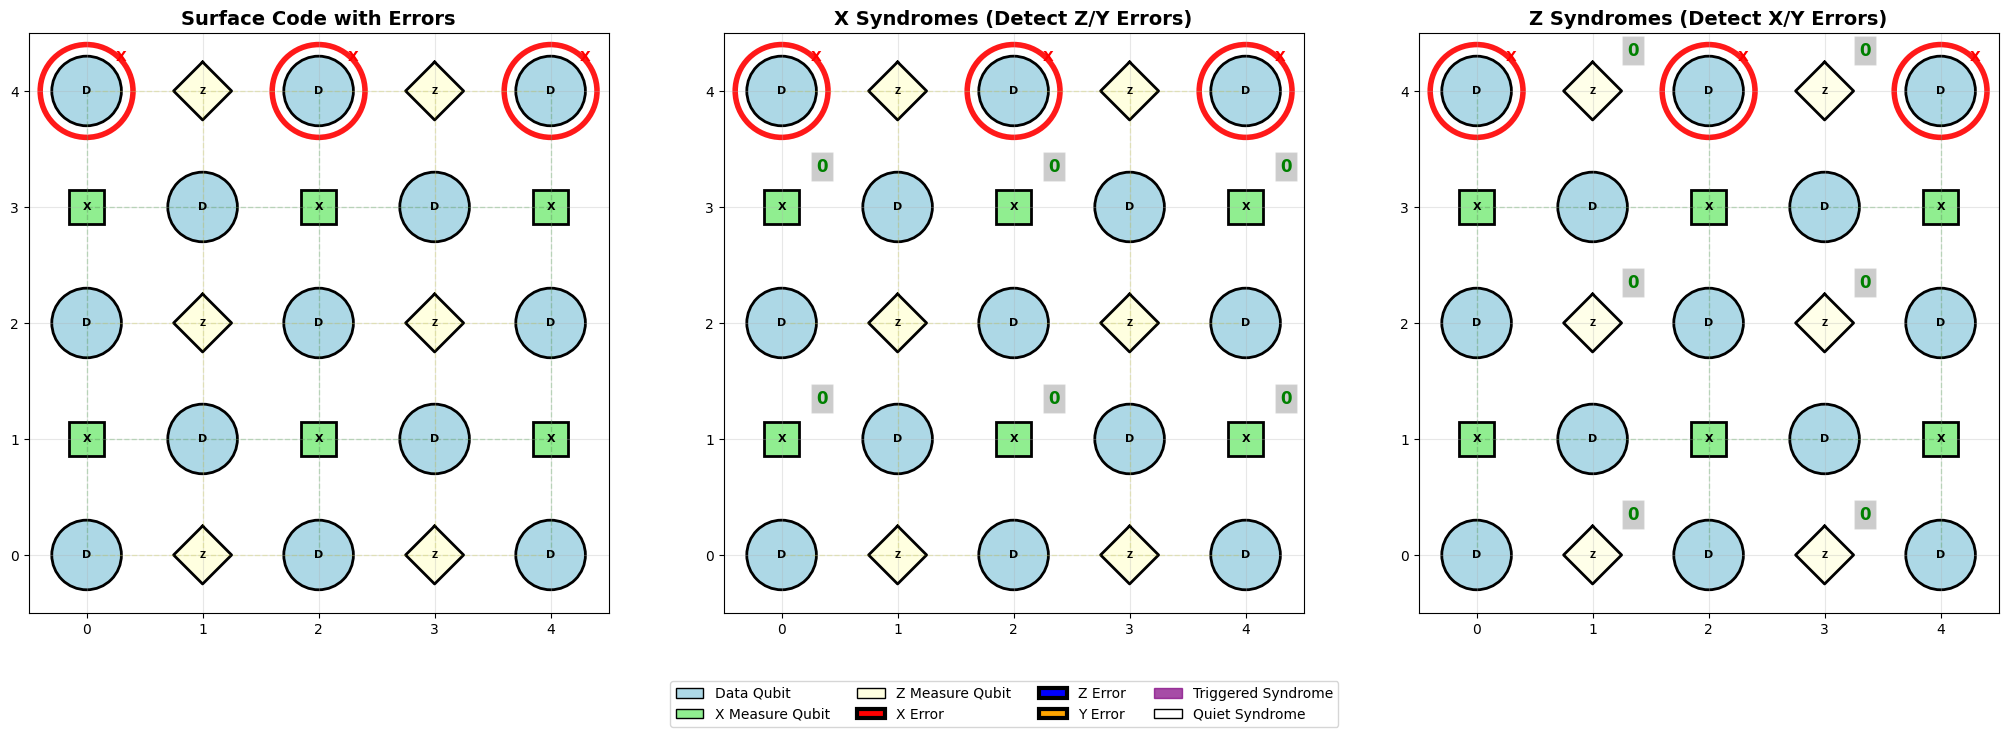


SYNDROME MEASUREMENT RESULTS
X syndromes: 0/6 triggered
Z syndromes: 0/6 triggered

Triggered X syndromes (detect Z/Y errors):

Triggered Z syndromes (detect X/Y errors):

Logical flip analysis:
  Logical X operator: 0 errors
  Logical Z operator: 3 errors
  Logical X flipped: No
  Logical Z flipped: Yes
LOGICAL FLIP DETECTED!


In [ ]:
# Inject 3 X errors along logical Z operator -- logical flip since end to end
error_positions = logical_z_path
error_sim.inject_specific_errors(x_positions=error_positions)
error_sim.visualize_errors()

# Simulating surface codes using stim

So far, you have learned about the surface code, its stabilizers and logical operators, and the effect of errors on the code. You have also learned about the Minimum-Weight Perfect Matching (MWPM) decoder for the surface code.

In this chapter, you will learn how to simulate the performance of the surface code under varying levels of physical noise using **stim**. As you may have noticed when we did this for repetition codes, building the syndrome extraction circuits manually is an arduous task. Many nuances need to be considered, such as avoiding qubit conflicts from overlapping parity checks and optimizing the circuit for fast execution. As you have seen in the previous chapter, even the smallest distance-3 surface codes have dense syndrome extraction circuits. **stim** handles this complexity automatically and makes the simulations easy to run.

In addition to the syndrome extraction circuits, we also need a fast decoder to detect and correct errors across varying distances. In the code below, we achieve all of this in just a few lines by using **stim** for fast circuit simulation and **PyMatching** (for decoding).


In [ ]:
p = 0.003
circuit_initial = stim.Circuit.generated("surface_code:rotated_memory_x",
                                        distance=3,
                                        rounds=3,
                                        after_clifford_depolarization=p,
                                        before_round_data_depolarization=p,
                                        after_reset_flip_probability=p,
                                        before_measure_flip_probability=p)

In [ ]:
model = circuit_initial.detector_error_model(decompose_errors=True)

In [ ]:
n_shots = 100_000
sampler = circuit_initial.compile_detector_sampler()
syndrome, actual_observables = sampler.sample(shots=n_shots, separate_observables=True)

In [ ]:
import stim
import pymatching as pm

# Step 1: Generate the detector error model
model = circuit_initial.detector_error_model(decompose_errors=True)

# Step 2: Create the MWPM decoder using PyMatching
matching = pm.Matching.from_detector_error_model(model)

# Step 3: Decode a batch of syndromes
predicted_observables = matching.decode_batch(syndrome)


In [ ]:
n_shots = 100_000
sampler = circuit_initial.compile_detector_sampler()
syndrome, actual_observables = sampler.sample(shots=n_shots, separate_observables=True)

In [ ]:
predicted_observables = matching.decode_batch(syndrome)

In [ ]:
log_errors = []
logical_error_probability = []
num_errors = np.sum(np.any(predicted_observables != actual_observables, axis=1))
log_errors.append(num_errors/n_shots)
logical_error_probability.append(np.array(log_errors))

In [ ]:
import stim
import pymatching as pm
import numpy as np
from tqdm import tqdm

num_shots = 20_000
distances = [3,5,7,9,11]
physical_error_probabilities = np.logspace(-4, -1, 20)
logical_error_probabilities = []

for distance in distances:
    print(f"Simulating distance-{distance} surface codes")
    logical_errors = []
    for p in tqdm(physical_error_probabilities):
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_x",
            distance=distance,
            rounds=distance,
            after_clifford_depolarization=p,
            before_round_data_depolarization=p,
            after_reset_flip_probability=p,
            before_measure_flip_probability=p
        )

        # Create detector error model
        model = circuit.detector_error_model(decompose_errors=True)

        # MWPM decoder using PyMatching
        matching = pm.Matching.from_detector_error_model(model)

        # Sample syndromes
        sampler = circuit.compile_detector_sampler()
        syndrome, actual_observables = sampler.sample(shots=num_shots, separate_observables=True)

        # Decode
        predicted_observables = matching.decode_batch(syndrome)

        # Compute logical error probability
        num_errors = np.sum(np.any(predicted_observables != actual_observables, axis=1))
        logical_errors.append(num_errors / num_shots)

    logical_error_probabilities.append(np.array(logical_errors))


Simulating distance-3 surface codes


100%|██████████| 20/20 [00:00<00:00, 32.89it/s] 


Simulating distance-5 surface codes


100%|██████████| 20/20 [00:05<00:00,  3.56it/s]


Simulating distance-7 surface codes


100%|██████████| 20/20 [00:18<00:00,  1.09it/s]


Simulating distance-9 surface codes


100%|██████████| 20/20 [00:47<00:00,  2.38s/it]


Simulating distance-11 surface codes


100%|██████████| 20/20 [01:37<00:00,  4.86s/it]


In [ ]:
import matplotlib.pyplot as plt

def plot_logical_error_probabilities(distances, physical_errors, all_logical_errors, all_analytical_errors=None, ylim=None):
    plt.figure(figsize=(10, 6))

    for i, distance in enumerate(distances):
        plt.loglog(physical_errors, all_logical_errors[i], marker='o', label=f"Distance {distance}")

    if all_analytical_errors is not None:
        for i, distance in enumerate(distances):
            plt.loglog(physical_errors, all_analytical_errors[i], linestyle='--', label=f"Analytical Distance {distance}")

    plt.xlabel("Physical error probability")
    plt.ylabel("Logical error probability")
    plt.title("Logical Error Probabilities vs Physical Error Probabilities")
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.legend()
    if ylim is not None:
        plt.ylim(ylim)
    plt.show()


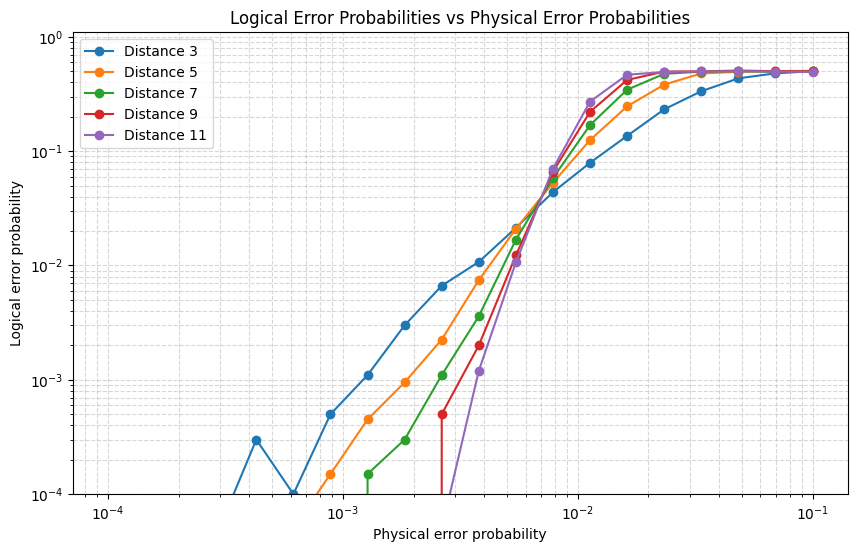

In [ ]:
plot_logical_error_probabilities(
    distances=distances,
    physical_errors=physical_error_probabilities,
    all_logical_errors=logical_error_probabilities,
    all_analytical_errors=None,
    ylim=[1e-4, 1.1]
)


In [ ]:
import stim
import numpy as np
from pymatching import Matching  # <- Add this to fix the NameError
from tqdm import tqdm            # <- Add this if you want the progress bar

num_shots = 1000
distances = [3,5,7,9,11]
physical_error_probabilities = np.linspace(4e-3, 9e-3, 20)
logical_error_probabilities = []

for distance in distances:
    print(f"Simulating distance-{distance} surface codes")
    logical_errors = []
    for p in tqdm(physical_error_probabilities):
        circuit = stim.Circuit.generated("surface_code:rotated_memory_x",
                                        distance=distance,
                                        rounds=distance,
                                        after_clifford_depolarization=p,
                                        before_round_data_depolarization=p,
                                        after_reset_flip_probability=p,
                                        before_measure_flip_probability=p)
        model = circuit.detector_error_model(decompose_errors=True)
        matching = Matching.from_detector_error_model(model)
        sampler = circuit.compile_detector_sampler()
        syndrome, actual_observables = sampler.sample(shots=num_shots, separate_observables=True)
        predicted_observables = matching.decode_batch(syndrome)
        num_errors = np.sum(np.any(predicted_observables != actual_observables, axis=1))
        logical_errors.append(num_errors/num_shots)
    logical_error_probabilities.append(np.array(logical_errors))


Simulating distance-3 surface codes


100%|██████████| 20/20 [00:00<00:00, 212.53it/s]


Simulating distance-5 surface codes


100%|██████████| 20/20 [00:00<00:00, 23.52it/s]


Simulating distance-7 surface codes


100%|██████████| 20/20 [00:00<00:00, 21.40it/s]


Simulating distance-9 surface codes


100%|██████████| 20/20 [00:02<00:00,  7.71it/s]


Simulating distance-11 surface codes


100%|██████████| 20/20 [00:03<00:00,  5.44it/s]


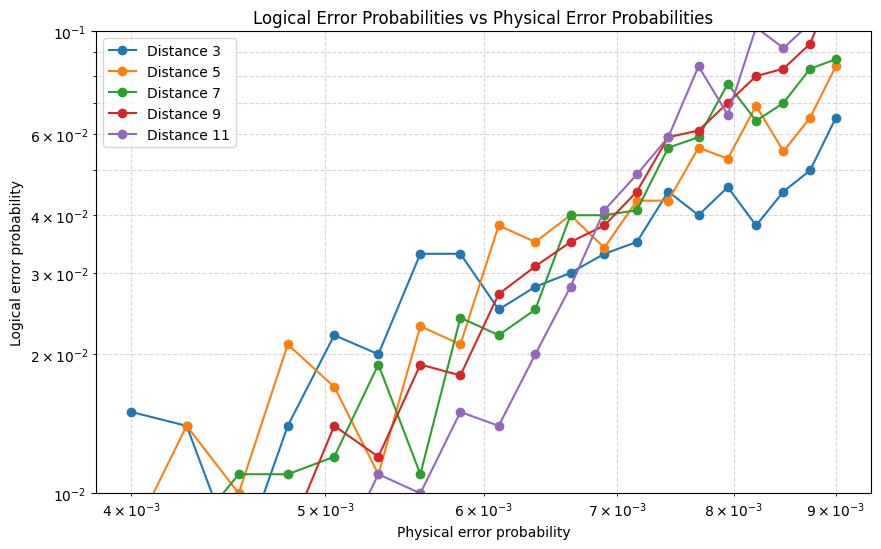

In [ ]:
plot_logical_error_probabilities(distances = distances,
                                 physical_errors = physical_error_probabilities,
                                 all_logical_errors = logical_error_probabilities,
                                 all_analytical_errors=None, ylim = [1e-2, 1e-1])

<div style="text-align: center; margin-top: 50px;">

# **Ending Note**

Thank you for going through this notebook on quantum error correction and surface codes.  
I hope this practical exploration of the Deltakit Textbook has provided useful insights into quantum error correction, surface codes, and their simulation using Stim and PyMatching.

---

# **About the Reviewer**

                                            Muhammad Hasnain Falaksher  
                                            Quantum Researcher
                                            

---

# **Collaboration Invitation**

I am enthusiastic about potential collaborations and would be happy to contribute to your esteemed organization.  
Please feel free to reach out to me at:  
Email: <span style="font-size:16px; font-weight:bold;">mhasnain@ele.qau.edu.pk</span>


</div>


In [ ]:
# Install stim and pymatching in Colab
!pip install stim pymatching


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 627.1/627.1 kB 34.3 MB/s eta 0:00:00


Simulating distance-3 surface codes


100%|██████████| 10/10 [00:00<00:00, 177.86it/s]


Simulating distance-5 surface codes


100%|██████████| 10/10 [00:00<00:00, 26.67it/s]


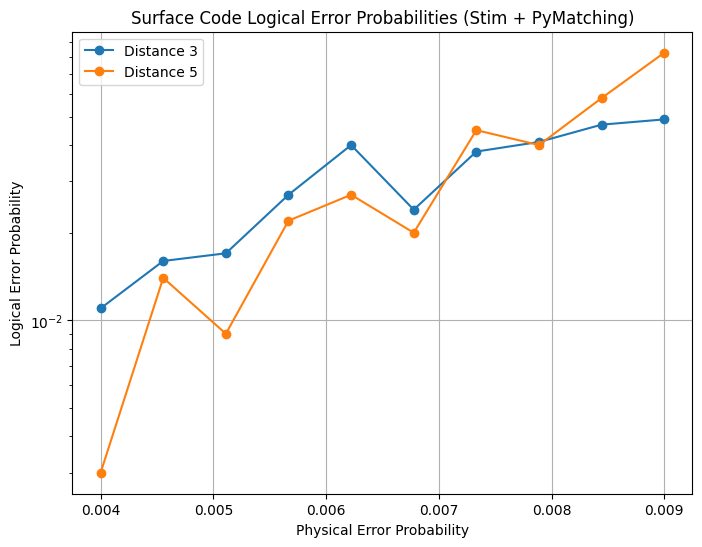

Circuit diagram:
QUBIT_COORDS(1, 1) 1
QUBIT_COORDS(2, 0) 2
QUBIT_COORDS(3, 1) 3
QUBIT_COORDS(5, 1) 5
QUBIT_COORDS(1, 3) 8
QUBIT_COORDS(2, 2) 9
QUBIT_COORDS(3, 3) 10
QUBIT_COORDS(4, 2) 11
QUBIT_COORDS(5, 3) 12
QUBIT_COORDS(6, 2) 13
QUBIT_COORDS(0, 4) 14
QUBIT_COORDS(1, 5) 15
QUBIT_COORDS(2, 4) 16
QUBIT_COORDS(3, 5) 17
QUBIT_COORDS(4, 4) 18
QUBIT_COORDS(5, 5) 19
QUBIT_COORDS(4, 6) 25
RX 1 3 5 8 10 12 15 17 19
R 2 9 11 13 14 16 18 25
TICK
H 2 11 16 25
TICK
CX 2 3 16 17 11 12 15 14 10 9 19 18
TICK
CX 2 1 16 15 11 10 8 14 3 9 12 18
TICK
CX 16 10 11 5 25 19 8 9 17 18 12 13
TICK
CX 16 8 11 3 25 17 1 9 10 18 5 13
TICK
H 2 11 16 25
TICK
MR 2 9 11 13 14 16 18 25
DETECTOR(2, 0, 0) rec[-8]
DETECTOR(2, 4, 0) rec[-3]
DETECTOR(4, 2, 0) rec[-6]
DETECTOR(4, 6, 0) rec[-1]
REPEAT 2 {
    TICK
    H 2 11 16 25
    TICK
    CX 2 3 16 17 11 12 15 14 10 9 19 18
    TICK
    CX 2 1 16 15 11 10 8 14 3 9 12 18
    TICK
    CX 16 10 11 5 25 19 8 9 17 18 12 13
    TICK
    CX 16 8 11 3 25 17 1 9 10 18 5 13
    TI

In [ ]:
# Step 1: Install necessary libraries
!pip install stim pymatching matplotlib tqdm

# Step 2: Import libraries
import stim
import pymatching as pm
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Step 3: Define surface code simulation parameters
num_shots = 1000
distances = [3, 5]
physical_error_probabilities = np.linspace(0.004, 0.009, 10)

# Step 4: Run simulation for each distance
logical_error_probabilities = []

for distance in distances:
    print(f"Simulating distance-{distance} surface codes")
    logical_errors = []

    for p in tqdm(physical_error_probabilities):
        # Generate the rotated surface code memory circuit
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_x",
            distance=distance,
            rounds=distance,
            after_clifford_depolarization=p,
            before_round_data_depolarization=p,
            after_reset_flip_probability=p,
            before_measure_flip_probability=p
        )

        # Build detector error model and matching decoder
        model = circuit.detector_error_model(decompose_errors=True)
        matching = pm.Matching.from_detector_error_model(model)

        # Sample syndrome measurements
        sampler = circuit.compile_detector_sampler()
        syndrome, actual_observables = sampler.sample(shots=num_shots, separate_observables=True)

        # Decode and calculate logical error rate
        predicted_observables = matching.decode_batch(syndrome)
        num_errors = np.sum(np.any(predicted_observables != actual_observables, axis=1))
        logical_errors.append(num_errors / num_shots)

    logical_error_probabilities.append(np.array(logical_errors))

# Step 5: Plot logical error probabilities
plt.figure(figsize=(8, 6))
for i, distance in enumerate(distances):
    plt.plot(physical_error_probabilities, logical_error_probabilities[i], marker='o', label=f'Distance {distance}')
plt.xlabel("Physical Error Probability")
plt.ylabel("Logical Error Probability")
plt.title("Surface Code Logical Error Probabilities (Stim + PyMatching)")
plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()

# Step 6: Optional - visualize a single circuit layout (small distance for clarity)
distance = 3
circuit = stim.Circuit.generated(
    "surface_code:rotated_memory_x",
    distance=distance,
    rounds=distance
)

# Print the textual circuit (Stim ASCII diagram)
print("Circuit diagram:")
print(circuit)


In [ ]:
# Step 1: Install libraries if not installed
!pip install stim pymatching tqdm

# Step 2: Imports
import stim
import pymatching as pm
import numpy as np
from tqdm import tqdm

# Step 3: Parameters
num_shots = 1000
distance = 3
physical_error_probabilities = np.linspace(0.004, 0.009, 20)

# Step 4: Function to compute logical error probabilities for surface code
def get_logical_error_probability_stim_surface(distance, ps, n_shots):
    logical_errors = []
    for p in tqdm(ps):
        circuit = stim.Circuit.generated(
            "surface_code:rotated_memory_x",
            distance=distance,
            rounds=distance,
            after_clifford_depolarization=p,
            before_round_data_depolarization=p,
            after_reset_flip_probability=p,
            before_measure_flip_probability=p
        )
        model = circuit.detector_error_model(decompose_errors=True)
        matching = pm.Matching.from_detector_error_model(model)
        sampler = circuit.compile_detector_sampler()
        syndrome, actual_observables = sampler.sample(shots=n_shots, separate_observables=True)
        predicted_observables = matching.decode_batch(syndrome)
        logical_errors.append(np.sum(np.any(predicted_observables != actual_observables, axis=1))/n_shots)
    return np.array(logical_errors)

# Step 5: Run simulation (one-liner style like Shor code)
p_Ls = get_logical_error_probability_stim_surface(distance=distance, ps=physical_error_probabilities, n_shots=num_shots)

# Step 6: Print result
print("Logical error probabilities:", p_Ls)


100%|██████████| 20/20 [00:00<00:00, 164.85it/s]

Logical error probabilities: [0.013 0.01  0.012 0.027 0.022 0.021 0.015 0.02  0.021 0.028 0.036 0.04
 0.04  0.038 0.046 0.057 0.066 0.049 0.05  0.051]
